### Background

Pernalonga, a leading supermarket chain of over 400 stores in Lunitunia, sells over 10 thousand products in over 400 categories.  Pernalonga regularly partners with suppliers to fund promotions and derives about 30% of its sales on promotions.  While a majority of its promotion activities are in-store promotions, it recently started partnering with select suppliers to experiment on personalized promotions.  In theory, personalized promotions are more efficient as offers are only made to targeted individuals who required an offer to purchase a product.  In contrast, most in-store promotions make temporary price reductions on a product available to all customers whether or not a customer needs the incentive to purchase the product.  The efficiency of personalized promotion comes from an additional analysis required on customer transaction data to determine which customers are most likely to purchase a product to be offered in order to maximize the opportunity for incremental sales and profits.

### Problem

Your analytics consulting firm was selected by Pernalonga (the client) to develop a marketing campaign to experiment on personalized promotions.  While the details of specific partnerships with suppliers to fund the experimental personalized promotions are still being negotiated, you have received data from the client.  You have two weeks to analyze the data to support the proposed marketing campaign below (assigned according to your group/team number) that is scheduled to run for two weeks in April 2021.

   * Colgate-Palmolive is interested in a promotional campaign to boost the sales of Colgate toothpaste.

For each of the above campaigns, a minimum requirement is to provide (with justification) a personalized promotion plan with the following:

   * The customers that will be targeted
   * For each targeted customer, which product is being promoted with an offer

Not required, but a plus for your firm (bonus points to you) if your plan includes the following information:

   * The expected total redemption cost for the promotion (total discounts redeemed)
   * The expected incremental volume for each product



### Available Data

##### transaction_table.csv - contains transaction history in 2016 and 2017 for close to 8,000 customers


   * cust_id – Customer ID
   * tran_id – Transaction ID
   * tran_dt – Transaction Date
   * store_id – Store ID
   * prod_id – Product ID
   * prod_unit – Product unit of measure: CT for count and KG for kilograms
   * prod_unit_price – Unit price of the product
   * tran_prod_sale_qty – Quantity/units of the product in the transaction
   * tran_prod_sale_amt – Sales amount for the product before discounts in the transaction
   * tran_prod_discount_amt – Total amount of discounts applied to the product in the transaction
   * tran_prod_offer_cts – Total number of offers on the product resulting in the total amount of discounts in the transaction
   * tran_prod_paid_amt – Amount paid for the product after discounts are applied in the transaction

##### product_table.csv - contains the product to subcategory and category mapping and descriptions for about 11,000 products 


   * prod_id – Product ID
   * subcategory_id – Subcategory ID
   * category_id – Category ID
   * sub_category_desc – Subcategory name (in Portuguese)
   * category_desc – Category name (in Portuguese)
   * category_desc_eng – Category name (in English)
   * brand_desc – Brand of the product, including NO LABEL and PRIVATE LABEL


# PRODUCT - EXPLORATORY DATA ANALYSIS

In [2]:
# Import libraries

# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
from __future__ import division, print_function, unicode_literals

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import pandas_profiling
import os, sys

import datetime

import numpy

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import MinMaxScaler

import gc

gc.collect()
gc.collect()

0

In [3]:
# set # of columns and rows to display

pd.set_option('max_columns', None)
pd.set_option('max_rows', 100)

In [3]:
# Import transaction table

transactions = pd.read_csv('transaction_table.csv')

transactions.head()

cust_id       tran_id     tran_dt  store_id    prod_id prod_unit  \
0   139662  2.017110e+18  2017-11-03       584  145519008        CT   
1   799924  2.017111e+18  2017-11-12       349  145519008        CT   
2  1399898  2.017102e+18  2017-10-21       684  145519008        CT   
3  1399898  2.017111e+18  2017-11-11       684  145519008        CT   
4  1399898  2.017121e+18  2017-12-05       684  145519008        CT   

   tran_prod_sale_amt  tran_prod_sale_qty  tran_prod_discount_amt  \
0                2.89                 4.0                    0.00   
1                2.89                 4.0                   -1.45   
2                2.89                 4.0                   -1.45   
3                2.89                 4.0                   -1.45   
4                2.89                 4.0                   -1.45   

   tran_prod_offer_cts  tran_prod_paid_amt  prod_unit_price  
0                    0                2.89           0.7225  
1                    1                1.44           0.7225  
2                    1                1.44           0.7225  
3                    1                1.44           0.7225  
4                    1                1.44           0.7225

In [4]:
# Transactions shape

transactions.shape

(29617585, 12)

In [5]:
# Transactions data types

transactions.dtypes

cust_id                     int64
tran_id                   float64
tran_dt                    object
store_id                    int64
prod_id                     int64
prod_unit                  object
tran_prod_sale_amt        float64
tran_prod_sale_qty        float64
tran_prod_discount_amt    float64
tran_prod_offer_cts         int64
tran_prod_paid_amt        float64
prod_unit_price           float64
dtype: object

In [6]:
# Transactions descriptive statistics

transactions.describe().T

count          mean           std           min  \
cust_id                 29617585.0  5.016900e+07  2.904564e+07  2.956800e+04   
tran_id                 29617585.0  2.016584e+18  4.993258e+14  2.016010e+18   
store_id                29617585.0  4.457788e+02  2.004097e+02  1.020000e+02   
prod_id                 29617585.0  9.797496e+08  1.192139e+08  1.455190e+08   
tran_prod_sale_amt      29617585.0  2.503286e+00  4.130594e+00  1.000000e-02   
tran_prod_sale_qty      29617585.0  1.667866e+00  2.279535e+00  1.000000e-03   
tran_prod_discount_amt  29617585.0 -4.027838e-01  1.558037e+00 -1.400250e+03   
tran_prod_offer_cts     29617585.0  3.408940e-01  5.339727e-01  0.000000e+00   
tran_prod_paid_amt      29617585.0  2.100502e+00  3.162718e+00 -1.410000e+00   
prod_unit_price         29617585.0  2.093038e+00  2.587080e+00  7.500000e-03   

                                 25%           50%           75%           max  
cust_id                 2.500986e+07  5.025960e+07  7.568990e+07  9.999978e+07  
tran_id                 2.016072e+18  2.017011e+18  2.017070e+18  2.017123e+18  
store_id                2.940000e+02  3.930000e+02  5.880000e+02  9.990000e+02  
prod_id                 9.992470e+08  9.993624e+08  9.996799e+08  9.999997e+08  
tran_prod_sale_amt      9.000000e-01  1.590000e+00  2.790000e+00  3.371250e+03  
tran_prod_sale_qty      1.000000e+00  1.000000e+00  2.000000e+00  2.112000e+03  
tran_prod_discount_amt -2.400000e-01  0.000000e+00  0.000000e+00  0.000000e+00  
tran_prod_offer_cts     0.000000e+00  0.000000e+00  1.000000e+00  7.600000e+01  
tran_prod_paid_amt      8.400000e-01  1.370000e+00  2.320000e+00  1.971000e+03  
prod_unit_price         7.400000e-01  1.390000e+00  2.490000e+00  3.990000e+02

In [7]:
# Is there any amount paid for the product (after discounts) less than 0 ?

(transactions['tran_prod_paid_amt'] < 0).any()

True

In [8]:
# Filter out transactions less than 0

transactions.drop(transactions[transactions['tran_prod_paid_amt'] < 0].index, inplace = True)

In [9]:
# Transactions shape

transactions.shape

(29617577, 12)

In [10]:
# Checking potential errors in number of discounts

transactions["tran_prod_offer_cts"].value_counts()

0     20364070
1      8451995
2       766077
3        30327
4         4706
5          189
6          156
8           18
7           14
10           8
9            7
12           2
13           2
14           1
16           1
18           1
20           1
30           1
76           1
Name: tran_prod_offer_cts, dtype: int64

In [11]:
# More than 4 offers on the product

(transactions['tran_prod_offer_cts'] > 4).any()

True

In [12]:
# Individually screening whether the high numbers of discounts are error

transactions[transactions['tran_prod_offer_cts'] == 1].describe()

cust_id       tran_id      store_id       prod_id  \
count  8.451995e+06  8.451995e+06  8.451995e+06  8.451995e+06   
mean   5.023613e+07  2.016533e+18  4.455133e+02  9.620627e+08   
std    2.905973e+07  5.028834e+14  1.994563e+02  1.626511e+08   
min    2.956800e+04  2.016010e+18  1.370000e+02  1.455190e+08   
25%    2.506982e+07  2.016063e+18  3.030000e+02  9.992378e+08   
50%    5.038983e+07  2.016121e+18  3.880000e+02  9.993471e+08   
75%    7.570960e+07  2.017080e+18  5.880000e+02  9.996497e+08   
max    9.999978e+07  2.017123e+18  9.990000e+02  9.999997e+08   

       tran_prod_sale_amt  tran_prod_sale_qty  tran_prod_discount_amt  \
count        8.451995e+06        8.451995e+06            8.451995e+06   
mean         3.279136e+00        1.737134e+00           -1.198136e+00   
std          4.861358e+00        2.271857e+00            2.151179e+00   
min          1.000000e-02        2.000000e-03           -5.850000e+02   
25%          1.290000e+00        1.000000e+00           -1.300000e+00   
50%          2.000000e+00        1.000000e+00           -6.700000e-01   
75%          3.580000e+00        2.000000e+00           -2.900000e-01   
max          1.166100e+03        7.200000e+02            0.000000e+00   

       tran_prod_offer_cts  tran_prod_paid_amt  prod_unit_price  
count            8451995.0        8.451995e+06     8.451995e+06  
mean                   1.0        2.081000e+00     2.445389e+00  
std                    0.0        3.017969e+00     3.015256e+00  
min                    1.0        0.000000e+00     4.944444e-02  
25%                    1.0        8.900000e-01     9.898214e-01  
50%                    1.0        1.380000e+00     1.690000e+00  
75%                    1.0        2.240000e+00     2.790000e+00  
max                    1.0        8.640000e+02     3.990000e+02

In [13]:
transactions[transactions['tran_prod_offer_cts'] == 2].describe()

cust_id       tran_id       store_id       prod_id  \
count  7.660770e+05  7.660770e+05  766077.000000  7.660770e+05   
mean   5.008108e+07  2.016622e+18     428.054890  9.530078e+08   
std    2.906043e+07  4.977442e+14     182.010254  1.810934e+08   
min    2.956800e+04  2.016010e+18     137.000000  1.455190e+08   
25%    2.452972e+07  2.016100e+18     304.000000  9.992303e+08   
50%    5.012994e+07  2.017022e+18     362.000000  9.993094e+08   
75%    7.563963e+07  2.017083e+18     575.000000  9.995454e+08   
max    9.999978e+07  2.017123e+18     999.000000  9.999992e+08   

       tran_prod_sale_amt  tran_prod_sale_qty  tran_prod_discount_amt  \
count       766077.000000       766077.000000           766077.000000   
mean             4.910995            2.085320               -2.157011   
std              9.139091            4.651372                4.228822   
min              0.020000            0.006000             -559.680000   
25%              1.590000            1.000000               -2.200000   
50%              2.690000            1.000000               -1.100000   
75%              4.990000            2.000000               -0.530000   
max           1314.720000         2112.000000                0.000000   

       tran_prod_offer_cts  tran_prod_paid_amt  prod_unit_price  
count             766077.0       766077.000000    766077.000000  
mean                   2.0            2.753984         3.189478  
std                    0.0            5.329454         4.602114  
min                    2.0            0.000000         0.049444  
25%                    2.0            0.960000         0.990000  
50%                    2.0            1.560000         1.980000  
75%                    2.0            2.840000         3.490000  
max                    2.0          755.040000       399.000000

In [14]:
transactions[transactions['tran_prod_offer_cts'] == 3].describe()

cust_id       tran_id      store_id       prod_id  \
count  3.032700e+04  3.032700e+04  30327.000000  3.032700e+04   
mean   4.992584e+07  2.016828e+18    415.941933  9.676086e+08   
std    2.904563e+07  4.463604e+14    166.616718  1.534534e+08   
min    2.956800e+04  2.016010e+18    137.000000  1.525760e+08   
25%    2.364976e+07  2.016122e+18    310.000000  9.992313e+08   
50%    5.003995e+07  2.017082e+18    347.000000  9.993498e+08   
75%    7.568495e+07  2.017122e+18    561.000000  9.996265e+08   
max    9.999978e+07  2.017123e+18    999.000000  9.999992e+08   

       tran_prod_sale_amt  tran_prod_sale_qty  tran_prod_discount_amt  \
count        30327.000000        30327.000000            30327.000000   
mean             7.889127            2.533450               -3.581054   
std             17.986815            5.685341                7.296938   
min              0.110000            0.060000             -324.800000   
25%              1.990000            1.000000               -3.720000   
50%              3.780000            1.000000               -1.600000   
75%              7.990000            3.000000               -0.740000   
max            674.550000          450.000000               -0.010000   

       tran_prod_offer_cts  tran_prod_paid_amt  prod_unit_price  
count              30327.0        30327.000000     30327.000000  
mean                   3.0            4.308073         4.374162  
std                    0.0           11.407751         5.152979  
min                    3.0            0.000000         0.079000  
25%                    3.0            1.100000         1.150000  
50%                    3.0            1.950000         2.190000  
75%                    3.0            4.090000         5.488982  
max                    3.0          459.650000        89.900000

In [15]:
transactions[transactions['tran_prod_offer_cts'] == 4].describe()

cust_id       tran_id     store_id       prod_id  \
count  4.706000e+03  4.706000e+03  4706.000000  4.706000e+03   
mean   5.052354e+07  2.016491e+18   425.311305  9.695883e+08   
std    2.903737e+07  4.832187e+14   181.413809  1.447050e+08   
min    3.977400e+04  2.016010e+18   137.000000  1.525760e+08   
25%    2.427989e+07  2.016092e+18   303.000000  9.992349e+08   
50%    5.076972e+07  2.016113e+18   353.000000  9.993284e+08   
75%    7.631957e+07  2.017071e+18   572.000000  9.995469e+08   
max    9.995981e+07  2.017123e+18   999.000000  9.999992e+08   

       tran_prod_sale_amt  tran_prod_sale_qty  tran_prod_discount_amt  \
count         4706.000000         4706.000000             4706.000000   
mean            14.002890            4.525606               -6.065852   
std             33.036649            7.659172               13.342729   
min              0.280000            0.166000             -302.940000   
25%              3.160000            2.000000               -5.640000   
50%              5.800000            2.000000               -2.460000   
75%             11.980000            4.000000               -1.020000   
max            484.380000          240.000000               -0.020000   

       tran_prod_offer_cts  tran_prod_paid_amt  prod_unit_price  
count               4706.0         4706.000000      4706.000000  
mean                   4.0            7.937038         3.856950  
std                    0.0           20.840821         4.992215  
min                    4.0            0.000000         0.079000  
25%                    4.0            1.960000         0.890000  
50%                    4.0            3.195000         1.990000  
75%                    4.0            6.780000         3.990404  
max                    4.0          305.660000        89.900000

In [16]:
transactions[transactions['tran_prod_offer_cts'] == 5].describe()

cust_id       tran_id    store_id       prod_id  \
count  1.890000e+02  1.890000e+02  189.000000  1.890000e+02   
mean   5.064420e+07  2.016588e+18  423.677249  9.738502e+08   
std    2.963801e+07  4.932579e+14  158.659969  1.327157e+08   
min    1.129755e+06  2.016011e+18  150.000000  1.806110e+08   
25%    2.741962e+07  2.016093e+18  321.000000  9.992694e+08   
50%    5.012994e+07  2.017011e+18  365.000000  9.995324e+08   
75%    7.631991e+07  2.017080e+18  557.000000  9.997465e+08   
max    9.960000e+07  2.017123e+18  986.000000  9.999869e+08   

       tran_prod_sale_amt  tran_prod_sale_qty  tran_prod_discount_amt  \
count          189.000000          189.000000              189.000000   
mean            38.884656           11.585021              -14.416720   
std             93.161257           44.655027               32.661957   
min              1.160000            0.966000             -175.000000   
25%              3.600000            2.462000               -8.840000   
50%              7.960000            5.000000               -3.670000   
75%             19.670000            7.000000               -0.610000   
max            459.440000          600.000000               -0.250000   

       tran_prod_offer_cts  tran_prod_paid_amt  prod_unit_price  
count                189.0          189.000000       189.000000  
mean                   5.0           24.467937         4.007382  
std                    0.0           61.203388         4.468830  
min                    5.0            0.740000         0.160000  
25%                    5.0            2.750000         0.600000  
50%                    5.0            4.270000         1.960000  
75%                    5.0           11.360000         5.850000  
max                    5.0          292.220000        19.990000

In [17]:
transactions[transactions['tran_prod_offer_cts'] == 6].describe()

cust_id       tran_id    store_id       prod_id  \
count  1.560000e+02  1.560000e+02  156.000000  1.560000e+02   
mean   4.632069e+07  2.016500e+18  458.493590  9.596576e+08   
std    2.756065e+07  4.862197e+14  188.609735  1.721638e+08   
min    2.997490e+05  2.016010e+18  143.000000  1.527610e+08   
25%    2.529998e+07  2.016101e+18  332.750000  9.992287e+08   
50%    4.203986e+07  2.016112e+18  475.000000  9.992702e+08   
75%    6.440970e+07  2.017071e+18  588.000000  9.996354e+08   
max    9.910978e+07  2.017122e+18  996.000000  9.999590e+08   

       tran_prod_sale_amt  tran_prod_sale_qty  tran_prod_discount_amt  \
count          156.000000          156.000000              156.000000   
mean            31.380385            7.491410              -13.626474   
std             68.688221            9.090859               26.264291   
min              0.560000            0.710000             -210.000000   
25%              4.745000            2.027000              -13.200000   
50%             10.765000            4.000000               -5.040000   
75%             30.325000            8.000000               -1.690000   
max            599.400000           60.000000               -0.240000   

       tran_prod_offer_cts  tran_prod_paid_amt  prod_unit_price  
count                156.0          156.000000       156.000000  
mean                   6.0           17.753910         5.081309  
std                    0.0           43.715449         5.851404  
min                    6.0            0.320000         0.160000  
25%                    6.0            3.300000         0.990000  
50%                    6.0            5.145000         2.590000  
75%                    6.0           14.512500         7.065000  
max                    6.0          389.400000        27.990000

In [18]:
transactions[transactions['tran_prod_offer_cts'] == 7].describe()

cust_id       tran_id    store_id       prod_id  \
count  1.400000e+01  1.400000e+01   14.000000  1.400000e+01   
mean   4.901474e+07  2.016572e+18  425.357143  9.995536e+08   
std    3.221396e+07  4.973117e+14  136.200422  2.380817e+05   
min    1.889991e+06  2.016071e+18  172.000000  9.991630e+08   
25%    2.898968e+07  2.016092e+18  339.000000  9.993131e+08   
50%    4.584957e+07  2.016567e+18  477.000000  9.997465e+08   
75%    7.491737e+07  2.017061e+18  483.000000  9.997465e+08   
max    9.099966e+07  2.017072e+18  632.000000  9.997465e+08   

       tran_prod_sale_amt  tran_prod_sale_qty  tran_prod_discount_amt  \
count           14.000000           14.000000                14.00000   
mean            54.418571           11.571429               -19.30500   
std            165.782572           17.028096                55.40039   
min              4.200000            3.000000              -210.00000   
25%              4.867500            4.750000                -6.98000   
50%              5.400000            7.500000                -0.52500   
75%             12.720000            9.750000                -0.41250   
max            629.300000           70.000000                -0.35000   

       tran_prod_offer_cts  tran_prod_paid_amt  prod_unit_price  
count                 14.0           14.000000        14.000000  
mean                   7.0           35.113571         2.352857  
std                    0.0          110.638242         2.985780  
min                    7.0            2.170000         0.600000  
25%                    7.0            3.850000         0.600000  
50%                    7.0            4.950000         0.600000  
75%                    7.0            6.327500         2.740000  
max                    7.0          419.300000         8.990000

In [19]:
transactions[transactions['tran_prod_offer_cts'] == 8].describe()

cust_id       tran_id    store_id       prod_id  \
count  1.800000e+01  1.800000e+01   18.000000  1.800000e+01   
mean   4.931308e+07  2.016619e+18  362.222222  9.994552e+08   
std    2.651170e+07  5.045657e+14  153.739105  2.233359e+05   
min    1.989964e+07  2.016012e+18  153.000000  9.991638e+08   
25%    2.585724e+07  2.016083e+18  269.000000  9.992392e+08   
50%    4.426977e+07  2.017022e+18  330.000000  9.994643e+08   
75%    7.145472e+07  2.017063e+18  442.250000  9.996429e+08   
max    9.772982e+07  2.017121e+18  679.000000  9.997465e+08   

       tran_prod_sale_amt  tran_prod_sale_qty  tran_prod_discount_amt  \
count           18.000000           18.000000               18.000000   
mean           175.810000           23.684778              -71.935556   
std            215.311102           19.923024               82.892298   
min              4.740000            2.000000             -300.000000   
25%             26.495000            8.500000             -109.917500   
50%             79.420000           22.545500              -45.955000   
75%            280.077500           29.214250              -11.442500   
max            749.250000           75.000000               -0.400000   

       tran_prod_offer_cts  tran_prod_paid_amt  prod_unit_price  
count                 18.0           18.000000        18.000000  
mean                   8.0          103.874444         7.696692  
std                    0.0          134.312050         7.017227  
min                    8.0            3.250000         0.600000  
25%                    8.0           12.125000         1.912498  
50%                    8.0           35.065000         7.489922  
75%                    8.0          166.930000        10.990090  
max                    8.0          449.250000        19.990000

In [20]:
transactions[transactions['tran_prod_offer_cts'] == 9].describe()

cust_id       tran_id    store_id       prod_id  \
count  7.000000e+00  7.000000e+00    7.000000  7.000000e+00   
mean   6.586539e+07  2.016641e+18  465.000000  9.997189e+08   
std    3.434289e+07  5.368426e+14  155.926265  2.499824e+05   
min    7.819901e+06  2.016050e+18  261.000000  9.992392e+08   
25%    4.584957e+07  2.016077e+18  373.000000  9.996767e+08   
50%    7.190964e+07  2.017061e+18  477.000000  9.997465e+08   
75%    9.505472e+07  2.017062e+18  551.500000  9.998517e+08   
max    9.951960e+07  2.017100e+18  668.000000  9.999898e+08   

       tran_prod_sale_amt  tran_prod_sale_qty  tran_prod_discount_amt  \
count            7.000000            7.000000                7.000000   
mean           160.477143           27.866000              -61.544286   
std            308.100407           28.969882              108.063784   
min              6.000000           10.000000             -297.500000   
25%              7.200000           10.579000              -62.565000   
50%             17.350000           13.000000               -6.480000   
75%            118.220000           32.952000               -0.600000   
max            849.150000           85.000000               -0.500000   

       tran_prod_offer_cts  tran_prod_paid_amt  prod_unit_price  
count                  7.0            7.000000         7.000000  
mean                   9.0           98.932857         3.994243  
std                    0.0          200.940107         5.219656  
min                    9.0            5.500000         0.600000  
25%                    9.0            6.600000         0.600000  
50%                    9.0           10.870000         1.090921  
75%                    9.0           55.655000         6.040000  
max                    9.0          551.650000        12.988777

In [21]:
transactions[transactions['tran_prod_offer_cts'] == 10].describe()

cust_id       tran_id    store_id       prod_id  \
count  8.000000e+00  8.000000e+00    8.000000  8.000000e+00   
mean   7.003850e+07  2.016576e+18  462.000000  9.997283e+08   
std    2.612811e+07  5.365698e+14  170.241006  1.267567e+05   
min    1.989964e+07  2.016043e+18  261.000000  9.995521e+08   
25%    6.539463e+07  2.016083e+18  267.000000  9.996500e+08   
50%    7.285980e+07  2.016582e+18  533.500000  9.997465e+08   
75%    8.544231e+07  2.017070e+18  607.250000  9.997465e+08   
max    9.841998e+07  2.017093e+18  617.000000  9.999887e+08   

       tran_prod_sale_amt  tran_prod_sale_qty  tran_prod_discount_amt  \
count            8.000000            8.000000                8.000000   
mean           327.101250           40.262375             -135.855000   
std            432.868846           38.201864              171.966635   
min              6.000000           10.000000             -450.000000   
25%              6.900000           11.500000             -242.895000   
50%            104.740000           21.549500              -55.940000   
75%            539.822500           62.750000               -0.575000   
max           1099.000000          100.000000               -0.500000   

       tran_prod_offer_cts  tran_prod_paid_amt  prod_unit_price  
count                  8.0            8.000000         8.000000  
mean                  10.0          191.246250         5.032520  
std                    0.0          264.396881         5.493981  
min                   10.0            5.500000         0.600000  
25%                   10.0            6.325000         0.600000  
50%                   10.0           48.800000         2.245000  
75%                   10.0          296.927500         9.490000  
max                   10.0          649.000000        13.990160

In [22]:
# Number of discounts larger than 6 don't seem to make sense

transactions.drop(transactions[transactions['tran_prod_offer_cts'] > 6].index, inplace = True)

In [23]:
# Segment together products with 5 offers with products with 6 offers for clustering later (few instances and similar characteristics)

transactions[transactions['tran_prod_offer_cts'] == 6] = 5

In [24]:
# Transactions shape

transactions.shape

(29617520, 12)

In [25]:
# Check count for offers on product

transactions["tran_prod_offer_cts"].value_counts()

0    20364070
1     8451995
2      766077
3       30327
4        4706
5         345
Name: tran_prod_offer_cts, dtype: int64

In [26]:
# Checking if there are errors in the sales amt

transactions['sale_amt'] = transactions['tran_prod_sale_amt'] + transactions['tran_prod_discount_amt'] - transactions['tran_prod_paid_amt']

sum(round(transactions['sale_amt'],2) != 0)

156

In [27]:
sum(transactions['tran_prod_discount_amt'] != 0)

9251609

In [28]:
# Checking specifics

transactions[round(transactions['sale_amt'],2) != 0].iloc[:,[6,8,10,12]]

tran_prod_sale_amt  tran_prod_discount_amt  tran_prod_paid_amt  \
14696                    5.0                     5.0                 5.0   
194586                   5.0                     5.0                 5.0   
200738                   5.0                     5.0                 5.0   
204652                   5.0                     5.0                 5.0   
299034                   5.0                     5.0                 5.0   
317898                   5.0                     5.0                 5.0   
553154                   5.0                     5.0                 5.0   
640324                   5.0                     5.0                 5.0   
896737                   5.0                     5.0                 5.0   
923119                   5.0                     5.0                 5.0   
1027076                  5.0                     5.0                 5.0   
1321746                  5.0                     5.0                 5.0   
1321997                  5.0                     5.0                 5.0   
1333395                  5.0                     5.0                 5.0   
1365426                  5.0                     5.0                 5.0   
1420812                  5.0                     5.0                 5.0   
1450801                  5.0                     5.0                 5.0   
1579355                  5.0                     5.0                 5.0   
1677083                  5.0                     5.0                 5.0   
1828479                  5.0                     5.0                 5.0   
1833141                  5.0                     5.0                 5.0   
1941208                  5.0                     5.0                 5.0   
2109561                  5.0                     5.0                 5.0   
2158566                  5.0                     5.0                 5.0   
2245132                  5.0                     5.0                 5.0   
2370786                  5.0                     5.0                 5.0   
2371042                  5.0                     5.0                 5.0   
2519585                  5.0                     5.0                 5.0   
2630859                  5.0                     5.0                 5.0   
2643044                  5.0                     5.0                 5.0   
2644223                  5.0                     5.0                 5.0   
2646822                  5.0                     5.0                 5.0   
2907637                  5.0                     5.0                 5.0   
3287360                  5.0                     5.0                 5.0   
3405770                  5.0                     5.0                 5.0   
3483036                  5.0                     5.0                 5.0   
3788741                  5.0                     5.0                 5.0   
4220244                  5.0                     5.0                 5.0   
4280944                  5.0                     5.0                 5.0   
4702705                  5.0                     5.0                 5.0   
5808114                  5.0                     5.0                 5.0   
5841441                  5.0                     5.0                 5.0   
6126029                  5.0                     5.0                 5.0   
6128808                  5.0                     5.0                 5.0   
6427238                  5.0                     5.0                 5.0   
6438701                  5.0                     5.0                 5.0   
6441602                  5.0                     5.0                 5.0   
6457320                  5.0                     5.0                 5.0   
6548406                  5.0                     5.0                 5.0   
6552052                  5.0                     5.0                 5.0   
6552352                  5.0                     5.0                 5.0   
6775609                  5.0                     5.0      

In [29]:
# removing those rows

transactions.drop(transactions[round(transactions['sale_amt'],2) != 0].index, inplace = True)

In [30]:
sum(round(transactions['sale_amt'],2) != 0)

0

In [31]:
# Drop the tempory column

transactions.drop("sale_amt", axis=1, inplace = True)

In [32]:
# Checking how many unique transaction IDs

transactions['tran_id'].nunique()

753

In [33]:
# Fixing number of transaction IDs by assuming if a customer has > 1 transactions on the same day 
# in the same store it was the same transaction

transactions['new_tran_id'] = transactions['cust_id'].astype('str').str.cat([transactions['tran_dt'], transactions['store_id'].astype('str')], sep="_") 

In [34]:
# Checking unique number of New Transaction IDs

transactions['new_tran_id'].nunique()

2830549

In [35]:
# Dropping old transaction ID

transactions.drop('tran_id', axis=1, inplace=True)

In [36]:
# Converting transaction date from object to date 

transactions['tran_dt'] = pd.to_datetime(transactions['tran_dt'])

In [37]:
# Creating day of the week column

transactions['weekday'] = transactions['tran_dt'].dt.day_name()

In [38]:
# Creating month column 

transactions['month'] = transactions['tran_dt'].dt.month

In [39]:
# Creating year column

transactions['year'] = transactions['tran_dt'].dt.year

In [40]:
# Checking for NAs

transactions.isna().sum()

cust_id                   0
tran_dt                   0
store_id                  0
prod_id                   0
prod_unit                 0
tran_prod_sale_amt        0
tran_prod_sale_qty        0
tran_prod_discount_amt    0
tran_prod_offer_cts       0
tran_prod_paid_amt        0
prod_unit_price           0
new_tran_id               0
weekday                   0
month                     0
year                      0
dtype: int64

In [41]:
# Import products table

products = pd.read_csv('product_table.csv')

products.head()

prod_id  subcategory_id    sub_category_desc  category_id  category_desc  \
0  145519008           93970  IOGURTE BIFIDUS LIQ        95854  IOGURTE SAUDE   
1  145519009           93970  IOGURTE BIFIDUS LIQ        95854  IOGURTE SAUDE   
2  145519010           93970  IOGURTE BIFIDUS LIQ        95854  IOGURTE SAUDE   
3  145519011           93970  IOGURTE BIFIDUS LIQ        95854  IOGURTE SAUDE   
4  145519012           93970  IOGURTE BIFIDUS LIQ        95854  IOGURTE SAUDE   

  brand_desc category_desc_eng  
0    ACTIVIA     YOGURT HEALTH  
1    ACTIVIA     YOGURT HEALTH  
2    ACTIVIA     YOGURT HEALTH  
3    ACTIVIA     YOGURT HEALTH  
4    ACTIVIA     YOGURT HEALTH

In [42]:
# Products shape

products.shape

(10767, 7)

In [43]:
# Products data types

products.dtypes

prod_id               int64
subcategory_id        int64
sub_category_desc    object
category_id           int64
category_desc        object
brand_desc           object
category_desc_eng    object
dtype: object

In [44]:
# Checking for NAs

products.isna().sum()

prod_id              0
subcategory_id       0
sub_category_desc    0
category_id          0
category_desc        0
brand_desc           0
category_desc_eng    0
dtype: int64

In [45]:
# Merging transactions and customers table

transaction_product = transactions.merge(products, how="inner", on="prod_id")

transaction_product.head()

cust_id    tran_dt  store_id    prod_id prod_unit  tran_prod_sale_amt  \
0   139662 2017-11-03       584  145519008        CT                2.89   
1   799924 2017-11-12       349  145519008        CT                2.89   
2  1399898 2017-10-21       684  145519008        CT                2.89   
3  1399898 2017-11-11       684  145519008        CT                2.89   
4  1399898 2017-12-05       684  145519008        CT                2.89   

   tran_prod_sale_qty  tran_prod_discount_amt  tran_prod_offer_cts  \
0                 4.0                    0.00                    0   
1                 4.0                   -1.45                    1   
2                 4.0                   -1.45                    1   
3                 4.0                   -1.45                    1   
4                 4.0                   -1.45                    1   

   tran_prod_paid_amt  prod_unit_price             new_tran_id   weekday  \
0                2.89           0.7225   139662_2017-11-03_584    Friday   
1                1.44           0.7225   799924_2017-11-12_349    Sunday   
2                1.44           0.7225  1399898_2017-10-21_684  Saturday   
3                1.44           0.7225  1399898_2017-11-11_684  Saturday   
4                1.44           0.7225  1399898_2017-12-05_684   Tuesday   

   month  year  subcategory_id    sub_category_desc  category_id  \
0     11  2017           93970  IOGURTE BIFIDUS LIQ        95854   
1     11  2017           93970  IOGURTE BIFIDUS LIQ        95854   
2     10  2017           93970  IOGURTE BIFIDUS LIQ        95854   
3     11  2017           93970  IOGURTE BIFIDUS LIQ        95854   
4     12  2017           93970  IOGURTE BIFIDUS LIQ        95854   

   category_desc brand_desc category_desc_eng  
0  IOGURTE SAUDE    ACTIVIA     YOGURT HEALTH  
1  IOGURTE SAUDE    ACTIVIA     YOGURT HEALTH  
2  IOGURTE SAUDE    ACTIVIA     YOGURT HEALTH  
3  IOGURTE SAUDE    ACTIVIA     YOGURT HEALTH  
4  IOGURTE SAUDE    ACTIVIA     YOGURT HEALTH

In [46]:
# Checking for NAs

transaction_product.isna().sum()

cust_id                   0
tran_dt                   0
store_id                  0
prod_id                   0
prod_unit                 0
tran_prod_sale_amt        0
tran_prod_sale_qty        0
tran_prod_discount_amt    0
tran_prod_offer_cts       0
tran_prod_paid_amt        0
prod_unit_price           0
new_tran_id               0
weekday                   0
month                     0
year                      0
subcategory_id            0
sub_category_desc         0
category_id               0
category_desc             0
brand_desc                0
category_desc_eng         0
dtype: int64

In [47]:
# Removing bags

transaction_product = transaction_product[transaction_product["category_desc_eng"] != "BAGS"]

In [48]:
# Setting up variables to calculate profit margin for products with prod_unit = CT

transaction_product["base_unit_price"] = transaction_product["tran_prod_paid_amt"]/transaction_product["tran_prod_sale_qty"]
transaction_product["item_identity"] = transaction_product["store_id"].astype(str) + transaction_product["prod_id"].astype(str)

In [49]:
# Filtering those items

tmp = transaction_product.loc[transaction_product.prod_unit == "CT",["item_identity", "base_unit_price"]]

In [50]:
tmp.count()

item_identity      21516293
base_unit_price    21516293
dtype: int64

In [51]:
# Making sure we have the correct number of items

tmp.nunique()

item_identity      2178168
base_unit_price       9063
dtype: int64

In [52]:
# Making sure there's no empty values

tmp.isna().sum()

item_identity      0
base_unit_price    0
dtype: int64

In [53]:
# Finding min price for each item_store pair

tmp = tmp.groupby("item_identity").agg("min")

In [54]:
tmp.count()

base_unit_price    2178168
dtype: int64

In [55]:
# Making sure we have the correct number of items

tmp.nunique()

base_unit_price    5704
dtype: int64

In [56]:
# Mapping info back to the main dataframe

tmp = tmp.iloc[:,0]

transaction_product["min_price"] = transaction_product["item_identity"].map(tmp)

In [57]:
# Double checking to see if it's correctly implemented

transaction_product.min_price.nunique()

5704

In [58]:
# Setting up variables to calculate profit margin, including seasonailty information now

transaction_product.loc[transaction_product.month.isin([12,1,2]),"season"] = "winter"
transaction_product.loc[transaction_product.month.isin([3,4,5]),"season"] = "spring"
transaction_product.loc[transaction_product.month.isin([6,7,8]),"season"] = "summer"
transaction_product.loc[transaction_product.month.isin([9,10,11]),"season"] = "fall"
transaction_product["item_identity"] = transaction_product["store_id"].astype(str) + transaction_product["prod_id"].astype(str) + transaction_product["season"]

In [59]:
# Filtering those items

tmp = transaction_product.loc[transaction_product.prod_unit == "KG",["item_identity", "base_unit_price"]]

In [60]:
tmp.count()

item_identity      7246138
base_unit_price    7246138
dtype: int64

In [61]:
# Making sure we have the correct number of items

tmp.nunique()

item_identity      527326
base_unit_price    402729
dtype: int64

In [62]:
# Making sure there's no empty values

tmp.isna().sum()

item_identity      0
base_unit_price    0
dtype: int64

In [63]:
# Finding min price for each item_store_month pair

tmp = tmp.groupby("item_identity").agg("min")

In [64]:
tmp.count()

base_unit_price    527326
dtype: int64

In [65]:
# Making sure we have the correct number of items

tmp.nunique()

base_unit_price    144767
dtype: int64

In [66]:
tmp.head(10)

base_unit_price
item_identity                      
137990000090fall           2.988314
137990000090spring         2.990033
137990000090summer         2.239449
137990000090winter         2.239902
137999152517fall           5.981595
137999152517winter         5.990991
137999154485fall          10.000000
137999154485summer         7.473118
137999156214summer         7.990033
137999156313spring        14.985755

In [67]:
# Mapping info back to main dataframe

tmp = tmp.iloc[:,0]

transaction_product["min_price2"] = transaction_product["item_identity"].map(tmp)

In [68]:
# Double checking if it's correctly implemented

transaction_product.min_price2.nunique()

144767

In [69]:
# Making sure there's no missing product that hasn't been considered

transaction_product.nunique()

cust_id                      7920
tran_dt                       727
store_id                      421
prod_id                     10755
prod_unit                       2
tran_prod_sale_amt          10339
tran_prod_sale_qty          14603
tran_prod_discount_amt       4785
tran_prod_offer_cts             6
tran_prod_paid_amt           9104
prod_unit_price            244481
new_tran_id               2829780
weekday                         7
month                          12
year                            2
subcategory_id               1469
sub_category_desc            1423
category_id                   428
category_desc                 424
brand_desc                   1169
category_desc_eng             418
base_unit_price            409801
item_identity             5451286
min_price                    5704
season                          4
min_price2                 144767
dtype: int64

In [70]:
# Merging the two columns

transaction_product.loc[transaction_product.min_price.isna(),"min_price"] = transaction_product.loc[transaction_product.min_price.isna(),"min_price2"]

In [71]:
# Dropping the intermediate columns and checking if price is correctly calculated

transaction_product.drop("item_identity", axis=1, inplace = True)
transaction_product.drop("min_price2", axis=1, inplace = True)

transaction_product.isna().sum()

cust_id                   0
tran_dt                   0
store_id                  0
prod_id                   0
prod_unit                 0
tran_prod_sale_amt        0
tran_prod_sale_qty        0
tran_prod_discount_amt    0
tran_prod_offer_cts       0
tran_prod_paid_amt        0
prod_unit_price           0
new_tran_id               0
weekday                   0
month                     0
year                      0
subcategory_id            0
sub_category_desc         0
category_id               0
category_desc             0
brand_desc                0
category_desc_eng         0
base_unit_price           0
min_price                 0
season                    0
dtype: int64

In [72]:
# Calculating margin

margin = ((transaction_product["base_unit_price"] - transaction_product["min_price"]) * transaction_product["tran_prod_sale_qty"]).sum()/transaction_product["tran_prod_paid_amt"].sum()

In [73]:
margin

0.2214321368422946

In [74]:
# Adding margin to dataframe

transaction_product["margin"] = (transaction_product["base_unit_price"] - transaction_product["min_price"]) * transaction_product["tran_prod_sale_qty"]

# PRODUCT ANALYSIS - TOOTHPASTE

In [75]:
# TOOTHPASTE ONLY

toothpaste = transaction_product[transaction_product['category_desc_eng'] == 'TOOTHPASTE']

toothpaste.head()

cust_id    tran_dt  store_id    prod_id prod_unit  tran_prod_sale_amt  \
888646    29909 2017-07-31       514  999152257        CT                6.14   
888647    39774 2017-10-22       258  999152257        CT                6.14   
888648   109693 2017-10-24       264  999152257        CT                3.99   
888649   189709 2017-07-31       157  999152257        CT                6.14   
888650   189709 2017-10-23       308  999152257        CT                6.14   

        tran_prod_sale_qty  tran_prod_discount_amt  tran_prod_offer_cts  \
888646                 1.0                   -2.15                    1   
888647                 1.0                   -2.15                    1   
888648                 1.0                    0.00                    0   
888649                 1.0                   -2.15                    1   
888650                 1.0                   -2.15                    1   

        tran_prod_paid_amt  prod_unit_price            new_tran_id  weekday  \
888646                3.99             6.14   29909_2017-07-31_514   Monday   
888647                3.99             6.14   39774_2017-10-22_258   Sunday   
888648                3.99             3.99  109693_2017-10-24_264  Tuesday   
888649                3.99             6.14  189709_2017-07-31_157   Monday   
888650                3.99             6.14  189709_2017-10-23_308   Monday   

        month  year  subcategory_id    sub_category_desc  category_id  \
888646      7  2017           93459  PASTA DENTIFR BRANQ        95742   
888647     10  2017           93459  PASTA DENTIFR BRANQ        95742   
888648     10  2017           93459  PASTA DENTIFR BRANQ        95742   
888649      7  2017           93459  PASTA DENTIFR BRANQ        95742   
888650     10  2017           93459  PASTA DENTIFR BRANQ        95742   

             category_desc brand_desc category_desc_eng  base_unit_price  \
888646  PASTAS DENTIFRICAS    COLGATE        TOOTHPASTE             3.99   
888647  PASTAS DENTIFRICAS    COLGATE        TOOTHPASTE             3.99   
888648  PASTAS DENTIFRICAS    COLGATE        TOOTHPASTE             3.99   
888649  PASTAS DENTIFRICAS    COLGATE        TOOTHPASTE             3.99   
888650  PASTAS DENTIFRICAS    COLGATE        TOOTHPASTE             3.99   

        min_price  season  margin  
888646       3.99  summer     0.0  
888647       3.59    fall     0.4  
888648       3.99    fall     0.0  
888649       3.99  summer     0.0  
888650       3.59    fall     0.4

In [76]:
toothpaste.head()

cust_id    tran_dt  store_id    prod_id prod_unit  tran_prod_sale_amt  \
888646    29909 2017-07-31       514  999152257        CT                6.14   
888647    39774 2017-10-22       258  999152257        CT                6.14   
888648   109693 2017-10-24       264  999152257        CT                3.99   
888649   189709 2017-07-31       157  999152257        CT                6.14   
888650   189709 2017-10-23       308  999152257        CT                6.14   

        tran_prod_sale_qty  tran_prod_discount_amt  tran_prod_offer_cts  \
888646                 1.0                   -2.15                    1   
888647                 1.0                   -2.15                    1   
888648                 1.0                    0.00                    0   
888649                 1.0                   -2.15                    1   
888650                 1.0                   -2.15                    1   

        tran_prod_paid_amt  prod_unit_price            new_tran_id  weekday  \
888646                3.99             6.14   29909_2017-07-31_514   Monday   
888647                3.99             6.14   39774_2017-10-22_258   Sunday   
888648                3.99             3.99  109693_2017-10-24_264  Tuesday   
888649                3.99             6.14  189709_2017-07-31_157   Monday   
888650                3.99             6.14  189709_2017-10-23_308   Monday   

        month  year  subcategory_id    sub_category_desc  category_id  \
888646      7  2017           93459  PASTA DENTIFR BRANQ        95742   
888647     10  2017           93459  PASTA DENTIFR BRANQ        95742   
888648     10  2017           93459  PASTA DENTIFR BRANQ        95742   
888649      7  2017           93459  PASTA DENTIFR BRANQ        95742   
888650     10  2017           93459  PASTA DENTIFR BRANQ        95742   

             category_desc brand_desc category_desc_eng  base_unit_price  \
888646  PASTAS DENTIFRICAS    COLGATE        TOOTHPASTE             3.99   
888647  PASTAS DENTIFRICAS    COLGATE        TOOTHPASTE             3.99   
888648  PASTAS DENTIFRICAS    COLGATE        TOOTHPASTE             3.99   
888649  PASTAS DENTIFRICAS    COLGATE        TOOTHPASTE             3.99   
888650  PASTAS DENTIFRICAS    COLGATE        TOOTHPASTE             3.99   

        min_price  season  margin  
888646       3.99  summer     0.0  
888647       3.59    fall     0.4  
888648       3.99    fall     0.0  
888649       3.99  summer     0.0  
888650       3.59    fall     0.4

In [77]:
transaction_product[(transaction_product['store_id'] == 137) & (transaction_product['prod_id'] == 990000090)]['prod_unit_price'].min()

2.2394487511

In [78]:
# Toothpaste product unit price - summary statistics

toothpaste['prod_unit_price'].describe().T

count    124511.000000
mean          2.731321
std           1.363013
min           0.660000
25%           1.990000
50%           2.990000
75%           3.990000
max           7.990000
Name: prod_unit_price, dtype: float64

In [79]:
# Quantity/units of toothpaste in the transaction - summary statistics

toothpaste['tran_prod_sale_qty'].describe().T

count    124511.000000
mean          1.164419
std           0.453597
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          12.000000
Name: tran_prod_sale_qty, dtype: float64

In [80]:
# Sales amount for toothpaste before discounts in the transaction - summary statistics

toothpaste['tran_prod_sale_amt'].describe().T

count    124511.000000
mean          3.180558
std           2.053714
min           0.660000
25%           1.990000
50%           2.990000
75%           3.990000
max          39.950000
Name: tran_prod_sale_amt, dtype: float64

In [81]:
# Total amount of discounts applied to toothpaste in the transaction - summary statistics

toothpaste['tran_prod_discount_amt'].describe().T

count    124511.000000
mean         -0.819846
std           1.187664
min         -21.600000
25%          -1.500000
50%           0.000000
75%           0.000000
max           0.000000
Name: tran_prod_discount_amt, dtype: float64

In [82]:
# Total number of offers on toothpaste resulting in the total amount of discounts in the transaction - summary statistics

toothpaste['tran_prod_offer_cts'].describe().T

count    124511.000000
mean          0.524138
std           0.581701
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           4.000000
Name: tran_prod_offer_cts, dtype: float64

In [83]:
# Amount paid for toothpaste after discounts are applied in the transaction - summary statistics

toothpaste['tran_prod_paid_amt'].describe().T

count    124511.000000
mean          2.360712
std           1.397836
min           0.000000
25%           1.490000
50%           1.990000
75%           2.990000
max          34.320000
Name: tran_prod_paid_amt, dtype: float64

In [84]:
# Toothpaste summary stats

toothpaste[['prod_unit_price','tran_prod_sale_qty', 'tran_prod_sale_amt', 'tran_prod_discount_amt', 'tran_prod_offer_cts', 'tran_prod_paid_amt']].agg(['max', 'min', 'mean', 'median', 'std']).T

max    min      mean  median       std
prod_unit_price          7.99   0.66  2.731321    2.99  1.363013
tran_prod_sale_qty      12.00   1.00  1.164419    1.00  0.453597
tran_prod_sale_amt      39.95   0.66  3.180558    2.99  2.053714
tran_prod_discount_amt   0.00 -21.60 -0.819846    0.00  1.187664
tran_prod_offer_cts      4.00   0.00  0.524138    0.00  0.581701
tran_prod_paid_amt      34.32   0.00  2.360712    1.99  1.397836

In [85]:
# Total number of unique toothpaste products

toothpaste.prod_id.nunique()

77

In [86]:
# Total number of unique toothpaste brands

toothpaste.brand_desc.nunique()

5

In [87]:
# Toothpaste brands

toothpaste.brand_desc.unique()

array(['COLGATE', 'SENSODYNE', 'PRIVATE LABEL', 'AQUAFRESH', 'ORAL B'],
      dtype=object)

In [88]:
# Total revenue for TOOTHPASTE items in 2016

toothpaste[toothpaste['year'] == 2016].tran_prod_paid_amt.sum()

136175.58000000002

In [89]:
# Total revenue for TOOTHPASTE items in 2017

toothpaste[toothpaste['year'] == 2017].tran_prod_paid_amt.sum()

157758.99

In [90]:
# Total revenue for TOOTHPASTE items

toothpaste.tran_prod_paid_amt.sum()

293934.57

In [91]:
# Total amount of discounts applied to toothpaste products in 2016

toothpaste[toothpaste['year'] == 2016].tran_prod_discount_amt.sum()

-68682.76

In [92]:
# Total amount of discounts applied to toothpaste products in 2017

toothpaste[toothpaste['year'] == 2017].tran_prod_discount_amt.sum()

-33397.08

In [93]:
# Total discounts for TOOTHPASTE items

toothpaste.tran_prod_discount_amt.sum()

-102079.84

In [94]:
# Total revenue percentage change from 2016 to 2017

(toothpaste[toothpaste['year'] == 2017].tran_prod_paid_amt.sum() - toothpaste[toothpaste['year'] == 2016].tran_prod_paid_amt.sum()) / toothpaste[toothpaste['year'] == 2016].tran_prod_paid_amt.sum()

0.15849691993234008

In [95]:
# Total discount percentage change from 2016 to 2017

((toothpaste[toothpaste['year'] == 2017].tran_prod_discount_amt.sum()) - (toothpaste[toothpaste['year'] == 2016].tran_prod_discount_amt.sum())) / (toothpaste[toothpaste['year'] == 2016].tran_prod_discount_amt.sum())

-0.5137487194748726

In [96]:
# Toothpaste revenue as percentage of total pernalonga revenue

toothpaste.tran_prod_paid_amt.sum() / transaction_product.tran_prod_paid_amt.sum()

0.004738227917579234

In [97]:
# Total toothpaste revenue by brand in 2016

toothpaste[toothpaste['year'] == 2016].groupby('brand_desc').tran_prod_paid_amt.sum().sort_values(ascending=False)

brand_desc
COLGATE          71328.87
AQUAFRESH        28068.36
SENSODYNE        21418.62
PRIVATE LABEL    13543.79
ORAL B            1815.94
Name: tran_prod_paid_amt, dtype: float64

In [98]:
# Total toothpaste revenue by brand in 2017

toothpaste[toothpaste['year'] == 2017].groupby('brand_desc').tran_prod_paid_amt.sum().sort_values(ascending=False)

brand_desc
COLGATE          88385.78
AQUAFRESH        28259.99
SENSODYNE        24179.70
PRIVATE LABEL    14276.14
ORAL B            2657.38
Name: tran_prod_paid_amt, dtype: float64

In [99]:
# Total toothpaste revenue by brand

toothpaste.groupby('brand_desc').tran_prod_paid_amt.sum().sort_values(ascending=False)

brand_desc
COLGATE          159714.65
AQUAFRESH         56328.35
SENSODYNE         45598.32
PRIVATE LABEL     27819.93
ORAL B             4473.32
Name: tran_prod_paid_amt, dtype: float64

In [100]:
# Market share

market_share = round(toothpaste.groupby('brand_desc').tran_prod_paid_amt.sum().sort_values(ascending=False) / toothpaste.tran_prod_paid_amt.sum(),4)

market_share

brand_desc
COLGATE          0.5434
AQUAFRESH        0.1916
SENSODYNE        0.1551
PRIVATE LABEL    0.0946
ORAL B           0.0152
Name: tran_prod_paid_amt, dtype: float64

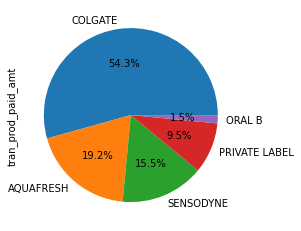

In [101]:
# Market share pie plot

market_share.plot.pie(autopct="%.1f%%", normalize=False);

In [102]:
# Total toothpaste revenue by brand percentage change from 2016 to 2017

(toothpaste[toothpaste['year'] == 2017].groupby('brand_desc').tran_prod_paid_amt.sum().sort_values(ascending=False) - toothpaste[toothpaste['year'] == 2016].groupby('brand_desc').tran_prod_paid_amt.sum().sort_values(ascending=False)) / toothpaste[toothpaste['year'] == 2016].groupby('brand_desc').tran_prod_paid_amt.sum().sort_values(ascending=False)

brand_desc
COLGATE          0.239131
AQUAFRESH        0.006827
SENSODYNE        0.128910
PRIVATE LABEL    0.054073
ORAL B           0.463363
Name: tran_prod_paid_amt, dtype: float64

In [103]:
# Total toothpaste discount by brand in 2016

toothpaste[toothpaste['year'] == 2016].groupby('brand_desc').tran_prod_discount_amt.sum().sort_values()

brand_desc
COLGATE         -44043.85
AQUAFRESH       -17333.98
SENSODYNE        -7000.69
PRIVATE LABEL     -179.78
ORAL B            -124.46
Name: tran_prod_discount_amt, dtype: float64

In [104]:
# Total toothpaste discount by brand in 2017

toothpaste[toothpaste['year'] == 2017].groupby('brand_desc').tran_prod_discount_amt.sum().sort_values()

brand_desc
COLGATE         -22648.35
AQUAFRESH        -6433.18
SENSODYNE        -3948.80
ORAL B            -216.61
PRIVATE LABEL     -150.14
Name: tran_prod_discount_amt, dtype: float64

In [105]:
# Total toothpaste discount by brand

toothpaste.groupby('brand_desc').tran_prod_discount_amt.sum().sort_values()

brand_desc
COLGATE         -66692.20
AQUAFRESH       -23767.16
SENSODYNE       -10949.49
ORAL B            -341.07
PRIVATE LABEL     -329.92
Name: tran_prod_discount_amt, dtype: float64

In [106]:
# Total toothpaste discount by brand percentage change from 2016 to 2017

(toothpaste[toothpaste['year'] == 2017].groupby('brand_desc').tran_prod_discount_amt.sum().sort_values(ascending=False) - toothpaste[toothpaste['year'] == 2016].groupby('brand_desc').tran_prod_discount_amt.sum().sort_values(ascending=False)) / toothpaste[toothpaste['year'] == 2016].groupby('brand_desc').tran_prod_discount_amt.sum().sort_values(ascending=False)

brand_desc
AQUAFRESH       -0.628869
COLGATE         -0.485777
ORAL B           0.740399
PRIVATE LABEL   -0.164868
SENSODYNE       -0.435941
Name: tran_prod_discount_amt, dtype: float64

In [107]:
# Avg toothpaste discount by brand in 2016

toothpaste[toothpaste['year'] == 2016].groupby('brand_desc').tran_prod_discount_amt.mean().sort_values()

brand_desc
COLGATE         -1.567453
AQUAFRESH       -1.351261
SENSODYNE       -1.215398
ORAL B          -0.257681
PRIVATE LABEL   -0.013591
Name: tran_prod_discount_amt, dtype: float64

In [108]:
# Avg toothpaste discount by brand in 2017

toothpaste[toothpaste['year'] == 2017].groupby('brand_desc').tran_prod_discount_amt.mean().sort_values()

brand_desc
SENSODYNE       -0.698779
COLGATE         -0.686626
AQUAFRESH       -0.592647
ORAL B          -0.303801
PRIVATE LABEL   -0.010794
Name: tran_prod_discount_amt, dtype: float64

In [109]:
# Total toothpaste quantity sold by brand in 2016

toothpaste[toothpaste['year'] == 2016].groupby('brand_desc').tran_prod_sale_qty.sum().sort_values(ascending=False)

brand_desc
COLGATE          34974.0
PRIVATE LABEL    15123.0
AQUAFRESH        14638.0
SENSODYNE         6564.0
ORAL B             520.0
Name: tran_prod_sale_qty, dtype: float64

In [110]:
# Total toothpaste quantity sold by brand in 2017

toothpaste[toothpaste['year'] == 2017].groupby('brand_desc').tran_prod_sale_qty.sum().sort_values(ascending=False)

brand_desc
COLGATE          38120.0
PRIVATE LABEL    15879.0
AQUAFRESH        12119.0
SENSODYNE         6265.0
ORAL B             781.0
Name: tran_prod_sale_qty, dtype: float64

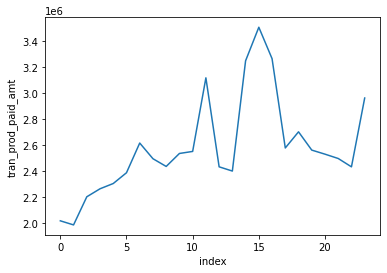

In [111]:
# REVENUE CHANGE OVER TIME

tmp = transaction_product.groupby(["year","month"]).agg({"tran_prod_paid_amt":"sum"}).reset_index().reset_index()

sns.lineplot(data=tmp, x="index", y="tran_prod_paid_amt");

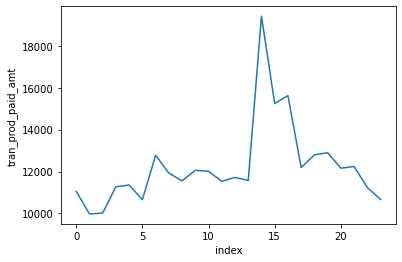

In [112]:
# REVENUE CHANGE OVER TIME FOR TOOTHPASTE

tmp = toothpaste.groupby(["year","month"]).agg({"tran_prod_paid_amt":"sum"}).reset_index().reset_index()

sns.lineplot(data=tmp, x="index", y="tran_prod_paid_amt");

In [113]:
# Units of toothpaste customers are buying - percentage

transaction_product.loc[transaction_product.category_desc_eng == "TOOTHPASTE","tran_prod_sale_qty"].value_counts(normalize = True)

1.0     0.857049
2.0     0.128864
3.0     0.008907
4.0     0.004208
5.0     0.000426
6.0     0.000353
12.0    0.000064
8.0     0.000040
9.0     0.000040
7.0     0.000032
10.0    0.000016
Name: tran_prod_sale_qty, dtype: float64

In [114]:
# Formatting the product list by adding brand name and subcategories

transaction_product["product_name"] =  transaction_product["brand_desc"] + "_" + transaction_product["sub_category_desc"]

In [115]:
# Formatting the category list by adding up brand name and category

transaction_product["category_name"] =  transaction_product["brand_desc"] + "_" + transaction_product["category_desc_eng"]

In [116]:
# Units of COLGATE toothpaste customers are buying - percentage

transaction_product.loc[transaction_product.category_name == "COLGATE_TOOTHPASTE","tran_prod_sale_qty"].value_counts(normalize = True)

1.0     0.825830
2.0     0.159796
3.0     0.008398
4.0     0.004977
5.0     0.000458
6.0     0.000360
7.0     0.000049
9.0     0.000049
10.0    0.000033
12.0    0.000033
8.0     0.000016
Name: tran_prod_sale_qty, dtype: float64

In [117]:
# Units of PRIVATE LABEL toothpaste customers are buying - percentage

transaction_product.loc[transaction_product.category_name == "PRIVATE LABEL_TOOTHPASTE","tran_prod_sale_qty"].value_counts(normalize = True)

1.0     0.878247
2.0     0.107307
3.0     0.010281
4.0     0.003353
5.0     0.000369
6.0     0.000258
12.0    0.000111
7.0     0.000037
9.0     0.000037
Name: tran_prod_sale_qty, dtype: float64

In [118]:
# Units of AQUAFRESH toothpaste customers are buying - percentage

transaction_product.loc[transaction_product.category_name == "AQUAFRESH_TOOTHPASTE","tran_prod_sale_qty"].value_counts(normalize = True)

1.0     0.889625
2.0     0.097074
3.0     0.009120
4.0     0.003336
6.0     0.000380
5.0     0.000338
12.0    0.000084
8.0     0.000042
Name: tran_prod_sale_qty, dtype: float64

In [119]:
# Units of SENSODYNE toothpaste customers are buying - percentage

transaction_product.loc[transaction_product.category_name == "SENSODYNE_TOOTHPASTE","tran_prod_sale_qty"].value_counts(normalize = True)

1.0     0.899132
2.0     0.086934
3.0     0.008150
4.0     0.004294
5.0     0.000613
6.0     0.000438
8.0     0.000263
9.0     0.000088
12.0    0.000088
Name: tran_prod_sale_qty, dtype: float64

In [120]:
# Units of ORAL b toothpaste customers are buying - percentage

transaction_product.loc[transaction_product.category_name == "ORAL B_TOOTHPASTE","tran_prod_sale_qty"].value_counts(normalize = True)

1.0    0.923913
2.0    0.067726
3.0    0.006689
6.0    0.000836
4.0    0.000836
Name: tran_prod_sale_qty, dtype: float64

In [121]:
# Brand overview

tmp = transaction_product.loc[transaction_product.category_desc_eng == "TOOTHPASTE",["brand_desc","tran_prod_discount_amt","tran_prod_sale_amt"]].groupby("brand_desc").sum()

tmp["discount_ratio"] = abs(tmp["tran_prod_discount_amt"]/tmp["tran_prod_sale_amt"])

tmp.sort_values(by = "discount_ratio", ascending = False)

tran_prod_discount_amt  tran_prod_sale_amt  discount_ratio
brand_desc                                                               
AQUAFRESH                   -23767.16            80095.51        0.296735
COLGATE                     -66692.20           226406.85        0.294568
SENSODYNE                   -10949.49            56547.81        0.193632
ORAL B                        -341.07             4814.39        0.070844
PRIVATE LABEL                 -329.92            28149.85        0.011720

In [122]:
# Checking differences among the toothpaste brands product-wise

tmp = transaction_product.loc[transaction_product.category_desc_eng == "TOOTHPASTE", :].groupby("category_name").agg({"prod_unit_price":"mean","tran_prod_discount_amt":"sum","tran_prod_sale_amt":"sum","margin":"sum","tran_prod_paid_amt":"sum"})

tmp["margin_ratio"] = tmp["margin"]/tmp["tran_prod_paid_amt"]
tmp["discount_ratio"] = tmp["tran_prod_discount_amt"]/tmp["tran_prod_sale_amt"]

tmp.iloc[:,[0,5,6]]

prod_unit_price  margin_ratio  discount_ratio
category_name                                                          
AQUAFRESH_TOOTHPASTE             2.999739      0.179593       -0.296735
COLGATE_TOOTHPASTE               3.100849      0.231782       -0.294568
ORAL B_TOOTHPASTE                3.696856      0.099702       -0.070844
PRIVATE LABEL_TOOTHPASTE         0.909140      0.091354       -0.011720
SENSODYNE_TOOTHPASTE             4.428327      0.124185       -0.193632

In [279]:
# product overview

tmp = transaction_product.loc[transaction_product.category_name == "COLGATE_TOOTHPASTE",["product_name","tran_prod_discount_amt","tran_prod_sale_amt"]].groupby("product_name").sum()

tmp["discount_ratio"] = abs(tmp["tran_prod_discount_amt"]/tmp["tran_prod_sale_amt"])

tmp.sort_values(by = "discount_ratio", ascending = False)

tran_prod_discount_amt  tran_prod_sale_amt  \
product_name                                                               
COLGATE_PASTA DENTIFR BRANQ                 -8589.93            28750.44   
COLGATE_PASTA DENTIFR TRADIC               -56878.16           190836.62   
COLGATE_PASTA DENTIFR INFANT                 -591.06             3222.67   
COLGATE_PASTA DENTIFR MEDICI                 -633.05             3597.12   

                              discount_ratio  
product_name                                  
COLGATE_PASTA DENTIFR BRANQ         0.298776  
COLGATE_PASTA DENTIFR TRADIC        0.298046  
COLGATE_PASTA DENTIFR INFANT        0.183407  
COLGATE_PASTA DENTIFR MEDICI        0.175988

In [123]:
# SUB-CATEGORIES - Total revenue by brand 2016

toothpaste[toothpaste['year'] == 2016].groupby(['brand_desc', 'sub_category_desc']).tran_prod_paid_amt.sum().sort_values(ascending=False)

brand_desc     sub_category_desc   
COLGATE        PASTA DENTIFR TRADIC    60286.23
SENSODYNE      PASTA SENSIB DENTARI    17618.71
AQUAFRESH      PASTA DENTIFR BRANQ     10946.77
               PASTA DENTIFR TRADIC    10536.07
PRIVATE LABEL  PASTA DENTIFR TRADIC     8665.43
COLGATE        PASTA DENTIFR BRANQ      8569.77
SENSODYNE      PASTA DENTIFR TRADIC     3799.91
AQUAFRESH      PASTA DENTIFR MEDICI     3649.72
               PASTA DENTIFR INFANT     2935.80
PRIVATE LABEL  PASTA DENTIFR BRANQ      2271.13
ORAL B         PASTA DENTIFR TRADIC     1815.94
COLGATE        PASTA DENTIFR MEDICI     1455.88
PRIVATE LABEL  PASTA DENTIFR INFANT     1388.41
               PASTA DENTIFR 2 EM 1     1218.82
COLGATE        PASTA DENTIFR INFANT     1016.99
Name: tran_prod_paid_amt, dtype: float64

In [124]:
# SUB-CATEGORIES - Total revenue by brand 2017

toothpaste[toothpaste['year'] == 2017].groupby(['brand_desc', 'sub_category_desc']).tran_prod_paid_amt.sum().sort_values(ascending=False)

brand_desc     sub_category_desc   
COLGATE        PASTA DENTIFR TRADIC    73672.23
SENSODYNE      PASTA SENSIB DENTARI    18113.51
AQUAFRESH      PASTA DENTIFR TRADIC    12128.41
COLGATE        PASTA DENTIFR BRANQ     11590.74
PRIVATE LABEL  PASTA DENTIFR TRADIC    10109.76
AQUAFRESH      PASTA DENTIFR BRANQ      9062.27
SENSODYNE      PASTA DENTIFR TRADIC     4328.43
AQUAFRESH      PASTA DENTIFR MEDICI     3578.44
               PASTA DENTIFR INFANT     3490.87
ORAL B         PASTA DENTIFR TRADIC     2657.38
PRIVATE LABEL  PASTA DENTIFR BRANQ      1877.54
SENSODYNE      PASTA DENTIFR MEDICI     1737.76
COLGATE        PASTA DENTIFR INFANT     1614.62
               PASTA DENTIFR MEDICI     1508.19
PRIVATE LABEL  PASTA DENTIFR 2 EM 1     1239.96
               PASTA DENTIFR INFANT     1048.88
Name: tran_prod_paid_amt, dtype: float64

In [125]:
# SUB-CATEGORIES - Total revenue - percentage change from 2016 to 2017

((toothpaste[toothpaste['year'] == 2017].groupby(['brand_desc', 'sub_category_desc']).tran_prod_paid_amt.sum().sort_values(ascending=False)) - (toothpaste[toothpaste['year'] == 2016].groupby(['brand_desc', 'sub_category_desc']).tran_prod_paid_amt.sum().sort_values(ascending=False))) / (toothpaste[toothpaste['year'] == 2016].groupby(['brand_desc', 'sub_category_desc']).tran_prod_paid_amt.sum().sort_values(ascending=False)).sort_values()

brand_desc     sub_category_desc   
AQUAFRESH      PASTA DENTIFR BRANQ    -0.172151
               PASTA DENTIFR INFANT    0.189069
               PASTA DENTIFR MEDICI   -0.019530
               PASTA DENTIFR TRADIC    0.151132
COLGATE        PASTA DENTIFR BRANQ     0.352515
               PASTA DENTIFR INFANT    0.587646
               PASTA DENTIFR MEDICI    0.035930
               PASTA DENTIFR TRADIC    0.222041
ORAL B         PASTA DENTIFR TRADIC    0.463363
PRIVATE LABEL  PASTA DENTIFR 2 EM 1    0.017345
               PASTA DENTIFR BRANQ    -0.173301
               PASTA DENTIFR INFANT   -0.244546
               PASTA DENTIFR TRADIC    0.166677
SENSODYNE      PASTA DENTIFR MEDICI         NaN
               PASTA DENTIFR TRADIC    0.139088
               PASTA SENSIB DENTARI    0.028084
Name: tran_prod_paid_amt, dtype: float64

In [126]:
# SUB-CATEGORIES - Total revenue

toothpaste.groupby(['brand_desc', 'sub_category_desc']).tran_prod_paid_amt.sum().sort_values(ascending=False)

brand_desc     sub_category_desc   
COLGATE        PASTA DENTIFR TRADIC    133958.46
SENSODYNE      PASTA SENSIB DENTARI     35732.22
AQUAFRESH      PASTA DENTIFR TRADIC     22664.48
COLGATE        PASTA DENTIFR BRANQ      20160.51
AQUAFRESH      PASTA DENTIFR BRANQ      20009.04
PRIVATE LABEL  PASTA DENTIFR TRADIC     18775.19
SENSODYNE      PASTA DENTIFR TRADIC      8128.34
AQUAFRESH      PASTA DENTIFR MEDICI      7228.16
               PASTA DENTIFR INFANT      6426.67
ORAL B         PASTA DENTIFR TRADIC      4473.32
PRIVATE LABEL  PASTA DENTIFR BRANQ       4148.67
COLGATE        PASTA DENTIFR MEDICI      2964.07
               PASTA DENTIFR INFANT      2631.61
PRIVATE LABEL  PASTA DENTIFR 2 EM 1      2458.78
               PASTA DENTIFR INFANT      2437.29
SENSODYNE      PASTA DENTIFR MEDICI      1737.76
Name: tran_prod_paid_amt, dtype: float64

In [127]:
# SUB-CATEGORIES - Total revenue TABLE

product_by_brand_rev = toothpaste.pivot_table(index='brand_desc', columns='sub_category_desc', values='tran_prod_paid_amt', aggfunc='sum', fill_value='-')

product_by_brand_rev

sub_category_desc PASTA DENTIFR 2 EM 1 PASTA DENTIFR BRANQ  \
brand_desc                                                   
AQUAFRESH                            -            20009.04   
COLGATE                              -            20160.51   
ORAL B                               -                   -   
PRIVATE LABEL                  2458.78             4148.67   
SENSODYNE                            -                   -   

sub_category_desc PASTA DENTIFR INFANT PASTA DENTIFR MEDICI  \
brand_desc                                                    
AQUAFRESH                      6426.67              7228.16   
COLGATE                        2631.61              2964.07   
ORAL B                               -                    -   
PRIVATE LABEL                  2437.29                    -   
SENSODYNE                            -              1737.76   

sub_category_desc  PASTA DENTIFR TRADIC PASTA SENSIB DENTARI  
brand_desc                                                    
AQUAFRESH                      22664.48                    -  
COLGATE                       133958.46                    -  
ORAL B                          4473.32                    -  
PRIVATE LABEL                  18775.19                    -  
SENSODYNE                       8128.34             35732.22

In [128]:
# SUB-CATEGORIES - Total discount

toothpaste.groupby(['brand_desc', 'sub_category_desc']).tran_prod_discount_amt.sum().sort_values()

brand_desc     sub_category_desc   
COLGATE        PASTA DENTIFR TRADIC   -56878.16
AQUAFRESH      PASTA DENTIFR BRANQ    -12223.20
COLGATE        PASTA DENTIFR BRANQ     -8589.93
AQUAFRESH      PASTA DENTIFR TRADIC    -7243.82
SENSODYNE      PASTA SENSIB DENTARI    -6222.33
               PASTA DENTIFR TRADIC    -4531.79
AQUAFRESH      PASTA DENTIFR MEDICI    -3750.36
COLGATE        PASTA DENTIFR MEDICI     -633.05
               PASTA DENTIFR INFANT     -591.06
AQUAFRESH      PASTA DENTIFR INFANT     -549.78
ORAL B         PASTA DENTIFR TRADIC     -341.07
PRIVATE LABEL  PASTA DENTIFR TRADIC     -195.55
SENSODYNE      PASTA DENTIFR MEDICI     -195.37
PRIVATE LABEL  PASTA DENTIFR BRANQ       -67.19
               PASTA DENTIFR INFANT      -40.07
               PASTA DENTIFR 2 EM 1      -27.11
Name: tran_prod_discount_amt, dtype: float64

In [129]:
# SUB-CATEGORIES - Total discount by brand 2017

toothpaste[toothpaste['year'] == 2017].groupby(['brand_desc', 'sub_category_desc']).tran_prod_discount_amt.sum().sort_values()

brand_desc     sub_category_desc   
COLGATE        PASTA DENTIFR TRADIC   -18921.44
               PASTA DENTIFR BRANQ     -3323.68
AQUAFRESH      PASTA DENTIFR BRANQ     -2593.32
SENSODYNE      PASTA SENSIB DENTARI    -2110.13
AQUAFRESH      PASTA DENTIFR TRADIC    -2085.12
SENSODYNE      PASTA DENTIFR TRADIC    -1643.30
AQUAFRESH      PASTA DENTIFR MEDICI    -1433.27
               PASTA DENTIFR INFANT     -321.47
COLGATE        PASTA DENTIFR INFANT     -282.03
ORAL B         PASTA DENTIFR TRADIC     -216.61
SENSODYNE      PASTA DENTIFR MEDICI     -195.37
COLGATE        PASTA DENTIFR MEDICI     -121.20
PRIVATE LABEL  PASTA DENTIFR TRADIC     -100.97
               PASTA DENTIFR BRANQ       -19.05
               PASTA DENTIFR INFANT      -17.73
               PASTA DENTIFR 2 EM 1      -12.39
Name: tran_prod_discount_amt, dtype: float64

In [130]:
# SUB-CATEGORIES - Total discount TABLE

product_by_brand_disc = toothpaste.pivot_table(index='brand_desc', columns='sub_category_desc', values='tran_prod_discount_amt', aggfunc='sum', fill_value='-')

product_by_brand_disc

sub_category_desc PASTA DENTIFR 2 EM 1 PASTA DENTIFR BRANQ  \
brand_desc                                                   
AQUAFRESH                            -            -12223.2   
COLGATE                              -            -8589.93   
ORAL B                               -                   -   
PRIVATE LABEL                   -27.11              -67.19   
SENSODYNE                            -                   -   

sub_category_desc PASTA DENTIFR INFANT PASTA DENTIFR MEDICI  \
brand_desc                                                    
AQUAFRESH                      -549.78             -3750.36   
COLGATE                        -591.06              -633.05   
ORAL B                               -                    -   
PRIVATE LABEL                   -40.07                    -   
SENSODYNE                            -              -195.37   

sub_category_desc  PASTA DENTIFR TRADIC PASTA SENSIB DENTARI  
brand_desc                                                    
AQUAFRESH                      -7243.82                    -  
COLGATE                       -56878.16                    -  
ORAL B                          -341.07                    -  
PRIVATE LABEL                   -195.55                    -  
SENSODYNE                      -4531.79             -6222.33

In [131]:
# SUB-CATEGORIES - BASE PRICE by brand 2016

toothpaste[toothpaste['year'] == 2016].groupby(['brand_desc', 'sub_category_desc']).tran_prod_sale_amt.agg(['max', 'min', 'mean', 'median', 'std'])

max   min      mean  median       std
brand_desc    sub_category_desc                                            
AQUAFRESH     PASTA DENTIFR BRANQ   37.08  1.54  3.734419    3.09  1.526939
              PASTA DENTIFR INFANT   8.22  2.05  2.795150    2.74  0.481088
              PASTA DENTIFR MEDICI  23.96  2.99  5.139371    5.99  2.047472
              PASTA DENTIFR TRADIC  35.94  1.24  3.123337    2.49  2.008826
COLGATE       PASTA DENTIFR BRANQ   19.96  1.49  4.500982    3.99  1.786851
              PASTA DENTIFR INFANT  10.76  1.99  2.901575    2.69  1.129574
              PASTA DENTIFR MEDICI  31.43  2.24  5.110987    4.49  2.761485
              PASTA DENTIFR TRADIC  35.91  1.49  4.062480    3.98  2.009265
ORAL B        PASTA DENTIFR TRADIC  23.94  1.39  4.017391    3.99  1.420230
PRIVATE LABEL PASTA DENTIFR 2 EM 1   3.96  0.99  1.105323    0.99  0.359290
              PASTA DENTIFR BRANQ    5.34  0.88  1.031704    0.89  0.377832
              PASTA DENTIFR INFANT   8.91  0.99  1.056742    0.99  0.347048
              PASTA DENTIFR TRADIC  11.28  0.66  1.027085    0.89  0.403570
SENSODYNE     PASTA DENTIFR TRADIC  39.95  3.99  7.456410    7.99  3.224657
              PASTA SENSIB DENTARI  35.91  1.24  4.468622    3.99  1.989883

In [132]:
# SUB-CATEGORIES - BASE PRICE by brand 2017

toothpaste[toothpaste['year'] == 2017].groupby(['brand_desc', 'sub_category_desc']).tran_prod_sale_amt.agg(['max', 'min', 'mean', 'median', 'std'])

max   min      mean  median       std
brand_desc    sub_category_desc                                            
AQUAFRESH     PASTA DENTIFR BRANQ   15.95  1.59  3.792903    3.49  1.335922
              PASTA DENTIFR INFANT  11.16  2.09  2.921333    2.79  0.665980
              PASTA DENTIFR MEDICI  18.76  2.34  4.602121    4.69  1.617089
              PASTA DENTIFR TRADIC  29.88  1.24  2.637997    2.14  1.193037
COLGATE       PASTA DENTIFR BRANQ   24.56  1.49  3.918660    2.99  1.686948
              PASTA DENTIFR INFANT  26.90  1.34  2.563041    2.69  1.294293
              PASTA DENTIFR MEDICI  31.43  2.91  5.140032    4.49  2.366599
              PASTA DENTIFR TRADIC  35.91  1.49  3.292571    2.99  1.639552
ORAL B        PASTA DENTIFR TRADIC  15.96  2.59  4.030842    3.99  1.425953
PRIVATE LABEL PASTA DENTIFR 2 EM 1   4.95  0.99  1.139536    0.99  0.412826
              PASTA DENTIFR BRANQ    4.45  0.89  0.999257    0.89  0.331006
              PASTA DENTIFR INFANT   4.95  0.74  1.021657    0.99  0.240994
              PASTA DENTIFR TRADIC  11.28  0.84  1.034731    0.89  0.418158
SENSODYNE     PASTA DENTIFR MEDICI  15.96  2.99  4.485220    3.99  1.555566
              PASTA DENTIFR TRADIC  31.96  3.99  6.505153    6.14  2.908876
              PASTA SENSIB DENTARI  34.32  1.99  4.700986    4.29  1.819073

In [133]:
# SUB-CATEGORIES - FINAL PRICE AFTER DISCOUNT by brand 2016

toothpaste[toothpaste['year'] == 2016].groupby(['brand_desc', 'sub_category_desc']).tran_prod_paid_amt.agg(['max', 'min', 'mean', 'median', 'std'])

max   min      mean  median       std
brand_desc    sub_category_desc                                            
AQUAFRESH     PASTA DENTIFR BRANQ   18.48  1.27  1.986710    1.54  0.896384
              PASTA DENTIFR INFANT   8.22  1.72  2.593463    2.74  0.524113
              PASTA DENTIFR MEDICI  17.94  2.54  3.143600    2.99  0.867524
              PASTA DENTIFR TRADIC  14.34  1.05  2.096730    1.89  0.939630
COLGATE       PASTA DENTIFR BRANQ   13.44  1.19  2.787824    2.99  0.908669
              PASTA DENTIFR INFANT   6.45  1.34  2.225361    2.42  0.772639
              PASTA DENTIFR MEDICI  17.96  2.01  3.781506    4.19  2.018275
              PASTA DENTIFR TRADIC  26.88  0.98  2.492918    1.99  1.060213
ORAL B        PASTA DENTIFR TRADIC  23.94  1.39  3.759710    3.99  1.431466
PRIVATE LABEL PASTA DENTIFR 2 EM 1   3.96  0.69  1.092133    0.99  0.358597
              PASTA DENTIFR BRANQ    5.34  0.66  1.010289    0.89  0.365469
              PASTA DENTIFR INFANT   7.57  0.74  1.040007    0.99  0.321853
              PASTA DENTIFR TRADIC  11.28  0.63  1.015996    0.89  0.396337
SENSODYNE     PASTA DENTIFR TRADIC  19.95  2.71  4.236243    3.99  1.378846
              PASTA SENSIB DENTARI  23.88  1.24  3.623013    3.75  1.595887

In [134]:
# SUB-CATEGORIES - FINAL PRICE AFTER DISCOUNT by brand 2017

toothpaste[toothpaste['year'] == 2017].groupby(['brand_desc', 'sub_category_desc']).tran_prod_paid_amt.agg(['max', 'min', 'mean', 'median', 'std'])

max   min      mean  median       std
brand_desc    sub_category_desc                                            
AQUAFRESH     PASTA DENTIFR BRANQ   12.76  1.39  2.948998    3.06  1.287659
              PASTA DENTIFR INFANT  11.16  1.59  2.674996    2.79  0.639987
              PASTA DENTIFR MEDICI  11.96  1.65  3.285987    2.99  0.967807
              PASTA DENTIFR TRADIC  19.08  0.00  2.251004    1.99  1.050692
COLGATE       PASTA DENTIFR BRANQ   19.95  0.00  3.045386    2.99  1.275116
              PASTA DENTIFR INFANT  26.90  0.00  2.181919    1.99  1.228843
              PASTA DENTIFR MEDICI  31.43  2.86  4.757697    4.49  2.199318
              PASTA DENTIFR TRADIC  23.94  0.00  2.619737    1.99  1.334957
ORAL B        PASTA DENTIFR TRADIC  11.97  1.25  3.727041    3.99  1.347801
PRIVATE LABEL PASTA DENTIFR 2 EM 1   4.95  0.23  1.128262    0.99  0.409972
              PASTA DENTIFR BRANQ    4.00  0.00  0.989220    0.89  0.323853
              PASTA DENTIFR INFANT   4.95  0.27  1.004674    0.99  0.245082
              PASTA DENTIFR TRADIC  11.28  0.15  1.024499    0.89  0.416481
SENSODYNE     PASTA DENTIFR MEDICI  15.96  2.69  4.031926    3.99  1.545203
              PASTA DENTIFR TRADIC  24.76  1.99  4.715065    3.99  1.717714
              PASTA SENSIB DENTARI  34.32  0.82  4.210486    3.99  1.668961

In [135]:
# SUB-CATEGORIES - highest units sold

toothpaste.groupby(['brand_desc', 'sub_category_desc']).tran_prod_sale_qty.sum().sort_values(ascending=False)

brand_desc     sub_category_desc   
COLGATE        PASTA DENTIFR TRADIC    62325.0
PRIVATE LABEL  PASTA DENTIFR TRADIC    21240.0
AQUAFRESH      PASTA DENTIFR TRADIC    11868.0
SENSODYNE      PASTA SENSIB DENTARI    10390.0
AQUAFRESH      PASTA DENTIFR BRANQ      9982.0
COLGATE        PASTA DENTIFR BRANQ      8636.0
PRIVATE LABEL  PASTA DENTIFR BRANQ      4737.0
AQUAFRESH      PASTA DENTIFR INFANT     2534.0
PRIVATE LABEL  PASTA DENTIFR INFANT     2514.0
               PASTA DENTIFR 2 EM 1     2511.0
AQUAFRESH      PASTA DENTIFR MEDICI     2373.0
SENSODYNE      PASTA DENTIFR TRADIC     1952.0
COLGATE        PASTA DENTIFR INFANT     1312.0
ORAL B         PASTA DENTIFR TRADIC     1301.0
COLGATE        PASTA DENTIFR MEDICI      821.0
SENSODYNE      PASTA DENTIFR MEDICI      487.0
Name: tran_prod_sale_qty, dtype: float64

In [136]:
# SUB-CATEGORIES - highest unit sold percentage change from 2016 to 2017

((toothpaste[toothpaste['year'] == 2017].groupby(['brand_desc', 'sub_category_desc']).tran_prod_sale_qty.sum().sort_values(ascending=False) - toothpaste[toothpaste['year'] == 2016].groupby(['brand_desc', 'sub_category_desc']).tran_prod_sale_qty.sum().sort_values(ascending=False)) / toothpaste[toothpaste['year'] == 2016].groupby(['brand_desc', 'sub_category_desc']).tran_prod_sale_qty.sum().sort_values(ascending=False)).sort_values(ascending=False)

brand_desc     sub_category_desc   
COLGATE        PASTA DENTIFR INFANT    0.598020
ORAL B         PASTA DENTIFR TRADIC    0.501923
AQUAFRESH      PASTA DENTIFR INFANT    0.173242
PRIVATE LABEL  PASTA DENTIFR TRADIC    0.157221
COLGATE        PASTA DENTIFR TRADIC    0.095733
AQUAFRESH      PASTA DENTIFR TRADIC    0.055777
SENSODYNE      PASTA DENTIFR TRADIC    0.033333
COLGATE        PASTA DENTIFR BRANQ     0.021062
PRIVATE LABEL  PASTA DENTIFR 2 EM 1    0.015249
AQUAFRESH      PASTA DENTIFR MEDICI   -0.053322
SENSODYNE      PASTA SENSIB DENTARI   -0.145967
PRIVATE LABEL  PASTA DENTIFR BRANQ    -0.182272
COLGATE        PASTA DENTIFR MEDICI   -0.203501
PRIVATE LABEL  PASTA DENTIFR INFANT   -0.235789
AQUAFRESH      PASTA DENTIFR BRANQ    -0.459568
SENSODYNE      PASTA DENTIFR MEDICI         NaN
Name: tran_prod_sale_qty, dtype: float64

In [137]:
# Product ID - highest units sold

toothpaste.groupby(['prod_id', 'brand_desc']).tran_prod_sale_qty.sum().sort_values(ascending=False)

prod_id    brand_desc   
999331572  COLGATE          8563.0
999180321  COLGATE          7244.0
999275732  AQUAFRESH        6246.0
999223643  COLGATE          5783.0
999177170  COLGATE          5688.0
999297468  PRIVATE LABEL    5538.0
999222814  COLGATE          5527.0
999297467  PRIVATE LABEL    5228.0
999433934  COLGATE          5040.0
999302196  COLGATE          4919.0
999297469  PRIVATE LABEL    4737.0
999180064  COLGATE          4423.0
999297381  PRIVATE LABEL    3921.0
999271738  AQUAFRESH        3832.0
999383537  COLGATE          3625.0
999251773  COLGATE          3092.0
999340546  AQUAFRESH        2808.0
999297471  PRIVATE LABEL    2667.0
999180065  COLGATE          2652.0
999297464  PRIVATE LABEL    2514.0
999186288  COLGATE          2455.0
999227536  AQUAFRESH        2373.0
999946116  COLGATE          2142.0
999177821  PRIVATE LABEL    1972.0
999192528  PRIVATE LABEL    1914.0
999689497  AQUAFRESH        1883.0
999184126  SENSODYNE        1741.0
999442370  SENSODYNE        17

In [138]:
# Product ID - highest unit sold percentage change from 2016 to 2017

((toothpaste[toothpaste['year'] == 2017].groupby(['prod_id', 'brand_desc']).tran_prod_sale_qty.sum().sort_values(ascending=False) - toothpaste[toothpaste['year'] == 2016].groupby(['prod_id', 'brand_desc']).tran_prod_sale_qty.sum().sort_values(ascending=False)) / toothpaste[toothpaste['year'] == 2016].groupby(['prod_id', 'brand_desc']).tran_prod_sale_qty.sum().sort_values(ascending=False)).sort_values(ascending=False)

prod_id    brand_desc   
999243929  AQUAFRESH        4.894737
999180064  COLGATE          2.636268
999180065  COLGATE          2.556701
999689498  AQUAFRESH        2.384409
999174859  COLGATE          2.159574
999180321  COLGATE          1.896719
999175007  COLGATE          1.786885
999689497  AQUAFRESH        1.519626
999433934  COLGATE          1.236994
999177821  PRIVATE LABEL    1.120253
999273837  SENSODYNE        0.908784
999275750  ORAL B           0.855769
999946116  COLGATE          0.778210
999275753  ORAL B           0.661654
999329082  SENSODYNE        0.616558
999226037  ORAL B           0.474453
999383537  COLGATE          0.432886
999408976  SENSODYNE        0.343750
999192528  PRIVATE LABEL    0.262411
999251672  SENSODYNE        0.244681
999396632  AQUAFRESH        0.228070
999442371  SENSODYNE        0.210158
999442370  SENSODYNE        0.189017
999223643  COLGATE          0.169981
999273822  SENSODYNE        0.153226
999297467  PRIVATE LABEL    0.148788
999393092  AQ

In [139]:
# Product ID - Most discounted products

toothpaste.groupby(['prod_id', 'brand_desc']).tran_prod_discount_amt.sum().sort_values()

prod_id    brand_desc   
999331572  COLGATE         -12955.58
999302196  COLGATE          -8175.57
999177170  COLGATE          -8104.65
999275732  AQUAFRESH        -7528.14
999222814  COLGATE          -5249.56
999223643  COLGATE          -4885.06
999184126  SENSODYNE        -4521.08
999227536  AQUAFRESH        -3750.36
999186288  COLGATE          -3681.64
999251773  COLGATE          -3322.01
999271738  AQUAFRESH        -3309.87
999383537  COLGATE          -3260.70
999183912  AQUAFRESH        -2252.39
999181615  AQUAFRESH        -2116.78
999238705  SENSODYNE        -2076.07
999260561  COLGATE          -1824.40
999182984  AQUAFRESH        -1722.94
999180321  COLGATE          -1662.64
999197853  COLGATE          -1659.21
999197204  COLGATE          -1655.20
999175483  COLGATE          -1295.65
999377906  SENSODYNE        -1285.90
999433934  COLGATE          -1220.34
999180064  COLGATE          -1161.50
999152257  COLGATE           -986.21
999180065  COLGATE           -722.68
999329082  SE

In [140]:
# Product ID - Total discount percentage change from 2016 to 2017

((toothpaste[toothpaste['year'] == 2017].groupby(['prod_id', 'brand_desc']).tran_prod_discount_amt.sum().sort_values(ascending=False) - toothpaste[toothpaste['year'] == 2016].groupby(['prod_id', 'brand_desc']).tran_prod_discount_amt.sum().sort_values(ascending=False)) / toothpaste[toothpaste['year'] == 2016].groupby(['prod_id', 'brand_desc']).tran_prod_discount_amt.sum().sort_values(ascending=False)).sort_values(ascending=False)

prod_id    brand_desc   
999689498  AQUAFRESH        77.403226
999243929  AQUAFRESH        43.549525
999275750  ORAL B           26.452381
999689497  AQUAFRESH        17.140023
999180064  COLGATE           5.627397
999433934  COLGATE           5.222656
999180065  COLGATE           4.582984
999946116  COLGATE           4.421195
999180321  COLGATE           4.374176
999275753  ORAL B            2.353448
999273837  SENSODYNE         2.141902
999340546  AQUAFRESH         1.840795
999329082  SENSODYNE         1.612466
999297467  PRIVATE LABEL     1.132727
999297471  PRIVATE LABEL     0.838261
999297381  PRIVATE LABEL     0.712860
999251672  SENSODYNE         0.697733
999226037  ORAL B            0.665144
999396632  AQUAFRESH         0.560006
999442370  SENSODYNE         0.356179
999393092  AQUAFRESH         0.339930
999177821  PRIVATE LABEL     0.331107
999297475  PRIVATE LABEL     0.261868
999174859  COLGATE           0.214411
999442371  SENSODYNE         0.200882
999273822  SENSODYNE     

In [141]:
# Product ID = 999363685 in 2016 - summary stats

toothpaste[(toothpaste['prod_id'] == 999363685) & (toothpaste['year'] == 2016)].tran_prod_discount_amt.agg(['max', 'min', 'mean', 'median', 'std'])

max       0.000000
min      -2.550000
mean     -0.065378
median    0.000000
std       0.312729
Name: tran_prod_discount_amt, dtype: float64

In [142]:
# Product ID = 999363685 in 2017 - NO DISCOUNT - summary stats

toothpaste[(toothpaste['prod_id'] == 999363685) & (toothpaste['year'] == 2017)].tran_prod_discount_amt.agg(['max', 'min', 'mean', 'median', 'std'])

max       0.0
min       0.0
mean      0.0
median    0.0
std       NaN
Name: tran_prod_discount_amt, dtype: float64

In [143]:
# Product ID = 999180064 in 2016 - summary stats

toothpaste[(toothpaste['prod_id'] == 999180064) & (toothpaste['year'] == 2016)].tran_prod_discount_amt.agg(['max', 'min', 'mean', 'median', 'std'])

max       0.000000
min      -2.000000
mean     -0.176454
median    0.000000
std       0.331453
Name: tran_prod_discount_amt, dtype: float64

In [144]:
# Product ID = 999180064 in 2017 - WIDELY DISCOUNTED summary stats

toothpaste[(toothpaste['prod_id'] == 999180064) & (toothpaste['year'] == 2017)].tran_prod_discount_amt.agg(['max', 'min', 'mean', 'median', 'std'])

max       0.000000
min      -3.900000
mean     -0.327669
median   -0.500000
std       0.351027
Name: tran_prod_discount_amt, dtype: float64

In [145]:
# Product ID = 999331572 - MOST DISCOUNTED COLGATE PRODUCT - summary stats 2016

toothpaste[(toothpaste['prod_id'] == 999331572) & (toothpaste['year'] == 2016)].tran_prod_discount_amt.agg(['max', 'min', 'mean', 'median', 'std'])

max        0.000000
min      -18.000000
mean      -2.166272
median    -2.000000
std        1.148953
Name: tran_prod_discount_amt, dtype: float64

In [146]:
# Product ID = 999331572 - MOST DISCOUNTED COLGATE PRODUCT - summary stats 2017

toothpaste[(toothpaste['prod_id'] == 999331572) & (toothpaste['year'] == 2017)].tran_prod_discount_amt.agg(['max', 'min', 'mean', 'median', 'std'])

max       0.000000
min      -8.000000
mean     -1.237105
median   -1.400000
std       1.168882
Name: tran_prod_discount_amt, dtype: float64

In [147]:
# Product ID - Products with the highest number of transactions 

toothpaste.groupby(['prod_id', 'brand_desc']).new_tran_id.count().sort_values(ascending=False)

prod_id    brand_desc   
999331572  COLGATE          7348
999180321  COLGATE          6112
999177170  COLGATE          5287
999275732  AQUAFRESH        5228
999297468  PRIVATE LABEL    4732
999297467  PRIVATE LABEL    4473
999433934  COLGATE          4364
999223643  COLGATE          4177
999297469  PRIVATE LABEL    4146
999222814  COLGATE          4036
999180064  COLGATE          3943
999302196  COLGATE          3891
999297381  PRIVATE LABEL    3433
999271738  AQUAFRESH        3152
999383537  COLGATE          2732
999251773  COLGATE          2616
999340546  AQUAFRESH        2554
999297464  PRIVATE LABEL    2379
999180065  COLGATE          2354
999297471  PRIVATE LABEL    2257
999227536  AQUAFRESH        2250
999186288  COLGATE          1995
999946116  COLGATE          1786
999177821  PRIVATE LABEL    1762
999192528  PRIVATE LABEL    1740
999689497  AQUAFRESH        1691
999184126  SENSODYNE        1610
999393092  AQUAFRESH        1576
999442370  SENSODYNE        1507
999689498  AQUAFRE

In [148]:
# Product ID - Products with the highest number of transactions - percentage change from 2016 to 2017

((toothpaste[toothpaste['year'] == 2017].groupby(['prod_id', 'brand_desc']).new_tran_id.count().sort_values(ascending=False) - toothpaste[toothpaste['year'] == 2016].groupby(['prod_id', 'brand_desc']).new_tran_id.count().sort_values(ascending=False)) / toothpaste[toothpaste['year'] == 2016].groupby(['prod_id', 'brand_desc']).new_tran_id.count().sort_values(ascending=False)).sort_values(ascending=False)

prod_id    brand_desc   
999243929  AQUAFRESH        4.653846
999180064  COLGATE          2.568946
999180065  COLGATE          2.492366
999174859  COLGATE          2.258824
999689498  AQUAFRESH        2.199430
999175007  COLGATE          1.987097
999180321  COLGATE          1.839196
999689497  AQUAFRESH        1.430020
999433934  COLGATE          1.232593
999177821  PRIVATE LABEL    1.146429
999383537  COLGATE          0.912580
999273837  SENSODYNE        0.892989
999275750  ORAL B           0.846939
999946116  COLGATE          0.714286
999329082  SENSODYNE        0.619512
999275753  ORAL B           0.581967
999434028  COLGATE          0.505051
999223643  COLGATE          0.496712
999226037  ORAL B           0.488000
999222814  COLGATE          0.465486
999408976  SENSODYNE        0.366120
999197853  COLGATE          0.272912
999192528  PRIVATE LABEL    0.268579
999251672  SENSODYNE        0.252747
999396632  AQUAFRESH        0.213368
999442371  SENSODYNE        0.177820
999442370  SE

In [149]:
# Product ID - Products that were given away for free

toothpaste[toothpaste['tran_prod_paid_amt'] == 0].groupby(['prod_id', 'brand_desc'])['tran_prod_paid_amt'].count().sort_values(ascending=False)

prod_id    brand_desc   
999180321  COLGATE          4
999222814  COLGATE          2
999175007  COLGATE          1
999297469  PRIVATE LABEL    1
999302196  COLGATE          1
999433934  COLGATE          1
999689497  AQUAFRESH        1
Name: tran_prod_paid_amt, dtype: int64

In [150]:
# Product ID - Checking freebie that was given away the most - Product ID 999180321

toothpaste[(toothpaste['prod_id'] == 999180321) & (toothpaste['tran_prod_paid_amt'] == 0)]

cust_id    tran_dt  store_id    prod_id prod_unit  \
2732557   1209903 2017-06-07       506  999180321        CT   
2732559   1209903 2017-12-27       399  999180321        CT   
2733450  16209847 2017-06-06       670  999180321        CT   
2734171  27809913 2017-06-08       512  999180321        CT   

         tran_prod_sale_amt  tran_prod_sale_qty  tran_prod_discount_amt  \
2732557                1.99                 1.0                   -1.99   
2732559                1.99                 1.0                   -1.99   
2733450                1.99                 1.0                   -1.99   
2734171                1.99                 1.0                   -1.99   

         tran_prod_offer_cts  tran_prod_paid_amt  prod_unit_price  \
2732557                    2                 0.0             1.99   
2732559                    1                 0.0             1.99   
2733450                    2                 0.0             1.99   
2734171                    2                 0.0             1.99   

                     new_tran_id    weekday  month  year  subcategory_id  \
2732557   1209903_2017-06-07_506  Wednesday      6  2017           93462   
2732559   1209903_2017-12-27_399  Wednesday     12  2017           93462   
2733450  16209847_2017-06-06_670    Tuesday      6  2017           93462   
2734171  27809913_2017-06-08_512   Thursday      6  2017           93462   

            sub_category_desc  category_id       category_desc brand_desc  \
2732557  PASTA DENTIFR TRADIC        95742  PASTAS DENTIFRICAS    COLGATE   
2732559  PASTA DENTIFR TRADIC        95742  PASTAS DENTIFRICAS    COLGATE   
2733450  PASTA DENTIFR TRADIC        95742  PASTAS DENTIFRICAS    COLGATE   
2734171  PASTA DENTIFR TRADIC        95742  PASTAS DENTIFRICAS    COLGATE   

        category_desc_eng  base_unit_price  min_price  season  margin  
2732557        TOOTHPASTE              0.0        0.0  summer     0.0  
2732559        TOOTHPASTE              0.0        0.0  winter     0.0  
2733450        TOOTHPASTE              0.0        0.0  summer     0.0  
2734171        TOOTHPASTE              0.0        0.0  summer     0.0

In [151]:
# Product ID -  Products with the highest number of unique customers

toothpaste.groupby(['prod_id', 'brand_desc']).cust_id.nunique().sort_values(ascending=False)

prod_id    brand_desc   
999331572  COLGATE          2858
999177170  COLGATE          2727
999275732  AQUAFRESH        2526
999180321  COLGATE          2371
999222814  COLGATE          2282
999433934  COLGATE          2239
999180064  COLGATE          2151
999302196  COLGATE          2108
999223643  COLGATE          1932
999271738  AQUAFRESH        1809
999383537  COLGATE          1788
999251773  COLGATE          1669
999186288  COLGATE          1503
999297469  PRIVATE LABEL    1384
999227536  AQUAFRESH        1349
999297467  PRIVATE LABEL    1329
999340546  AQUAFRESH        1308
999180065  COLGATE          1245
999297468  PRIVATE LABEL    1188
999689497  AQUAFRESH        1153
999297381  PRIVATE LABEL    1062
999297464  PRIVATE LABEL    1058
999689498  AQUAFRESH        1032
999177821  PRIVATE LABEL     962
999184126  SENSODYNE         959
999181615  AQUAFRESH         952
999182984  AQUAFRESH         927
999238705  SENSODYNE         919
999297471  PRIVATE LABEL     899
999192528  PRIVATE

In [152]:
# Product ID -  Products with the highest number of unique customers - percentage change from 2016 to 2017

((toothpaste[toothpaste['year'] == 2017].groupby(['prod_id', 'brand_desc']).cust_id.nunique().sort_values(ascending=False) - toothpaste[toothpaste['year'] == 2016].groupby(['prod_id', 'brand_desc']).cust_id.nunique().sort_values(ascending=False)) / toothpaste[toothpaste['year'] == 2016].groupby(['prod_id', 'brand_desc']).cust_id.nunique().sort_values(ascending=False)).sort_values(ascending=False)

prod_id    brand_desc   
999243929  AQUAFRESH        4.274510
999689498  AQUAFRESH        2.076642
999180065  COLGATE          1.958217
999180064  COLGATE          1.819723
999174859  COLGATE          1.645570
999689497  AQUAFRESH        1.502732
999180321  COLGATE          1.367089
999175007  COLGATE          1.285714
999946116  COLGATE          0.972414
999433934  COLGATE          0.955752
999275750  ORAL B           0.918919
999275753  ORAL B           0.772152
999273837  SENSODYNE        0.767327
999383537  COLGATE          0.690909
999177821  PRIVATE LABEL    0.678832
999226037  ORAL B           0.611765
999329082  SENSODYNE        0.461538
999434028  COLGATE          0.418605
999223643  COLGATE          0.330097
999222814  COLGATE          0.328257
999442370  SENSODYNE        0.264095
999408976  SENSODYNE        0.232323
999197853  COLGATE          0.207824
999273822  SENSODYNE        0.190476
999442371  SENSODYNE        0.190332
999396632  AQUAFRESH        0.170543
999192528  PR

In [153]:
# Product ID -  Products in the most number of stores

toothpaste.groupby(['prod_id', 'brand_desc']).store_id.nunique().sort_values(ascending=False)

prod_id    brand_desc   
999180321  COLGATE          405
999331572  COLGATE          403
999433934  COLGATE          402
999275732  AQUAFRESH        400
999180064  COLGATE          399
999222814  COLGATE          399
999223643  COLGATE          397
999302196  COLGATE          394
999297467  PRIVATE LABEL    391
999271738  AQUAFRESH        389
999297469  PRIVATE LABEL    387
999251773  COLGATE          381
999297468  PRIVATE LABEL    376
999297464  PRIVATE LABEL    374
999340546  AQUAFRESH        372
999297381  PRIVATE LABEL    369
999383537  COLGATE          368
999180065  COLGATE          367
999177170  COLGATE          364
999689498  AQUAFRESH        361
999297471  PRIVATE LABEL    355
999689497  AQUAFRESH        355
999186288  COLGATE          353
999177821  PRIVATE LABEL    352
999192528  PRIVATE LABEL    343
999227536  AQUAFRESH        341
999184126  SENSODYNE        328
999393092  AQUAFRESH        326
999197853  COLGATE          319
999182984  AQUAFRESH        317
999178335  COLG

In [154]:
# Product ID -  Products with the highest revenue

toothpaste.groupby(['prod_id', 'brand_desc']).tran_prod_paid_amt.sum().sort_values(ascending=False)

prod_id    brand_desc   
999331572  COLGATE          21016.52
999177170  COLGATE          13199.21
999180321  COLGATE          12748.42
999223643  COLGATE          12384.61
999275732  AQUAFRESH        11953.35
999302196  COLGATE          11423.74
999222814  COLGATE          11235.67
999433934  COLGATE           8807.02
999180064  COLGATE           7632.27
999383537  COLGATE           7536.95
999227536  AQUAFRESH         7228.16
999184126  SENSODYNE         7086.16
999251773  COLGATE           6834.07
999271738  AQUAFRESH         6214.30
999442370  SENSODYNE         6192.58
999186288  COLGATE           6066.81
999340546  AQUAFRESH         5124.60
999329082  SENSODYNE         4934.97
999297468  PRIVATE LABEL     4858.70
999180065  COLGATE           4552.30
999442371  SENSODYNE         4524.91
999297467  PRIVATE LABEL     4357.06
999297469  PRIVATE LABEL     4148.67
999393092  AQUAFRESH         4147.09
999197853  COLGATE           4074.34
999946116  COLGATE           3967.61
999183912  AQ

In [155]:
# Products with the highest revenue in 2016

toothpaste[toothpaste['year'] == 2016].groupby(['prod_id', 'brand_desc'])['tran_prod_paid_amt'].sum().sort_values(ascending=False)

prod_id    brand_desc   
999331572  COLGATE          10426.09
999302196  COLGATE           7584.27
999275732  AQUAFRESH         6946.80
999177170  COLGATE           6489.53
999223643  COLGATE           5025.26
999222814  COLGATE           4712.81
999186288  COLGATE           3829.86
999227536  AQUAFRESH         3649.72
999251773  COLGATE           3644.38
999180321  COLGATE           3436.07
999184126  SENSODYNE         3334.82
999271738  AQUAFRESH         3105.60
999433934  COLGATE           2929.47
999442370  SENSODYNE         2810.97
999238705  SENSODYNE         2703.08
999383537  COLGATE           2644.56
999340546  AQUAFRESH         2534.35
999183912  AQUAFRESH         2474.08
999297468  PRIVATE LABEL     2331.18
999297469  PRIVATE LABEL     2271.13
999260561  COLGATE           2088.25
999297467  PRIVATE LABEL     2032.72
999442371  SENSODYNE         2018.36
999393092  AQUAFRESH         1911.39
999377906  SENSODYNE         1882.76
999329082  SENSODYNE         1873.60
999197853  CO

In [156]:
# Products with the highest revenue in 2017

toothpaste[toothpaste['year'] == 2017].groupby(['prod_id', 'brand_desc'])['tran_prod_paid_amt'].sum().sort_values(ascending=False)

prod_id    brand_desc   
999331572  COLGATE          10590.43
999180321  COLGATE           9312.35
999223643  COLGATE           7359.35
999177170  COLGATE           6709.68
999222814  COLGATE           6522.86
999180064  COLGATE           5891.59
999433934  COLGATE           5877.55
999275732  AQUAFRESH         5006.55
999383537  COLGATE           4892.39
999302196  COLGATE           3839.47
999184126  SENSODYNE         3751.34
999227536  AQUAFRESH         3578.44
999180065  COLGATE           3503.90
999442370  SENSODYNE         3381.61
999251773  COLGATE           3189.69
999271738  AQUAFRESH         3108.70
999329082  SENSODYNE         3061.37
999340546  AQUAFRESH         2590.25
999297468  PRIVATE LABEL     2527.52
999152257  COLGATE           2526.22
999442371  SENSODYNE         2506.55
999946116  COLGATE           2433.80
999689497  AQUAFRESH         2403.92
999273837  SENSODYNE         2357.96
999297467  PRIVATE LABEL     2324.34
999197853  COLGATE           2245.69
999186288  CO

In [157]:
# Product ID - Products with the highest revenue - percentage change from 2016 to 2017

((toothpaste[toothpaste['year'] == 2017].groupby(['prod_id', 'brand_desc'])['tran_prod_paid_amt'].sum().sort_values(ascending=False) - toothpaste[toothpaste['year'] == 2016].groupby(['prod_id', 'brand_desc'])['tran_prod_paid_amt'].sum().sort_values(ascending=False)) / toothpaste[toothpaste['year'] == 2016].groupby(['prod_id', 'brand_desc'])['tran_prod_paid_amt'].sum().sort_values(ascending=False)).sort_values(ascending=False)

prod_id    brand_desc   
999243929  AQUAFRESH        5.656769
999174859  COLGATE          2.735998
999175007  COLGATE          2.619362
999180064  COLGATE          2.384649
999180065  COLGATE          2.342140
999689498  AQUAFRESH        2.044263
999180321  COLGATE          1.710175
999689497  AQUAFRESH        1.316049
999177821  PRIVATE LABEL    1.133696
999433934  COLGATE          1.006353
999273837  SENSODYNE        0.894461
999383537  COLGATE          0.849983
999275750  ORAL B           0.752626
999329082  SENSODYNE        0.633951
999946116  COLGATE          0.586768
999434028  COLGATE          0.582571
999275753  ORAL B           0.577918
999225696  COLGATE          0.517951
999223643  COLGATE          0.464471
999226037  ORAL B           0.456195
999222814  COLGATE          0.384070
999408976  SENSODYNE        0.381473
999192528  PRIVATE LABEL    0.267938
999442371  SENSODYNE        0.241875
999251672  SENSODYNE        0.240814
999197853  COLGATE          0.228059
999396632  AQ

In [158]:
# Products with the highest revenue by month by year

toothpaste.groupby(['prod_id', 'brand_desc','year', 'month'])['tran_prod_paid_amt'].sum().sort_values(ascending=False).nlargest(50)

prod_id    brand_desc  year  month
999331572  COLGATE     2017  3        2254.35
                       2016  1        2015.89
999177170  COLGATE     2017  3        1985.90
999331572  COLGATE     2017  1        1798.43
999275732  AQUAFRESH   2017  3        1780.02
999177170  COLGATE     2016  9        1573.60
999331572  COLGATE     2016  9        1386.46
999275732  AQUAFRESH   2016  12       1268.07
999331572  COLGATE     2017  5        1246.46
999275732  AQUAFRESH   2016  1        1204.24
999302196  COLGATE     2016  2        1124.96
999275732  AQUAFRESH   2016  5        1119.77
999177170  COLGATE     2016  11       1115.82
999331572  COLGATE     2016  8        1101.05
999275732  AQUAFRESH   2016  3        1094.59
999180321  COLGATE     2017  7        1052.17
999177170  COLGATE     2017  1        1047.05
                       2016  7        1028.31
999302196  COLGATE     2016  5        1026.00
999260561  COLGATE     2016  2         989.04
999180321  COLGATE     2017  4         989.03

In [159]:
# Product ID - Product revenue  / TOTAL NUMBER OF STORES PRODUCT IS PRESENT

(toothpaste.groupby(['prod_id', 'brand_desc']).tran_prod_paid_amt.sum().sort_values(ascending=False) / toothpaste.groupby(['prod_id', 'brand_desc']).store_id.nunique().sort_values(ascending=False)).sort_values(ascending=False)

prod_id    brand_desc   
999331572  COLGATE          52.150174
999177170  COLGATE          36.261566
999434028  COLGATE          34.006000
999180321  COLGATE          31.477580
999223643  COLGATE          31.195491
999275732  AQUAFRESH        29.883375
999197240  COLGATE          29.715000
999302196  COLGATE          28.994264
999222814  COLGATE          28.159574
999225696  COLGATE          24.813810
999433934  COLGATE          21.908010
999184126  SENSODYNE        21.604146
999227536  AQUAFRESH        21.196950
999383537  COLGATE          20.480842
999442370  SENSODYNE        20.437558
999180064  COLGATE          19.128496
999329082  SENSODYNE        18.277667
999251773  COLGATE          17.937192
999186288  COLGATE          17.186431
999271738  AQUAFRESH        15.975064
999442371  SENSODYNE        15.235387
999266624  SENSODYNE        14.708426
999273837  SENSODYNE        14.183543
999486868  SENSODYNE        13.844144
999340546  AQUAFRESH        13.775806
999183912  AQUAFRESH     

# CUSTOMER ANALYSIS - TOOTHPASTE

In [160]:
# Total number of unique customers

toothpaste['cust_id'].nunique()

7681

In [161]:
# Total number of unique customers that bought COLGATE toothpaste

toothpaste[toothpaste['brand_desc'] == 'COLGATE']['cust_id'].nunique()

6859

In [162]:
# Best customers in terms of revenues

toothpaste.groupby('cust_id').tran_prod_paid_amt.sum().sort_values(ascending=False)

cust_id
99569937    448.96
47979538    314.91
59099831    289.65
18069947    262.36
62759768    254.58
             ...  
9149981       0.84
65979562      0.84
77939826      0.84
469629        0.79
81029916      0.74
Name: tran_prod_paid_amt, Length: 7681, dtype: float64

<AxesSubplot:xlabel='index', ylabel='tran_prod_paid_amt'>

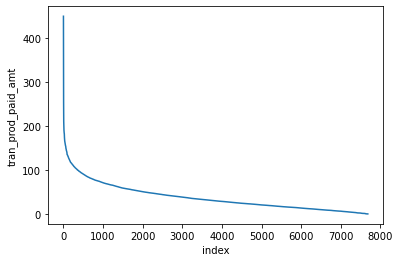

In [287]:
# long-tail effect

tmp = pd.DataFrame(toothpaste.groupby('cust_id').tran_prod_paid_amt.sum().sort_values(ascending=False)).reset_index().reset_index().iloc[:,[0,2]]

sns.lineplot(data = tmp, y = "tran_prod_paid_amt", x = "index")

In [ ]:
# Customers with the highest number of transactions

toothpaste.groupby('cust_id').new_tran_id.count().sort_values(ascending=False)

In [164]:
# Customer that were given products for free

toothpaste[toothpaste['tran_prod_paid_amt'] == 0].groupby('cust_id')['tran_prod_paid_amt'].count().sort_values(ascending=False)

cust_id
1209903     2
27809913    2
11599805    1
16209847    1
47409814    1
75109623    1
79119626    1
80609826    1
88669878    1
Name: tran_prod_paid_amt, dtype: int64

In [165]:
# Customers that bought the most number of unique products

toothpaste.groupby('cust_id')['prod_id'].nunique().sort_values(ascending=False)

cust_id
64839997    31
39939889    31
3189829     31
86369948    29
74329710    29
            ..
50729606     1
86079964     1
50029995     1
49969853     1
99999776     1
Name: prod_id, Length: 7681, dtype: int64

In [166]:
# Customers who saved the most by buying products on discount

toothpaste.groupby('cust_id')['tran_prod_discount_amt'].sum().sort_values(ascending=True)

cust_id
96339836   -128.54
31889833   -106.34
83589994   -104.73
45289949   -103.91
4099782    -101.45
             ...  
66699922      0.00
66819994      0.00
66879562      0.00
63609655      0.00
99999776      0.00
Name: tran_prod_discount_amt, Length: 7681, dtype: float64

In [167]:
# Number of stores that customer made a purchase

toothpaste.groupby('cust_id')['store_id'].nunique().sort_values(ascending=False)

cust_id
28879854    26
33639918    13
24069956    12
87889566    10
47389671    10
            ..
48549830     1
48549881     1
48579745     1
48589955     1
99999776     1
Name: store_id, Length: 7681, dtype: int64

In [168]:
# Customers that spent the most in 2016

toothpaste[toothpaste['year'] == 2016].groupby('cust_id')['tran_prod_paid_amt'].sum().sort_values(ascending=False)

cust_id
99569937    166.62
59099831    163.20
62759768    127.31
18069947    109.92
74249611    109.52
             ...  
97729823      0.84
77939826      0.84
469629        0.79
77549690      0.74
81029916      0.74
Name: tran_prod_paid_amt, Length: 7300, dtype: float64

In [169]:
# Customers that spent the most in 2017

toothpaste[toothpaste['year'] == 2017].groupby('cust_id')['tran_prod_paid_amt'].sum().sort_values(ascending=False)

cust_id
99569937    282.34
47979538    229.40
18069947    152.44
36829577    150.76
92049834    128.77
             ...  
70379921      0.76
29039901      0.72
9509898       0.72
20459636      0.25
80609826      0.00
Name: tran_prod_paid_amt, Length: 7362, dtype: float64

In [170]:
# Customers that spent the most by month by year

toothpaste.groupby(['cust_id', 'year', 'month'])['tran_prod_paid_amt'].sum().sort_values(ascending=False).nlargest(50)

cust_id   year  month
42649949  2017  3        41.90
59219810  2017  5        39.89
51719995  2017  3        37.89
75809949  2017  4        37.38
61249664  2017  3        36.31
31079582  2017  3        35.91
21469915  2017  3        35.88
84289802  2017  9        35.64
38479729  2017  3        34.86
99569937  2017  6        34.85
                4        33.83
                3        31.86
65029719  2016  1        31.84
89039775  2017  5        31.43
46619809  2017  3        30.89
77139652  2017  4        30.45
92049834  2017  5        29.90
31079582  2017  7        29.81
38389636  2017  3        29.60
89089557  2016  11       28.88
62459786  2017  5        28.74
61069852  2016  8        28.14
47979538  2017  3        28.03
1619818   2017  3        27.95
83439608  2017  3        27.92
99569937  2017  5        27.88
18069947  2017  3        27.52
47979538  2017  9        27.33
65489581  2017  3        27.12
19259971  2017  5        26.93
40019979  2017  5        26.91
53649964  2016  1

In [171]:
# Customer who spent the most on COLGATE toothpaste

toothpaste[toothpaste['brand_desc'] == 'COLGATE'].groupby('cust_id')['tran_prod_paid_amt'].sum().sort_values(ascending=False)

cust_id
99569937    411.50
74249611    201.32
51719995    189.20
26639824    184.50
21469915    170.33
             ...  
57049902      1.34
38519883      1.30
10909884      1.27
89089730      1.27
80609826      0.00
Name: tran_prod_paid_amt, Length: 6859, dtype: float64

In [172]:
# PERCENTAGE OF ACQUIRED TOOTHPASTE THAT ARE COLGATE

cust_bought_colgate_perc_total = ((toothpaste[toothpaste['brand_desc'] == 'COLGATE'].groupby('cust_id')['tran_prod_paid_amt'].sum().sort_values(ascending=False) / toothpaste.groupby('cust_id')['tran_prod_paid_amt'].sum().sort_values(ascending=False))).fillna(0)

cust_bought_colgate_perc_total

cust_id
29568       0.635013
29909       0.450683
39774       0.661101
39856       0.358944
59984       1.000000
              ...   
99969716    0.260243
99969769    0.000000
99989975    0.427403
99989987    0.226576
99999776    0.000000
Name: tran_prod_paid_amt, Length: 7681, dtype: float64

In [173]:
# TOTAL NUMBER OF CUSTOMERS THAT BOUGHT COLGATE TOOTHPASTE 70% OR MORE

cust_bought_colgate_perc_total.agg(lambda x: (x >= 0.7).sum())

2623

# Feature engineering - Store Level

In [4]:
transaction_product = pd.read_csv("C:/Users/10331/OneDrive/Desktop/transaction_product.csv")

In [5]:
# Exploring Categories

pd.DataFrame(transaction_product.category_desc_eng.value_counts().head(100)/transaction_product.category_desc_eng.count()).reset_index()

index  category_desc_eng
0                             FINE WAFERS           0.023073
1                              FRESH PORK           0.021975
2                          MINERAL WATERS           0.021936
3                      FRESH POULTRY MEAT           0.020775
4                         PAO MANUFACTURE           0.020090
5                                  BANANA           0.018967
6                    CHEESE TYPE FLAMENGO           0.018189
7                       CANNED VEGETABLES           0.016230
8                              FRESH BEEF           0.014194
9                           YOGURT HEALTH           0.014190
10                         FRESH UHT MILK           0.014034
11                                ICE TEA           0.012731
12                           FRUIT JUICES           0.012559
13                                 CITRUS           0.012376
14                           FROZEN BREAD           0.011721
15                             FINE WINES           0.011607
16                           FRENCH FRIES           0.011605
17                           REGULAR EGGS           0.011361
18                                  APPLE           0.011303
19                                CABBAGE           0.010522
20                      BREAKFAST CEREALS           0.010340
21                       INDIVIDUAL BOWLS           0.010294
22                                 CARROT           0.010263
23                                   RICE           0.010206
24           COFFEES AND ROASTED MIXTURES           0.009701
25                                 POTATO           0.009667
26                           YOGURT DRINK           0.009466
27                            CANNED TUNA           0.009393
28                                 TOMATO           0.009195
29                     YOGURT SPECIALTIES           0.009091
30                            ANIMAL FOOD           0.008656
31                       SPECIAL UHT MILK           0.008555
32                         PACKAGED BREAD           0.008518
33                           READY TO EAT           0.008287
34                               SAUSAGES           0.007893
35                     YOGURT TRADITIONAL           0.007880
36                                  ONION           0.007739
37                      FRUIT SOFT DRINKS           0.007698
38                                LETTUCE           0.007470
39                          PAPER NAPKINS           0.007427
40                  REFRIGERATED DESSERTS           0.007411
41                              OLIVE OIL           0.007228
42                      FROZEN VEGETABLES           0.007096
43                        WILD FRESH FISH           0.007074
44                         STANDARD WINES           0.007065
45             CUPCAKES AND SIMILAR PACKS           0.007003
46                      BEER WITH ALCOHOL           0.006960
47                              ICE CREAM           0.006909
48                                 BUTTER           0.006836
49                           TOILET PAPER           0.006702
50                                 SAUCES           0.006617
51                        TOMATO PRODUCTS           0.006419
52                                 DRINKS           0.006315
53                             COLA DRINK           0.006203
54                                    OIL           0.006116
55                        CANNED SAUSAGES           0.006090
56                                  SUGAR           0.006013
57                      PASTEURIZED CREAM           0.006011
58                              BREAD FMF           0.005764
59                              COLD CUTS           0.005626
60                                  PEACH           0.005594
61                          KITCHEN ROLLS           0.005427
62                    FROZEN FISH SERVICE           0.005378
63                 FRESH FISH AQUACULTURE           0.005358
64                          FOOD CHILDREN           0.005324
65        

In [6]:
# Checking categories that COLGATE involved

transaction_product.loc[transaction_product.brand_desc == "COLGATE", "category_desc_eng"].value_counts()

TOOTHPASTE                61084
TOOTHBRUSHES AND WAXES     6036
ORAL ELIXIRS               2518
Name: category_desc_eng, dtype: int64

In [7]:
# Creating a list for those three categoies that COLGATE incloved

Category_list = transaction_product.loc[transaction_product.brand_desc == "COLGATE", "category_desc_eng"].unique()

In [8]:
# Percentage of transactions volume of all brands in those three categories

tmp = transaction_product.loc[transaction_product.category_desc_eng.isin(Category_list), "category_name"].value_counts()/transaction_product.category_desc_eng.isin(Category_list).sum()
tmp

COLGATE_TOOTHPASTE                      0.346507
PRIVATE LABEL_TOOTHPASTE                0.153938
AQUAFRESH_TOOTHPASTE                    0.134345
PRIVATE LABEL_TOOTHBRUSHES AND WAXES    0.088448
SENSODYNE_TOOTHPASTE                    0.064730
PRIVATE LABEL_ORAL ELIXIRS              0.063380
COLGATE_TOOTHBRUSHES AND WAXES          0.034240
AQUAFRESH_TOOTHBRUSHES AND WAXES        0.032958
LISTERINE_ORAL ELIXIRS                  0.015997
COLGATE_ORAL ELIXIRS                    0.014284
REACH_TOOTHBRUSHES AND WAXES            0.009774
TANTUM_ORAL ELIXIRS                     0.009666
AQUAFRESH_ORAL ELIXIRS                  0.009553
ORAL B_TOOTHBRUSHES AND WAXES           0.007255
ORAL B_TOOTHPASTE                       0.006784
SENSODYNE_TOOTHBRUSHES AND WAXES        0.005389
SENSODYNE_ORAL ELIXIRS                  0.001651
ORAL B_ORAL ELIXIRS                     0.000584
PIERROT_TOOTHBRUSHES AND WAXES          0.000516
Name: category_name, dtype: float64

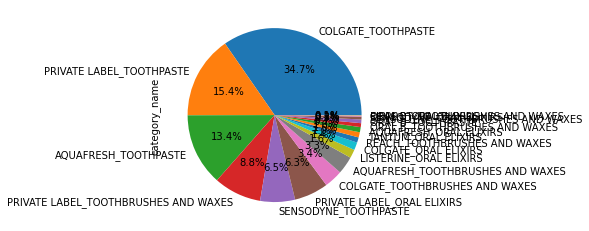

In [9]:
# Plotting transaction volume percentage

tmp.plot.pie(autopct="%.1f%%");

In [10]:
# Checking transaction volumne percentage for subcategories under TOOTHPASTE

transaction_product.loc[transaction_product.category_desc_eng == "TOOTHPASTE", "sub_category_desc"].value_counts()/(transaction_product.category_desc_eng == "TOOTHPASTE").sum()

PASTA DENTIFR TRADIC    0.675651
PASTA DENTIFR BRANQ     0.157488
PASTA SENSIB DENTARI    0.073608
PASTA DENTIFR INFANT    0.048293
PASTA DENTIFR MEDICI    0.027170
PASTA DENTIFR 2 EM 1    0.017790
Name: sub_category_desc, dtype: float64

In [11]:
# Creating a list for all Toothpaste product types

TOOTHPASTE_list = transaction_product.loc[transaction_product.category_desc_eng == "TOOTHPASTE", "sub_category_desc"].unique()

In [12]:
# Percentage of transaction volumne of all brands for toothpaste

tmp = transaction_product.loc[transaction_product.sub_category_desc.isin(TOOTHPASTE_list), "product_name"].value_counts()/transaction_product.sub_category_desc.isin(TOOTHPASTE_list).sum()
tmp

COLGATE_PASTA DENTIFR TRADIC          0.420083
PRIVATE LABEL_PASTA DENTIFR TRADIC    0.147754
AQUAFRESH_PASTA DENTIFR TRADIC        0.083631
SENSODYNE_PASTA SENSIB DENTARI        0.073608
AQUAFRESH_PASTA DENTIFR BRANQ         0.068934
COLGATE_PASTA DENTIFR BRANQ           0.055256
PRIVATE LABEL_PASTA DENTIFR BRANQ     0.033298
AQUAFRESH_PASTA DENTIFR INFANT        0.019573
PRIVATE LABEL_PASTA DENTIFR INFANT    0.019107
AQUAFRESH_PASTA DENTIFR MEDICI        0.018071
PRIVATE LABEL_PASTA DENTIFR 2 EM 1    0.017790
SENSODYNE_PASTA DENTIFR TRADIC        0.014577
COLGATE_PASTA DENTIFR INFANT          0.009614
ORAL B_PASTA DENTIFR TRADIC           0.009606
COLGATE_PASTA DENTIFR MEDICI          0.005638
SENSODYNE_PASTA DENTIFR MEDICI        0.003462
Name: product_name, dtype: float64

In [13]:
# Transaction volume percentage for all toothpaste brands

tmp = transaction_product.loc[transaction_product.sub_category_desc.isin(TOOTHPASTE_list), "brand_desc"].value_counts()/transaction_product.sub_category_desc.isin(TOOTHPASTE_list).sum()
tmp

COLGATE          0.490591
PRIVATE LABEL    0.217949
AQUAFRESH        0.190208
SENSODYNE        0.091647
ORAL B           0.009606
Name: brand_desc, dtype: float64

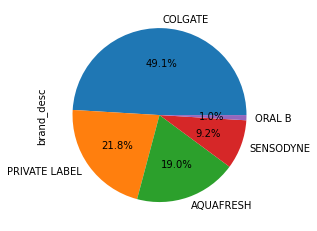

In [14]:
tmp.plot.pie(autopct="%.1f%%");

In [15]:
# AVERAGE DISCOUNT RATE 

avg_discount_rate = round((transaction_product.groupby('cust_id')['tran_prod_discount_amt'].sum().abs() / (transaction_product.groupby('cust_id')['tran_prod_sale_amt'].sum())).sort_values(ascending=False),4)

avg_discount_rate.sort_values(ascending=False)

cust_id
33259966    0.3738
77329638    0.3718
81779810    0.3494
91759561    0.3471
22179626    0.3401
             ...  
6759926     0.0418
5649867     0.0409
75069811    0.0395
15509934    0.0392
84299926    0.0342
Length: 7920, dtype: float64

In [16]:
# DISCOUNTED PRODUCTS 

discount_count = transaction_product[transaction_product['tran_prod_discount_amt'] != 0].groupby('cust_id')['tran_prod_discount_amt'].count()

discount_count.sort_values(ascending=False)

cust_id
73979986    4074
96339836    3502
13129627    3300
2629968     3157
75709600    3128
            ... 
85429551     118
66869557     117
14359520     112
96879682     111
71909645      72
Name: tran_prod_discount_amt, Length: 7920, dtype: int64

In [17]:
# DISCOUNT FREQUENCY

discount_freq = discount_count / transaction_product.groupby('cust_id')['tran_prod_discount_amt'].count()

discount_freq.sort_values(ascending=False)

cust_id
77329638    0.794456
81779810    0.699308
91759561    0.686454
17299665    0.684938
19899641    0.676471
              ...   
95569587    0.126199
49309956    0.124346
5649867     0.109824
89159772    0.107113
14359520    0.103704
Name: tran_prod_discount_amt, Length: 7920, dtype: float64

In [18]:
# MONTHLY TRANSACTIONS

monthly_tran = transaction_product.groupby('cust_id')['tran_id'].nunique().reset_index()

transaction_product["year_month"] = transaction_product["year"].astype('str') + transaction_product["month"].astype('str')

tmp = transaction_product.groupby('cust_id')['year_month'].nunique()

monthly_tran["month"] = monthly_tran["cust_id"].map(tmp)

monthly_tran["monthly_tran"] = monthly_tran["tran_id"]/monthly_tran["month"]

monthly_tran = monthly_tran.iloc[:,[0,3]]

monthly_tran = monthly_tran.set_index("cust_id").iloc[:,0]

monthly_tran

cust_id
29568       14.000000
29909       16.666667
39774       11.583333
39856       25.000000
59984       15.291667
              ...    
99969716    14.250000
99969769    11.125000
99989975    14.333333
99989987    16.666667
99999776    16.583333
Name: monthly_tran, Length: 7920, dtype: float64

In [19]:
# MONTHLY SPENDING

monthly_spend = transaction_product.groupby('cust_id')['tran_prod_paid_amt'].sum().reset_index()

tmp = transaction_product.groupby('cust_id')['year_month'].nunique()

monthly_spend["month"] = monthly_spend["cust_id"].map(tmp)

monthly_spend["monthly_tran"] = monthly_spend["tran_prod_paid_amt"]/monthly_spend["month"]

monthly_spend = monthly_spend.iloc[:,[0,3]]

monthly_spend = monthly_spend.set_index("cust_id").iloc[:,0]

monthly_spend

cust_id
29568       499.558636
29909       493.196667
39774       369.897500
39856       385.180000
59984       361.963333
               ...    
99969716    314.587917
99969769    251.855417
99989975    251.121667
99989987    355.330000
99999776    275.857500
Name: monthly_tran, Length: 7920, dtype: float64

In [20]:
# MARGIN RATIO

margin_ratio = transaction_product.groupby('cust_id')['margin'].sum().reset_index()

tmp = transaction_product.groupby('cust_id')['tran_prod_paid_amt'].sum()

margin_ratio["paid"] = margin_ratio["cust_id"].map(tmp)

margin_ratio["margin_ratio"] = margin_ratio["margin"]/margin_ratio["paid"]

margin_ratio = margin_ratio.iloc[:,[0,3]]

margin_ratio = margin_ratio.set_index("cust_id").iloc[:,0]

margin_ratio

cust_id
29568       0.284020
29909       0.170569
39774       0.184126
39856       0.207880
59984       0.183403
              ...   
99969716    0.268577
99969769    0.177552
99989975    0.197432
99989987    0.234016
99999776    0.249848
Name: margin_ratio, Length: 7920, dtype: float64

# Segementation - Store level

In [21]:
# Creating store dictionary

cust_dict = {'monthly_spend':monthly_spend,'monthly_tran':monthly_tran, 'margin_ratio': margin_ratio, 'avg_discount_rate': avg_discount_rate}

In [22]:
# Creating stores dataframe

customers = pd.DataFrame(data=cust_dict)

In [23]:
customers

monthly_spend  monthly_tran  margin_ratio  avg_discount_rate
cust_id                                                               
29568        499.558636     14.000000      0.284020             0.1160
29909        493.196667     16.666667      0.170569             0.1285
39774        369.897500     11.583333      0.184126             0.2132
39856        385.180000     25.000000      0.207880             0.1222
59984        361.963333     15.291667      0.183403             0.1504
...                 ...           ...           ...                ...
99969716     314.587917     14.250000      0.268577             0.1474
99969769     251.855417     11.125000      0.177552             0.2567
99989975     251.121667     14.333333      0.197432             0.1888
99989987     355.330000     16.666667      0.234016             0.1102
99999776     275.857500     16.583333      0.249848             0.1467

[7920 rows x 4 columns]

In [24]:
customers.isna().sum()

monthly_spend        0
monthly_tran         0
margin_ratio         0
avg_discount_rate    0
dtype: int64

In [25]:
# Summary Stats

customers.describe()

monthly_spend  monthly_tran  margin_ratio  avg_discount_rate
count    7920.000000   7920.000000   7920.000000        7920.000000
mean      339.182501     15.359521      0.220367           0.159710
std        89.298566      4.436188      0.034940           0.045762
min       160.779583      2.785714      0.050918           0.034200
25%       270.597355     12.265217      0.196671           0.127400
50%       321.723542     14.375000      0.218220           0.159000
75%       393.923250     17.708333      0.241624           0.190700
max       977.193571     41.136364      0.463282           0.373800

In [26]:
# Standardizing the data

scaler = StandardScaler()

customers_scaled = scaler.fit_transform(customers)

In [27]:
# Statistics of scaled data

pd.DataFrame(customers_scaled).describe()

0             1             2             3
count  7.920000e+03  7.920000e+03  7.920000e+03  7.920000e+03
mean  -4.927596e-16 -2.744297e-16 -3.587058e-16  3.520893e-16
std    1.000063e+00  1.000063e+00  1.000063e+00  1.000063e+00
min   -1.997951e+00 -2.834551e+00 -4.850068e+00 -2.742813e+00
25%   -7.680916e-01 -6.975582e-01 -6.782631e-01 -7.060817e-01
50%   -1.955246e-01 -2.219436e-01 -6.147579e-02 -1.551615e-02
75%    6.130468e-01  5.294998e-01  6.084125e-01  6.772347e-01
max    7.145147e+00  5.810951e+00  6.952818e+00  4.678581e+00

In [28]:
# Defining the k-means function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=1000)

# Fitting the k-means algorithm on scaled data
kmeans.fit(customers_scaled)

KMeans(max_iter=1000, n_clusters=2)

In [29]:
# Inertia on the fitted data

kmeans.inertia_

23713.457343593516

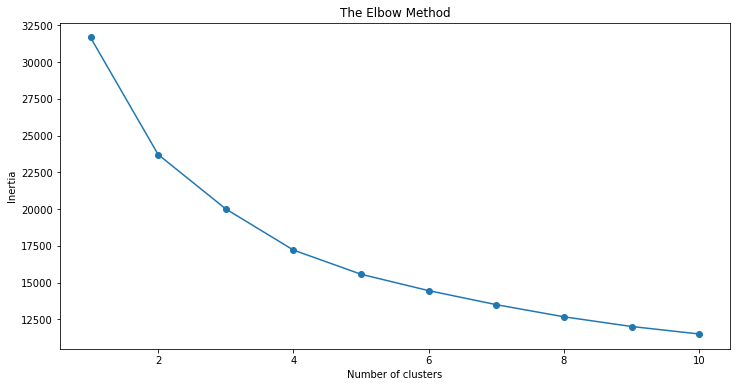

In [30]:
# Fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(customers_scaled)
    SSE.append(kmeans.inertia_)

# Converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method');

In [31]:
# k means using 4 clusters and k-means++ initialization

kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(customers_scaled)
pred = kmeans.predict(customers_scaled)

In [32]:
# Checking how many customers in each cluster

frame = pd.DataFrame(customers)
frame.columns = customers.columns.values
frame.index = customers.index.values
frame['cluster'] = pred
frame['cluster'].value_counts()

2    2950
0    2202
1    1487
3    1281
Name: cluster, dtype: int64

In [33]:
# Centroids

centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = customers.columns.values[:4]
centroids

monthly_spend  monthly_tran  margin_ratio  avg_discount_rate
0      -0.399496     -0.325452      0.734083          -0.701957
1       1.405206     -0.215672      0.083737          -0.123384
2      -0.555207     -0.390943     -0.696755           0.748021
3       0.334471      1.708389      0.240889          -0.368021

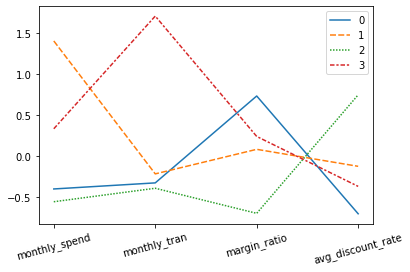

In [34]:
# Plotting results

sns.lineplot(data = centroids.T)
plt.xticks(rotation=15);

In [35]:
frame.groupby('cluster').describe().T

cluster                            0            1            2            3
monthly_spend     count  2202.000000  1487.000000  2950.000000  1281.000000
                  mean    303.596929   464.585253   289.564580   369.048550
                  std      50.800377    71.723481    52.011017    75.352788
                  min     173.655833   355.275833   160.779583   204.535000
                  25%     263.659716   417.293542   248.512083   311.460417
                  50%     299.228375   452.067083   283.090208   364.916250
                  75%     339.597917   494.123958   325.635208   417.647500
                  max     482.239583   977.193571   545.569524   658.473846
monthly_tran      count  2202.000000  1487.000000  2950.000000  1281.000000
                  mean     13.922988    14.397799    13.624484    22.940852
                  std       2.665248     2.944060     2.834826     3.446339
                  min       5.625000     4.400000     2.785714    17.583333
                  25%      12.041667    12.375000    11.666667    20.391304
                  50%      13.687500    14.125000    13.291667    22.291667
                  75%      15.860507    16.540064    15.456250    25.000000
                  max      21.666667    25.928571    24.541667    41.136364
margin_ratio      count  2202.000000  1487.000000  2950.000000  1281.000000
                  mean      0.246137     0.223242     0.196047     0.228740
                  std       0.032026     0.028991     0.024516     0.029039
                  min       0.163922     0.103581     0.050918     0.141629
                  25%       0.224854     0.202974     0.180512     0.207849
                  50%       0.241684     0.223118     0.196232     0.227299
                  75%       0.262514     0.241898     0.211789     0.247078
                  max       0.463282     0.380926     0.289843     0.340775
avg_discount_rate count  2202.000000  1487.000000  2950.000000  1281.000000
                  mean      0.127574     0.154045     0.193869     0.142862
                  std       0.032656     0.039237     0.035918     0.039694
                  min       0.039500     0.034200     0.080200     0.039200
                  25%       0.104300     0.127700     0.169500     0.114700
                  50%       0.127600     0.154700     0.191400     0.140900
                  75%       0.149600     0.181400     0.214775     0.169100
                  max       0.286500     0.312800     0.373800     0.288900

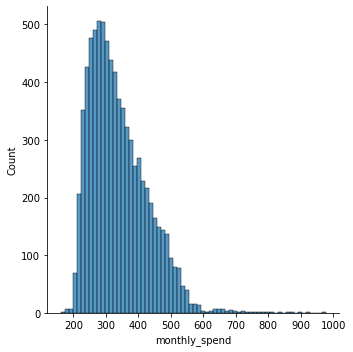

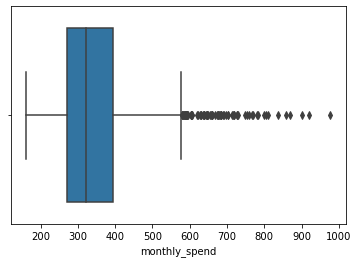

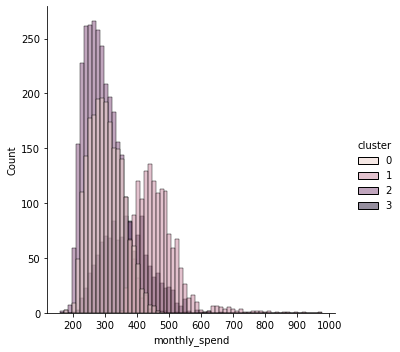

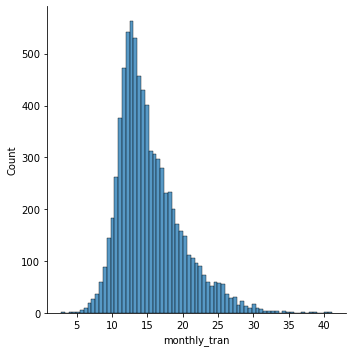

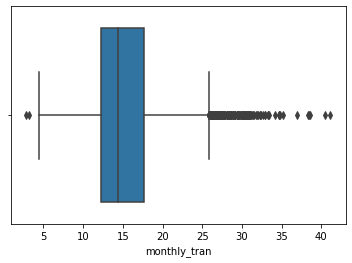

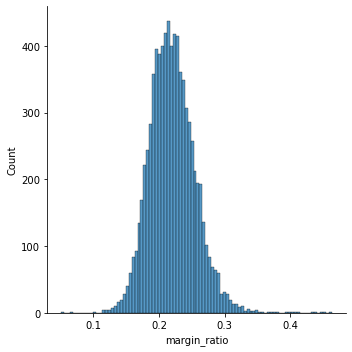

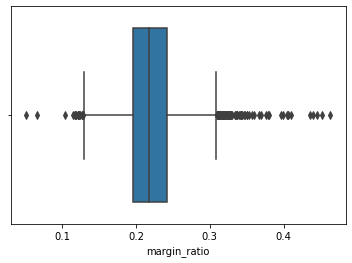

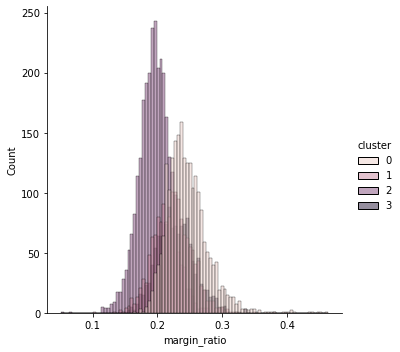

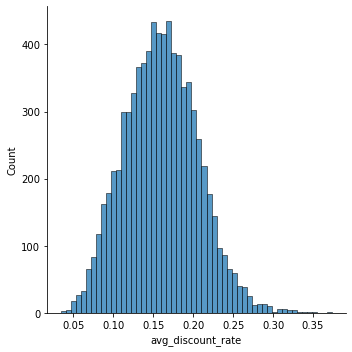

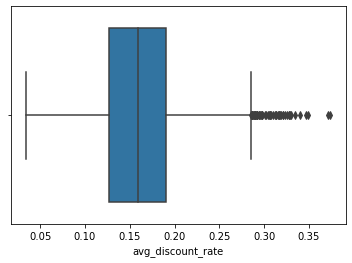

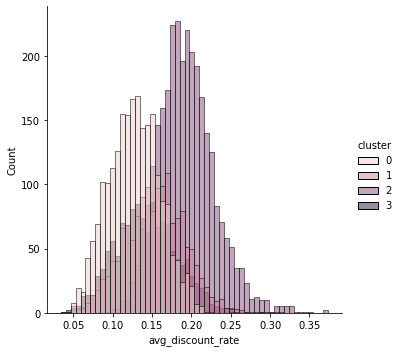

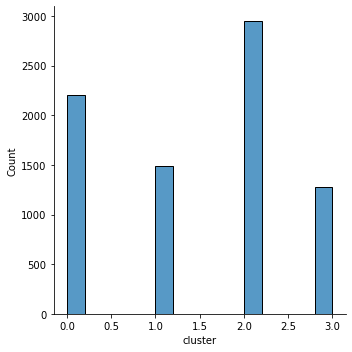

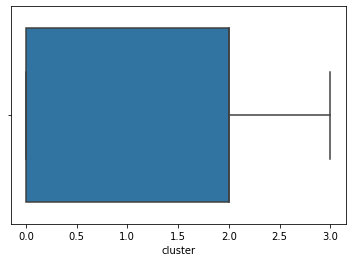

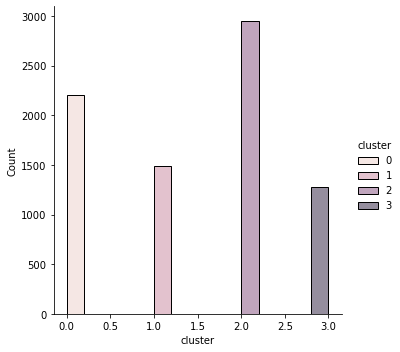

In [36]:
# Plotting 

for i in customers.columns.values:
    g = sns.displot(data = frame, x = i)
    plt.show()
    g = sns.boxplot(data = frame, x = i)
    plt.show()
    g = sns.displot(data = frame, x = i, hue = "cluster")
    plt.show()

In [37]:
tmp = frame.iloc[:,4]

transaction_product["cluster1"] = transaction_product["cust_id"].map(tmp)

transaction_product.head()

cust_id                 tran_id     tran_dt  store_id    prod_id prod_unit  \
0   139662   139662_2017-11-03_584  2017-11-03       584  145519008        CT   
1   799924   799924_2017-11-12_349  2017-11-12       349  145519008        CT   
2  1399898  1399898_2017-10-21_684  2017-10-21       684  145519008        CT   
3  1399898  1399898_2017-11-11_684  2017-11-11       684  145519008        CT   
4  1399898  1399898_2017-12-05_684  2017-12-05       684  145519008        CT   

   tran_prod_sale_amt  tran_prod_sale_qty  tran_prod_discount_amt  \
0                2.89                 4.0                    0.00   
1                2.89                 4.0                   -1.45   
2                2.89                 4.0                   -1.45   
3                2.89                 4.0                   -1.45   
4                2.89                 4.0                   -1.45   

   tran_prod_offer_cts  tran_prod_paid_amt  prod_unit_price   weekday  month  \
0                    0                2.89           0.7225    Friday     11   
1                    1                1.44           0.7225    Sunday     11   
2                    1                1.44           0.7225  Saturday     10   
3                    1                1.44           0.7225  Saturday     11   
4                    1                1.44           0.7225   Tuesday     12   

   year  subcategory_id    sub_category_desc  category_id  category_desc  \
0  2017           93970  IOGURTE BIFIDUS LIQ        95854  IOGURTE SAUDE   
1  2017           93970  IOGURTE BIFIDUS LIQ        95854  IOGURTE SAUDE   
2  2017           93970  IOGURTE BIFIDUS LIQ        95854  IOGURTE SAUDE   
3  2017           93970  IOGURTE BIFIDUS LIQ        95854  IOGURTE SAUDE   
4  2017           93970  IOGURTE BIFIDUS LIQ        95854  IOGURTE SAUDE   

  brand_desc category_desc_eng  base_unit_price  min_price  season  margin  \
0    ACTIVIA     YOGURT HEALTH           0.7225       0.36    fall    1.45   
1    ACTIVIA     YOGURT HEALTH           0.3600       0.36    fall    0.00   
2    ACTIVIA     YOGURT HEALTH           0.3600       0.36    fall    0.00   
3    ACTIVIA     YOGURT HEALTH           0.3600       0.36    fall    0.00   
4    ACTIVIA     YOGURT HEALTH           0.3600       0.36  winter    0.00   

                  product_name          category_name year_month  cluster1  
0  ACTIVIA_IOGURTE BIFIDUS LIQ  ACTIVIA_YOGURT HEALTH     201711         0  
1  ACTIVIA_IOGURTE BIFIDUS LIQ  ACTIVIA_YOGURT HEALTH     201711         0  
2  ACTIVIA_IOGURTE BIFIDUS LIQ  ACTIVIA_YOGURT HEALTH     201710         3  
3  ACTIVIA_IOGURTE BIFIDUS LIQ  ACTIVIA_YOGURT HEALTH     201711         3  
4  ACTIVIA_IOGURTE BIFIDUS LIQ  ACTIVIA_YOGURT HEALTH     201712         3

In [38]:
# Toothpaste in Cluster0

transaction_product.loc[(transaction_product.cluster1 == 0) & (transaction_product.category_desc_eng == "TOOTHPASTE"), "category_name"].value_counts(normalize = True)

COLGATE_TOOTHPASTE          0.500078
PRIVATE LABEL_TOOTHPASTE    0.223161
AQUAFRESH_TOOTHPASTE        0.163596
SENSODYNE_TOOTHPASTE        0.101544
ORAL B_TOOTHPASTE           0.011621
Name: category_name, dtype: float64

In [39]:
# Toothpaste in Cluster1

transaction_product.loc[(transaction_product.cluster1 == 1) & (transaction_product.category_desc_eng == "TOOTHPASTE"), "category_name"].value_counts(normalize = True)

COLGATE_TOOTHPASTE          0.505303
AQUAFRESH_TOOTHPASTE        0.198057
PRIVATE LABEL_TOOTHPASTE    0.190832
SENSODYNE_TOOTHPASTE        0.094811
ORAL B_TOOTHPASTE           0.010997
Name: category_name, dtype: float64

In [40]:
# Toothpaste in Cluster2

transaction_product.loc[(transaction_product.cluster1 == 2) & (transaction_product.category_desc_eng == "TOOTHPASTE"), "category_name"].value_counts(normalize = True)

COLGATE_TOOTHPASTE          0.488056
AQUAFRESH_TOOTHPASTE        0.211483
PRIVATE LABEL_TOOTHPASTE    0.205072
SENSODYNE_TOOTHPASTE        0.087855
ORAL B_TOOTHPASTE           0.007534
Name: category_name, dtype: float64

In [41]:
# Toothpaste in Cluster3

transaction_product.loc[(transaction_product.cluster1 == 3) & (transaction_product.category_desc_eng == "TOOTHPASTE"), "category_name"].value_counts(normalize = True)

COLGATE_TOOTHPASTE          0.462190
PRIVATE LABEL_TOOTHPASTE    0.271209
AQUAFRESH_TOOTHPASTE        0.177486
SENSODYNE_TOOTHPASTE        0.080227
ORAL B_TOOTHPASTE           0.008888
Name: category_name, dtype: float64

In [42]:
# Checking attribute-wise differences among the clusters

tmp = transaction_product.loc[transaction_product.category_desc_eng == "TOOTHPASTE", :].groupby("cluster1").agg({"prod_unit_price":"mean","tran_prod_discount_amt":"sum","tran_prod_sale_amt":"sum","margin":"sum","tran_prod_paid_amt":"sum"})

tmp["margin_ratio"] = tmp["margin"]/tmp["tran_prod_paid_amt"]
tmp["discount_ratio"] = tmp["tran_prod_discount_amt"]/tmp["tran_prod_sale_amt"]

tmp.iloc[:,[0,5,6]]

prod_unit_price  margin_ratio  discount_ratio
cluster1                                               
0                2.641010      0.219299       -0.209390
1                2.821405      0.197012       -0.254569
2                2.821984      0.160874       -0.298863
3                2.568456      0.191865       -0.244674

# Segmentation - Toothpaste Category level

In [43]:
# Toothpaste

toothpaste = transaction_product.loc[transaction_product.category_desc_eng == "TOOTHPASTE", :]

In [44]:
# Creating loyal customers variable

tmp = toothpaste.loc[toothpaste.brand_desc == "COLGATE", :].groupby("cust_id").agg({"brand_desc": "count"})/toothpaste.groupby("cust_id").agg({"brand_desc": "count"})

tmp.fillna(0, inplace= True)

tmp = tmp.iloc[:,0]

toothpaste["colgate_loyal"] = toothpaste["cust_id"].map(tmp)

C:\Users\10331\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [45]:
# AVERAGE DISCOUNT RATE 

avg_discount_rate = round((toothpaste.groupby('cust_id')['tran_prod_discount_amt'].sum().abs() / (toothpaste.groupby('cust_id')['tran_prod_sale_amt'].sum())).sort_values(ascending=False),4)

avg_discount_rate.sort_values(ascending=False)

cust_id
19899641    0.5778
56569752    0.5761
12739846    0.5759
85269854    0.5495
10029739    0.5494
             ...  
7539946     0.0000
7419976     0.0000
6859923     0.0000
6839963     0.0000
99999776    0.0000
Length: 7681, dtype: float64

In [46]:
# DISCOUNTED PRODUCTS 

discount_count = toothpaste[toothpaste['tran_prod_discount_amt'] != 0].groupby('cust_id')['tran_prod_discount_amt'].count()

discount_count.sort_values(ascending=False)

cust_id
96339836    55
56839870    55
29079953    55
99159943    50
16329990    50
            ..
43599932     1
43609745     1
91029748     1
43739813     1
32759748     1
Name: tran_prod_discount_amt, Length: 7166, dtype: int64

In [47]:
# DISCOUNT FREQUENCY

discount_freq = discount_count / toothpaste.groupby('cust_id')['tran_prod_discount_amt'].count()

discount_freq.fillna(0, inplace = True)

discount_freq.sort_values(ascending=False)

cust_id
76279937    1.0
86079996    1.0
65299949    1.0
90299561    1.0
40139886    1.0
           ... 
65979562    0.0
66359753    0.0
66699922    0.0
66819994    0.0
99999776    0.0
Name: tran_prod_discount_amt, Length: 7681, dtype: float64

In [48]:
# MONTHLY SPEND

monthly_spend = toothpaste.groupby('cust_id')['tran_prod_paid_amt'].sum().reset_index()

tmp = toothpaste.groupby('cust_id')['year_month'].nunique()

monthly_spend["month"] = monthly_spend["cust_id"].map(tmp)

monthly_spend["monthly_tran"] = monthly_spend["tran_prod_paid_amt"]/monthly_spend["month"]

monthly_spend = monthly_spend.iloc[:,[0,3]]

monthly_spend = monthly_spend.set_index("cust_id").iloc[:,0]

monthly_spend

cust_id
29568       3.770000
29909       3.795625
39774       3.086923
39856       1.388333
59984       4.072500
              ...   
99969716    5.182941
99969769    1.700000
99989975    2.095714
99989987    2.515714
99999776    4.790000
Name: monthly_tran, Length: 7681, dtype: float64

In [49]:
# Colgate Loyal

colgate_loyal = toothpaste.groupby('cust_id')['colgate_loyal'].mean()

colgate_loyal

cust_id
29568       0.600000
29909       0.413793
39774       0.625000
39856       0.142857
59984       1.000000
              ...   
99969716    0.166667
99969769    0.000000
99989975    0.428571
99989987    0.142857
99999776    0.000000
Name: colgate_loyal, Length: 7681, dtype: float64

In [50]:
# monthly units

monthly_units = toothpaste.groupby('cust_id')['tran_prod_sale_qty'].sum().reset_index()

tmp = toothpaste.groupby('cust_id')['year_month'].nunique()

monthly_units["month"] = monthly_units["cust_id"].map(tmp)

monthly_units["monthly_units"] = monthly_units["tran_prod_sale_qty"]/monthly_units["month"]

monthly_units = monthly_units.iloc[:,[0,3]]

monthly_units = monthly_units.set_index("cust_id").iloc[:,0]

monthly_units

cust_id
29568       1.000000
29909       1.812500
39774       1.461538
39856       1.166667
59984       2.125000
              ...   
99969716    2.294118
99969769    1.000000
99989975    1.000000
99989987    1.000000
99999776    1.000000
Name: monthly_units, Length: 7681, dtype: float64

In [51]:
# Margin Ratio

margin_ratio = toothpaste.groupby('cust_id')['margin'].sum().reset_index()

tmp = toothpaste.groupby('cust_id')['tran_prod_paid_amt'].sum()

margin_ratio["paid"] = margin_ratio["cust_id"].map(tmp)

margin_ratio["margin_ratio"] = margin_ratio["margin"]/margin_ratio["paid"]

margin_ratio = margin_ratio.iloc[:,[0,3]]

margin_ratio = margin_ratio.set_index("cust_id").iloc[:,0]

margin_ratio

cust_id
29568       0.320955
29909       0.108184
39774       0.105781
39856       0.000000
59984       0.247391
              ...   
99969716    0.300079
99969769    0.000000
99989975    0.116564
99989987    0.105054
99999776    0.325678
Name: margin_ratio, Length: 7681, dtype: float64

In [52]:
# Creating store dictionary

cust_dict = {'monthly_units':monthly_units,'monthly_spend':monthly_spend,'colgate_loyal':colgate_loyal,  'margin_ratio': margin_ratio, 'avg_discount_rate': avg_discount_rate}

In [53]:
# Creating stores dataframe

customers = pd.DataFrame(data=cust_dict)

In [54]:
customers

monthly_units  monthly_spend  colgate_loyal  margin_ratio  \
cust_id                                                               
29568          1.000000       3.770000       0.600000      0.320955   
29909          1.812500       3.795625       0.413793      0.108184   
39774          1.461538       3.086923       0.625000      0.105781   
39856          1.166667       1.388333       0.142857      0.000000   
59984          2.125000       4.072500       1.000000      0.247391   
...                 ...            ...            ...           ...   
99969716       2.294118       5.182941       0.166667      0.300079   
99969769       1.000000       1.700000       0.000000      0.000000   
99989975       1.000000       2.095714       0.428571      0.116564   
99989987       1.000000       2.515714       0.142857      0.105054   
99999776       1.000000       4.790000       0.000000      0.325678   

          avg_discount_rate  
cust_id                      
29568                0.0000  
29909                0.2652  
39774                0.3936  
39856                0.0000  
59984                0.3856  
...                     ...  
99969716             0.1694  
99969769             0.1005  
99989975             0.2889  
99989987             0.1821  
99999776             0.0000  

[7681 rows x 5 columns]

In [55]:
# Summary Stats

customers.describe()

monthly_units  monthly_spend  colgate_loyal  margin_ratio  \
count    7681.000000    7681.000000    7681.000000   7681.000000   
mean        1.607186       3.303147       0.496281      0.173262   
std         0.575588       1.514695       0.313051      0.096452   
min         1.000000       0.740000       0.000000      0.000000   
25%         1.200000       2.300000       0.250000      0.106496   
50%         1.500000       3.050000       0.500000      0.166250   
75%         1.857143       3.986957       0.750000      0.230997   
max         9.333333      18.706667       1.000000      0.744467   

       avg_discount_rate  
count        7681.000000  
mean            0.231686  
std             0.128454  
min             0.000000  
25%             0.135000  
50%             0.248100  
75%             0.328900  
max             0.577800

In [56]:
customers.isna().sum()

monthly_units        0
monthly_spend        0
colgate_loyal        0
margin_ratio         0
avg_discount_rate    0
dtype: int64

In [57]:
# Standardizing the data

scaler = StandardScaler()

customers_scaled = scaler.fit_transform(customers)

In [58]:
# Statistics of scaled data

pd.DataFrame(customers_scaled).describe()

0             1             2             3             4
count  7.681000e+03  7.681000e+03  7.681000e+03  7.681000e+03  7.681000e+03
mean  -1.204320e-16  3.008631e-16 -6.273100e-17 -3.220384e-17  9.857728e-18
std    1.000065e+00  1.000065e+00  1.000065e+00  1.000065e+00  1.000065e+00
min   -1.054966e+00 -1.692297e+00 -1.585405e+00 -1.796461e+00 -1.803769e+00
25%   -7.074722e-01 -6.623196e-01 -7.867621e-01 -6.922547e-01 -7.527404e-01
50%   -1.862320e-01 -1.671383e-01  1.188090e-02 -7.269772e-02  1.277881e-01
75%    4.342921e-01  4.514795e-01  8.105239e-01  5.986239e-01  7.568482e-01
max    1.342393e+01  1.017005e+01  1.609167e+00  5.922532e+00  2.694634e+00

In [59]:
# Defining the k-means function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=1000)

# Fitting the k-means algorithm on scaled data
kmeans.fit(customers_scaled)

KMeans(max_iter=1000, n_clusters=2)

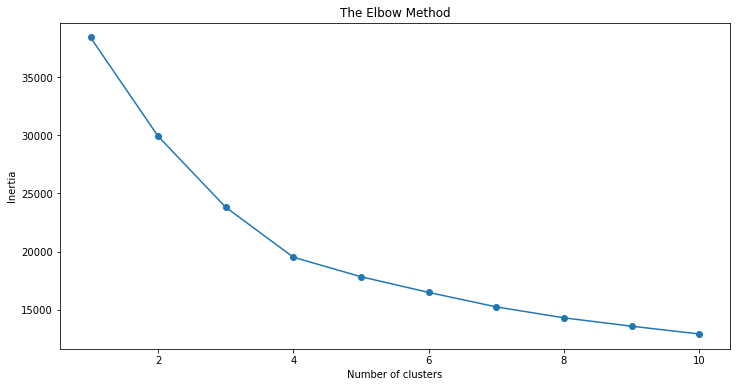

In [60]:
# Fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(customers_scaled)
    SSE.append(kmeans.inertia_)

# Converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method');

In [61]:
# k means using 4 clusters and k-means++ initialization

kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(customers_scaled)
pred = kmeans.predict(customers_scaled)

In [62]:
# Checking how many customers in each cluster

frame = pd.DataFrame(customers)
frame.columns = customers.columns.values
frame.index = customers.index.values
frame['cluster'] = pred
frame['cluster'].value_counts()

1    2841
3    1915
2    1834
0    1091
Name: cluster, dtype: int64

In [63]:
# Centroids

centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = customers.columns.values[:5]
centroids

monthly_units  monthly_spend  colgate_loyal  margin_ratio  \
0       1.708279       1.695186       0.152703      0.233712   
1      -0.255730      -0.254426       0.214999     -0.447807   
2      -0.320320      -0.021802       0.744044      1.136200   
3      -0.285040      -0.564670      -1.115959     -0.554413   

   avg_discount_rate  
0           0.183139  
1           0.837838  
2          -0.393176  
3          -0.969903

In [64]:
# Plotting

sns.lineplot(data = centroids.T)
plt.xticks(rotation=15);

In [65]:
frame.groupby('cluster').describe().T

cluster                            0            1            2            3
monthly_units     count  1091.000000  2841.000000  1834.000000  1915.000000
                  mean      2.589550     1.459678     1.422501     1.443228
                  std       0.666983     0.325043     0.321132     0.422523
                  min       1.500000     1.000000     1.000000     1.000000
                  25%       2.166667     1.200000     1.166667     1.102632
                  50%       2.421053     1.428571     1.384615     1.333333
                  75%       2.833333     1.681818     1.666667     1.650000
                  max       9.333333     2.500000     2.444444     3.400000
monthly_spend     count  1091.000000  2841.000000  1834.000000  1915.000000
                  mean      5.867717     2.916164     3.269420     2.448490
                  std       1.628466     0.779605     0.850046     1.182689
                  min       3.050000     0.992000     1.190000     0.740000
                  25%       4.832898     2.334000     2.636286     1.547083
                  50%       5.495556     2.881429     3.202841     2.150714
                  75%       6.525239     3.452500     3.834861     3.139750
                  max      18.706667     5.338000     6.271667     6.885000
colgate_loyal     count  1091.000000  2841.000000  1834.000000  1915.000000
                  mean      0.544354     0.562822     0.729424     0.146894
                  std       0.287050     0.241566     0.227667     0.167259
                  min       0.000000     0.000000     0.000000     0.000000
                  25%       0.339231     0.400000     0.571429     0.000000
                  50%       0.571429     0.555556     0.750000     0.100000
                  75%       0.765686     0.733333     0.934946     0.250000
                  max       1.000000     1.000000     1.000000     1.000000
margin_ratio      count  1091.000000  2841.000000  1834.000000  1915.000000
                  mean      0.195752     0.129946     0.282777     0.119827
                  std       0.076484     0.060519     0.077848     0.073052
                  min       0.000000     0.000000     0.052817     0.000000
                  25%       0.148056     0.087906     0.231030     0.066875
                  50%       0.192582     0.133727     0.267783     0.119585
                  75%       0.241066     0.174129     0.321281     0.169692
                  max       0.501726     0.310734     0.744467     0.396108
avg_discount_rate count  1091.000000  2841.000000  1834.000000  1915.000000
                  mean      0.255358     0.339253     0.181352     0.106825
                  std       0.108222     0.070798     0.096217     0.087838
                  min       0.000000     0.083600     0.000000     0.000000
                  25%       0.182300     0.291600     0.112975     0.015100
                  50%       0.266600     0.336600     0.190100     0.105100
                  75%       0.336700     0.384400     0.256250     0.174900
                  max       0.537000     0.577800     0.422900     0.359200

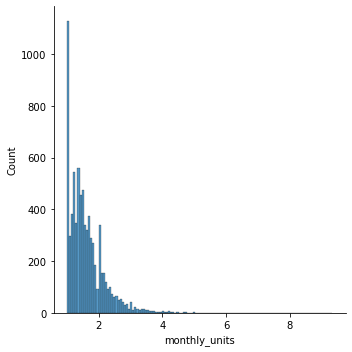

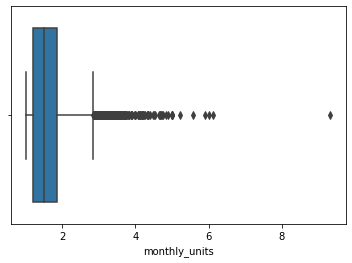

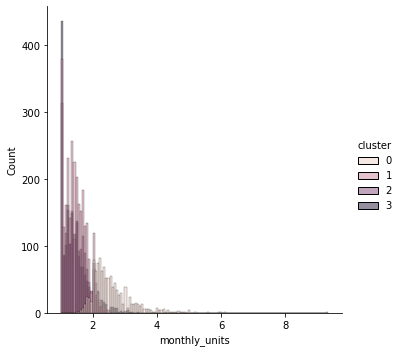

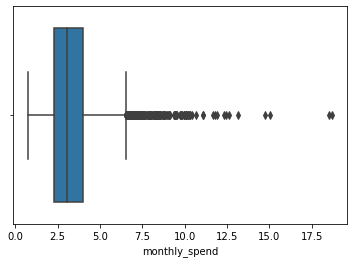

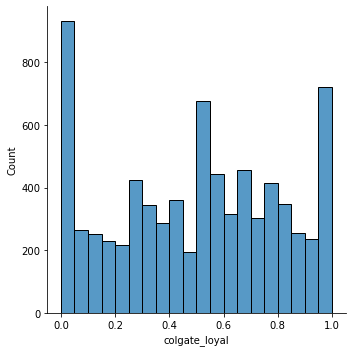

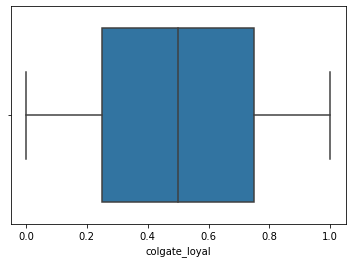

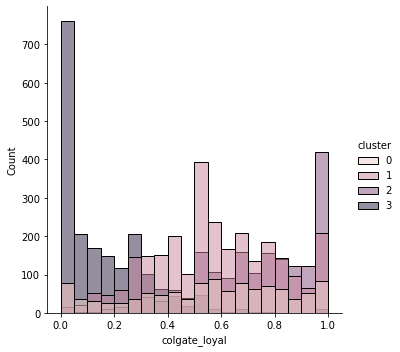

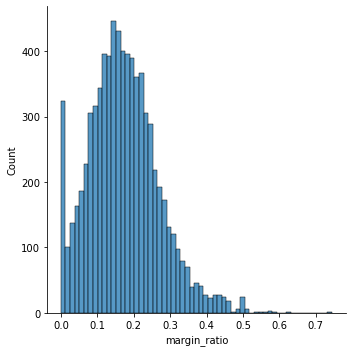

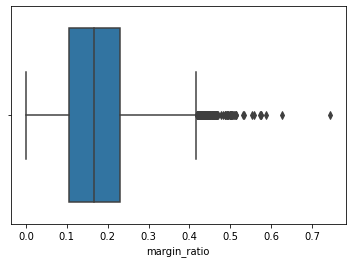

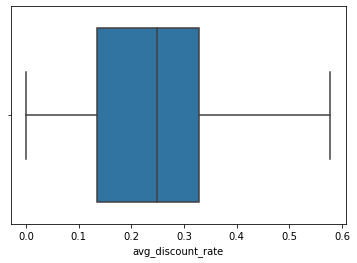

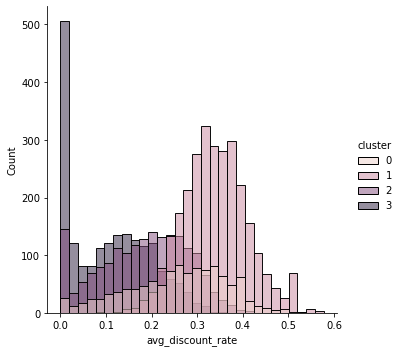

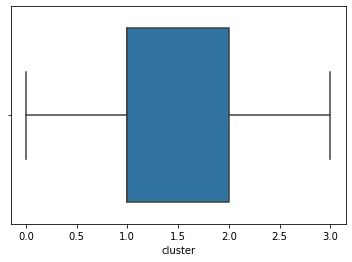

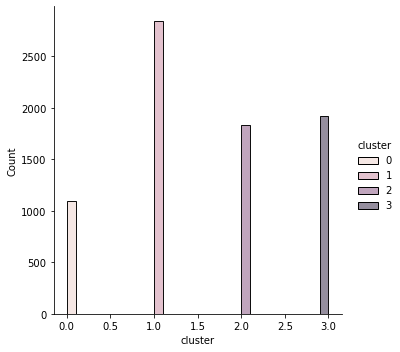

In [66]:
# Plotting

for i in customers.columns.values:
    g = sns.displot(data = frame, x = i)
    plt.show()
    g = sns.boxplot(data = frame, x = i)
    plt.show()
    g = sns.displot(data = frame, x = i, hue = "cluster")
    plt.show()

In [67]:
tmp = frame.iloc[:,5]

toothpaste["cluster2"] = toothpaste["cust_id"].map(tmp)

toothpaste.head()

C:\Users\10331\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


cust_id                tran_id     tran_dt  store_id    prod_id  \
888646    29909   29909_2017-07-31_514  2017-07-31       514  999152257   
888647    39774   39774_2017-10-22_258  2017-10-22       258  999152257   
888648   109693  109693_2017-10-24_264  2017-10-24       264  999152257   
888649   189709  189709_2017-07-31_157  2017-07-31       157  999152257   
888650   189709  189709_2017-10-23_308  2017-10-23       308  999152257   

       prod_unit  tran_prod_sale_amt  tran_prod_sale_qty  \
888646        CT                6.14                 1.0   
888647        CT                6.14                 1.0   
888648        CT                3.99                 1.0   
888649        CT                6.14                 1.0   
888650        CT                6.14                 1.0   

        tran_prod_discount_amt  tran_prod_offer_cts  tran_prod_paid_amt  \
888646                   -2.15                    1                3.99   
888647                   -2.15                    1                3.99   
888648                    0.00                    0                3.99   
888649                   -2.15                    1                3.99   
888650                   -2.15                    1                3.99   

        prod_unit_price  weekday  month  year  subcategory_id  \
888646             6.14   Monday      7  2017           93459   
888647             6.14   Sunday     10  2017           93459   
888648             3.99  Tuesday     10  2017           93459   
888649             6.14   Monday      7  2017           93459   
888650             6.14   Monday     10  2017           93459   

          sub_category_desc  category_id       category_desc brand_desc  \
888646  PASTA DENTIFR BRANQ        95742  PASTAS DENTIFRICAS    COLGATE   
888647  PASTA DENTIFR BRANQ        95742  PASTAS DENTIFRICAS    COLGATE   
888648  PASTA DENTIFR BRANQ        95742  PASTAS DENTIFRICAS    COLGATE   
888649  PASTA DENTIFR BRANQ        95742  PASTAS DENTIFRICAS    COLGATE   
888650  PASTA DENTIFR BRANQ        95742  PASTAS DENTIFRICAS    COLGATE   

       category_desc_eng  base_unit_price  min_price  season  margin  \
888646        TOOTHPASTE             3.99       3.99  summer     0.0   
888647        TOOTHPASTE             3.99       3.59    fall     0.4   
888648        TOOTHPASTE             3.99       3.99    fall     0.0   
888649        TOOTHPASTE             3.99       3.99  summer     0.0   
888650        TOOTHPASTE             3.99       3.59    fall     0.4   

                       product_name       category_name year_month  cluster1  \
888646  COLGATE_PASTA DENTIFR BRANQ  COLGATE_TOOTHPASTE      20177         1   
888647  COLGATE_PASTA DENTIFR BRANQ  COLGATE_TOOTHPASTE     201710         2   
888648  COLGATE_PASTA DENTIFR BRANQ  COLGATE_TOOTHPASTE     201710         1   
888649  COLGATE_PASTA DENTIFR BRANQ  COLGATE_TOOTHPASTE      20177         3   
888650  COLGATE_PASTA DENTIFR BRANQ  COLGATE_TOOTHPASTE     201710         3   

        colgate_loyal  cluster2  
888646       0.413793         1  
888647       0.625000         1  
888648       0.724138         1  
888649       1.000000         1  
888650       1.000000         1

In [68]:
# Toothpaste in Cluster0

toothpaste.loc[(toothpaste.cluster2 == 0) & (toothpaste.category_desc_eng == "TOOTHPASTE"), "category_name"].value_counts(normalize = True)

COLGATE_TOOTHPASTE          0.534018
AQUAFRESH_TOOTHPASTE        0.199316
SENSODYNE_TOOTHPASTE        0.138840
PRIVATE LABEL_TOOTHPASTE    0.117791
ORAL B_TOOTHPASTE           0.010036
Name: category_name, dtype: float64

In [69]:
# Toothpaste in Cluster1

toothpaste.loc[(toothpaste.cluster2 == 1) & (toothpaste.category_desc_eng == "TOOTHPASTE"), "category_name"].value_counts(normalize = True)

COLGATE_TOOTHPASTE          0.552224
AQUAFRESH_TOOTHPASTE        0.253723
PRIVATE LABEL_TOOTHPASTE    0.119440
SENSODYNE_TOOTHPASTE        0.068368
ORAL B_TOOTHPASTE           0.006245
Name: category_name, dtype: float64

In [70]:
# Toothpaste in Cluster2

toothpaste.loc[(toothpaste.cluster2 == 2) & (toothpaste.category_desc_eng == "TOOTHPASTE"), "category_name"].value_counts(normalize = True)

COLGATE_TOOTHPASTE          0.720698
AQUAFRESH_TOOTHPASTE        0.143791
PRIVATE LABEL_TOOTHPASTE    0.078938
SENSODYNE_TOOTHPASTE        0.049104
ORAL B_TOOTHPASTE           0.007468
Name: category_name, dtype: float64

In [71]:
# Toothpaste in Cluster3

toothpaste.loc[(toothpaste.cluster2 == 3) & (toothpaste.category_desc_eng == "TOOTHPASTE"), "category_name"].value_counts(normalize = True)

PRIVATE LABEL_TOOTHPASTE    0.603193
COLGATE_TOOTHPASTE          0.137023
AQUAFRESH_TOOTHPASTE        0.130724
SENSODYNE_TOOTHPASTE        0.113022
ORAL B_TOOTHPASTE           0.016037
Name: category_name, dtype: float64

# Segamentation at Colgate Level

In [72]:
colgate = toothpaste.loc[toothpaste.brand_desc == "COLGATE", :]

In [73]:
# AVERAGE DISCOUNT RATE 

avg_discount_rate = round((colgate.groupby('cust_id')['tran_prod_discount_amt'].sum().abs() / (colgate.groupby('cust_id')['tran_prod_sale_amt'].sum())).sort_values(ascending=False),4)

avg_discount_rate.sort_values(ascending=False)

cust_id
80609826    1.0000
66639826    0.6670
83209906    0.6003
2089808     0.6003
10029739    0.6003
             ...  
8899843     0.0000
8649967     0.0000
8609972     0.0000
8579931     0.0000
99989987    0.0000
Length: 6859, dtype: float64

In [74]:
# DISCOUNTED PRODUCTS 

discount_count = colgate[colgate['tran_prod_discount_amt'] != 0].groupby('cust_id')['tran_prod_discount_amt'].count()

discount_count.sort_values(ascending=False)

cust_id
45289949    46
96339836    39
50799826    38
80069689    36
86369948    35
            ..
35479552     1
42749938     1
9459930      1
75219661     1
40439944     1
Name: tran_prod_discount_amt, Length: 6366, dtype: int64

In [75]:
# DISCOUNT FREQUENCY

discount_freq = discount_count / colgate.groupby('cust_id')['tran_prod_discount_amt'].count()

discount_freq.fillna(0, inplace = True)

discount_freq.sort_values(ascending=False)

cust_id
14179914    1.0
14549834    1.0
60749938    1.0
80579843    1.0
98969769    1.0
           ... 
61859612    0.0
61959930    0.0
61999562    0.0
62049733    0.0
99989987    0.0
Name: tran_prod_discount_amt, Length: 6859, dtype: float64

In [76]:
# COLGATE LOYAL

colgate_loyal = colgate.groupby('cust_id')['colgate_loyal'].mean()

colgate_loyal

cust_id
29568       0.600000
29909       0.413793
39774       0.625000
39856       0.142857
59984       1.000000
              ...   
99939955    0.486111
99959807    0.360000
99969716    0.166667
99989975    0.428571
99989987    0.142857
Name: colgate_loyal, Length: 6859, dtype: float64

In [77]:
# MONTHLY UNITS

monthly_units = colgate.groupby('cust_id')['tran_prod_sale_qty'].sum().reset_index()

tmp = colgate.groupby('cust_id')['year_month'].nunique()

monthly_units["month"] = monthly_units["cust_id"].map(tmp)

monthly_units["monthly_units"] = monthly_units["tran_prod_sale_qty"]/monthly_units["month"]

monthly_units = monthly_units.iloc[:,[0,3]]

monthly_units = monthly_units.set_index("cust_id").iloc[:,0]

monthly_units

cust_id
29568       1.000000
29909       1.200000
39774       1.333333
39856       1.000000
59984       2.125000
              ...   
99939955    2.000000
99959807    1.428571
99969716    1.500000
99989975    1.000000
99989987    1.000000
Name: monthly_units, Length: 6859, dtype: float64

In [78]:
# MONTHLY SPEND

monthly_spend = colgate.groupby('cust_id')['tran_prod_paid_amt'].sum().reset_index()

tmp = colgate.groupby('cust_id')['year_month'].nunique()

monthly_spend["month"] = monthly_spend["cust_id"].map(tmp)

monthly_spend["monthly_tran"] = monthly_spend["tran_prod_paid_amt"]/monthly_spend["month"]

monthly_spend = monthly_spend.iloc[:,[0,3]]

monthly_spend = monthly_spend.set_index("cust_id").iloc[:,0]

monthly_spend

cust_id
29568       3.990000
29909       2.737000
39774       2.947778
39856       2.990000
59984       4.072500
              ...   
99939955    4.445000
99959807    3.042857
99969716    5.732500
99989975    2.090000
99989987    3.990000
Name: monthly_tran, Length: 6859, dtype: float64

In [79]:
# Margin Ratio

margin_ratio = colgate.groupby('cust_id')['margin'].sum().reset_index()

tmp = colgate.groupby('cust_id')['tran_prod_paid_amt'].sum()

margin_ratio["paid"] = margin_ratio["cust_id"].map(tmp)

margin_ratio["margin_ratio"] = margin_ratio["margin"]/margin_ratio["paid"]

margin_ratio = margin_ratio.iloc[:,[0,3]]

margin_ratio = margin_ratio.set_index("cust_id").iloc[:,0]

margin_ratio

cust_id
29568       0.367586
29909       0.195835
39774       0.106483
39856       0.000000
59984       0.247391
              ...   
99939955    0.212661
99959807    0.215962
99969716    0.389882
99989975    0.047847
99989987    0.000000
Name: margin_ratio, Length: 6859, dtype: float64

In [80]:
# Creating store dictionary

cust_dict = {'monthly_units':monthly_units,'colgate_loyal':colgate_loyal, "monthly_spend": monthly_spend, 'margin_ratio': margin_ratio, 'avg_discount_rate': avg_discount_rate}

In [81]:
# Creating stores dataframe

customers = pd.DataFrame(data=cust_dict)

In [82]:
# Summary Stats

customers.describe()

monthly_units  colgate_loyal  monthly_spend  margin_ratio  \
count    6859.000000    6859.000000    6859.000000   6858.000000   
mean        1.421118       0.555756       3.098600      0.209693   
std         0.493864       0.276927       1.195005      0.124941   
min         1.000000       0.013333       0.000000      0.000000   
25%         1.000000       0.333333       2.290000      0.123098   
50%         1.307692       0.555556       2.879167      0.206556   
75%         1.615385       0.775986       3.586000      0.286172   
max         8.500000       1.000000      17.290000      1.000000   

       avg_discount_rate  
count        6859.000000  
mean            0.279105  
std             0.137266  
min             0.000000  
25%             0.193900  
50%             0.294300  
75%             0.377200  
max             1.000000

In [83]:
customers.fillna(0, inplace= True)

customers.isna().sum()

monthly_units        0
colgate_loyal        0
monthly_spend        0
margin_ratio         0
avg_discount_rate    0
dtype: int64

In [84]:
# Standardizing the data

scaler = StandardScaler()

customers_scaled = scaler.fit_transform(customers)

In [85]:
# Defining the k-means function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=1000)

# Fitting the k-means algorithm on scaled data
kmeans.fit(customers_scaled)

KMeans(max_iter=1000, n_clusters=2)

In [86]:
# Fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(customers_scaled)
    SSE.append(kmeans.inertia_)

# Converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method');

In [87]:
# k means using 3 clusters and k-means++ initialization

kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(customers_scaled)
pred = kmeans.predict(customers_scaled)

In [88]:
# Checking how many customers in each cluster

frame = pd.DataFrame(customers)
frame.columns = customers.columns.values
frame.index = customers.index.values
frame['cluster'] = pred
frame['cluster'].value_counts()

0    3118
1    2534
2    1207
Name: cluster, dtype: int64

In [89]:
# Centroids

centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = customers.columns.values[:5]
centroids

monthly_units  colgate_loyal  monthly_spend  margin_ratio  \
0      -0.294290      -0.300328      -0.478395     -0.685094   
1      -0.394897       0.083099      -0.149573      0.749524   
2       1.581347       0.598278       1.542014      0.194945   

   avg_discount_rate  
0           0.652838  
1          -0.829690  
2           0.055433

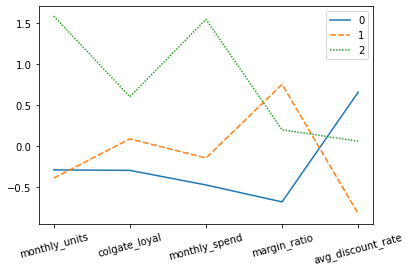

In [90]:
# Plotting

sns.lineplot(data = centroids.T)
plt.xticks(rotation=15);

In [91]:
frame.groupby('cluster').describe().T

cluster                            0            1            2
monthly_units     count  3118.000000  2534.000000  1207.000000
                  mean      1.276228     1.226495     2.204001
                  std       0.278865     0.234210     0.568754
                  min       1.000000     1.000000     1.428571
                  25%       1.000000     1.000000     1.857143
                  50%       1.250000     1.200000     2.000000
                  75%       1.500000     1.400000     2.400000
                  max       2.250000     2.000000     8.500000
colgate_loyal     count  3118.000000  2534.000000  1207.000000
                  mean      0.472869     0.578759     0.721583
                  std       0.257755     0.282754     0.223754
                  min       0.013333     0.016949     0.013889
                  25%       0.266667     0.333333     0.595949
                  50%       0.473684     0.588235     0.750000
                  75%       0.666667     0.804839     0.904762
                  max       1.000000     1.000000     1.000000
monthly_spend     count  3118.000000  2534.000000  1207.000000
                  mean      2.527963     2.920556     4.946495
                  std       0.597658     0.680356     1.378109
                  min       0.000000     1.340000     2.820000
                  25%       1.990000     2.406667     4.025000
                  50%       2.490000     2.915667     4.552273
                  75%       2.979821     3.353144     5.435330
                  max       4.316667     5.980000    17.290000
margin_ratio      count  3118.000000  2534.000000  1207.000000
                  mean      0.124093     0.303326     0.234070
                  std       0.079207     0.107806     0.101034
                  min       0.000000     0.000000     0.000000
                  25%       0.063218     0.239594     0.169525
                  50%       0.127424     0.292843     0.230547
                  75%       0.183125     0.363403     0.297057
                  max       0.505051     1.000000     0.626775
avg_discount_rate count  3118.000000  2534.000000  1207.000000
                  mean      0.368691     0.165341     0.286519
                  std       0.094589     0.106774     0.109900
                  min       0.000000     0.000000     0.000000
                  25%       0.315900     0.081050     0.226000
                  50%       0.371700     0.179400     0.302100
                  75%       0.430350     0.250900     0.361550
                  max       1.000000     0.503800     0.600300

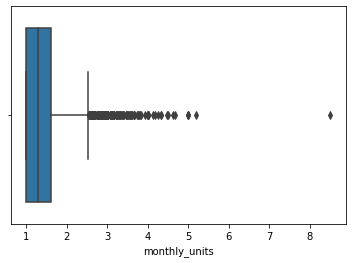

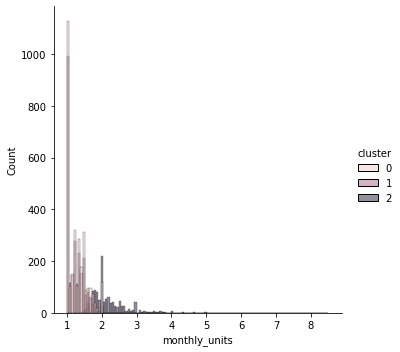

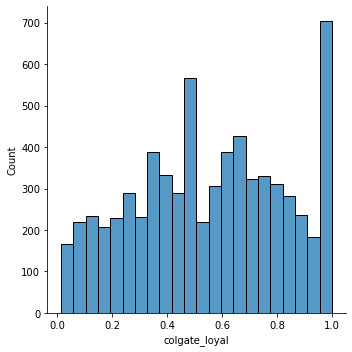

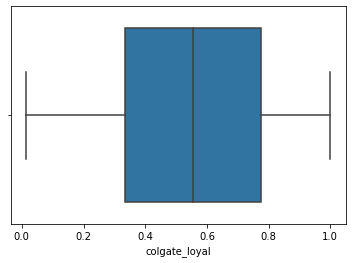

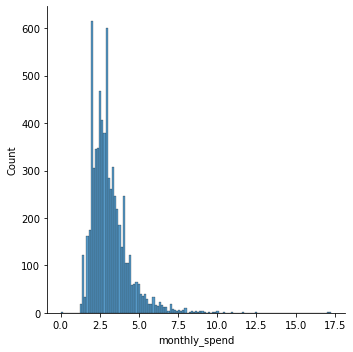

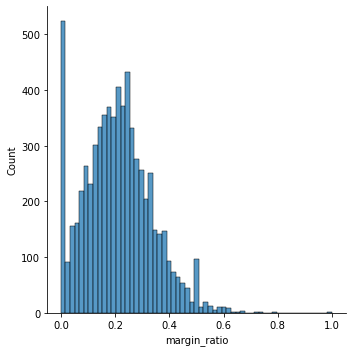

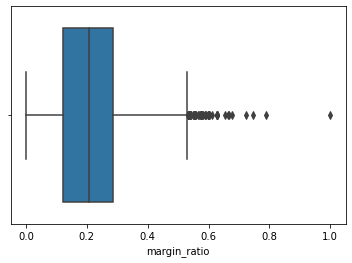

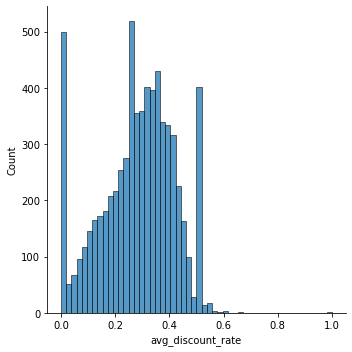

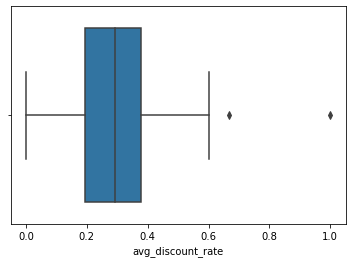

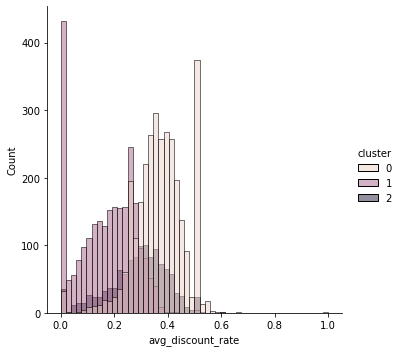

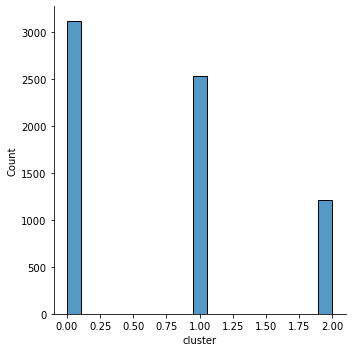

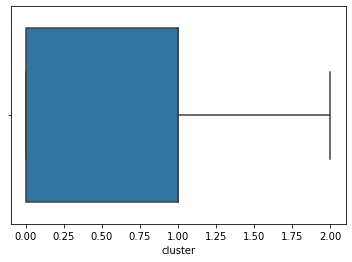

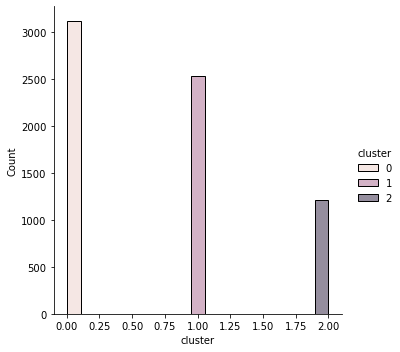

In [92]:
# Plotting

for i in customers.columns.values:
    g = sns.displot(data = frame, x = i)
    plt.show()
    g = sns.boxplot(data = frame, x = i)
    plt.show()
    g = sns.displot(data = frame, x = i, hue = "cluster")
    plt.show()

In [93]:
tmp = frame.iloc[:,5]

colgate["cluster3"] = colgate["cust_id"].map(tmp)

colgate.head()

C:\Users\10331\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


cust_id                tran_id     tran_dt  store_id    prod_id  \
888646    29909   29909_2017-07-31_514  2017-07-31       514  999152257   
888647    39774   39774_2017-10-22_258  2017-10-22       258  999152257   
888648   109693  109693_2017-10-24_264  2017-10-24       264  999152257   
888649   189709  189709_2017-07-31_157  2017-07-31       157  999152257   
888650   189709  189709_2017-10-23_308  2017-10-23       308  999152257   

       prod_unit  tran_prod_sale_amt  tran_prod_sale_qty  \
888646        CT                6.14                 1.0   
888647        CT                6.14                 1.0   
888648        CT                3.99                 1.0   
888649        CT                6.14                 1.0   
888650        CT                6.14                 1.0   

        tran_prod_discount_amt  tran_prod_offer_cts  tran_prod_paid_amt  \
888646                   -2.15                    1                3.99   
888647                   -2.15                    1                3.99   
888648                    0.00                    0                3.99   
888649                   -2.15                    1                3.99   
888650                   -2.15                    1                3.99   

        prod_unit_price  weekday  month  year  subcategory_id  \
888646             6.14   Monday      7  2017           93459   
888647             6.14   Sunday     10  2017           93459   
888648             3.99  Tuesday     10  2017           93459   
888649             6.14   Monday      7  2017           93459   
888650             6.14   Monday     10  2017           93459   

          sub_category_desc  category_id       category_desc brand_desc  \
888646  PASTA DENTIFR BRANQ        95742  PASTAS DENTIFRICAS    COLGATE   
888647  PASTA DENTIFR BRANQ        95742  PASTAS DENTIFRICAS    COLGATE   
888648  PASTA DENTIFR BRANQ        95742  PASTAS DENTIFRICAS    COLGATE   
888649  PASTA DENTIFR BRANQ        95742  PASTAS DENTIFRICAS    COLGATE   
888650  PASTA DENTIFR BRANQ        95742  PASTAS DENTIFRICAS    COLGATE   

       category_desc_eng  base_unit_price  min_price  season  margin  \
888646        TOOTHPASTE             3.99       3.99  summer     0.0   
888647        TOOTHPASTE             3.99       3.59    fall     0.4   
888648        TOOTHPASTE             3.99       3.99    fall     0.0   
888649        TOOTHPASTE             3.99       3.99  summer     0.0   
888650        TOOTHPASTE             3.99       3.59    fall     0.4   

                       product_name       category_name year_month  cluster1  \
888646  COLGATE_PASTA DENTIFR BRANQ  COLGATE_TOOTHPASTE      20177         1   
888647  COLGATE_PASTA DENTIFR BRANQ  COLGATE_TOOTHPASTE     201710         2   
888648  COLGATE_PASTA DENTIFR BRANQ  COLGATE_TOOTHPASTE     201710         1   
888649  COLGATE_PASTA DENTIFR BRANQ  COLGATE_TOOTHPASTE      20177         3   
888650  COLGATE_PASTA DENTIFR BRANQ  COLGATE_TOOTHPASTE     201710         3   

        colgate_loyal  cluster2  cluster3  
888646       0.413793         1         0  
888647       0.625000         1         0  
888648       0.724138         1         0  
888649       1.000000         1         0  
888650       1.000000         1         0

In [94]:
# Toothpaste in Cluster0

colgate.loc[(colgate.cluster3 == 0) & (colgate.brand_desc == "COLGATE"), "product_name"].value_counts(normalize = True)

COLGATE_PASTA DENTIFR TRADIC    0.854241
COLGATE_PASTA DENTIFR BRANQ     0.112258
COLGATE_PASTA DENTIFR INFANT    0.026858
COLGATE_PASTA DENTIFR MEDICI    0.006643
Name: product_name, dtype: float64

In [95]:
# Toothpaste in Cluster1

colgate.loc[(colgate.cluster3 == 1) & (colgate.brand_desc == "COLGATE"), "product_name"].value_counts(normalize = True)

COLGATE_PASTA DENTIFR TRADIC    0.865320
COLGATE_PASTA DENTIFR BRANQ     0.104911
COLGATE_PASTA DENTIFR INFANT    0.017651
COLGATE_PASTA DENTIFR MEDICI    0.012117
Name: product_name, dtype: float64

In [96]:
# Toothpaste in Cluster2

toothpaste.loc[(colgate.cluster3 == 2) & (toothpaste.brand_desc == "COLGATE"), "product_name"].value_counts(normalize = True)

COLGATE_PASTA DENTIFR TRADIC    0.849383
COLGATE_PASTA DENTIFR BRANQ     0.120722
COLGATE_PASTA DENTIFR MEDICI    0.015917
COLGATE_PASTA DENTIFR INFANT    0.013977
Name: product_name, dtype: float64

In [97]:
transaction_product.dtypes

cust_id                     int64
tran_id                    object
tran_dt                    object
store_id                    int64
prod_id                     int64
prod_unit                  object
tran_prod_sale_amt        float64
tran_prod_sale_qty        float64
tran_prod_discount_amt    float64
tran_prod_offer_cts         int64
tran_prod_paid_amt        float64
prod_unit_price           float64
weekday                    object
month                       int64
year                        int64
subcategory_id              int64
sub_category_desc          object
category_id                 int64
category_desc              object
brand_desc                 object
category_desc_eng          object
base_unit_price           float64
min_price                 float64
season                     object
margin                    float64
product_name               object
category_name              object
year_month                 object
cluster1                    int32
dtype: object

# Identifying top complementary and the most substitutional goods to target

In [98]:
# Getting all the category information

sim = transaction_product.loc[:,["tran_id","category_name","product_name","category_desc_eng","sub_category_desc"]]

In [99]:
# Finding all the transcations that contain toothpaste

tmp = sim.loc[sim.category_desc_eng == "TOOTHPASTE",["tran_id","product_name"]]

In [100]:
tmp.count()

tran_id         124511
product_name    124511
dtype: int64

In [101]:
tmp.nunique()

tran_id         115456
product_name        16
dtype: int64

In [102]:
# There are cases where customers buy multiple products together, since we already know they are substitution
# we want to filter them out to get a pure list of complementary goods

tmp = tmp.loc[numpy.logical_not(tmp["tran_id"].duplicated()),:]

In [103]:
# Mapping information back to dataframe

tmp = tmp.set_index("tran_id").iloc[:,0]

sim["toothpaste"] = sim["tran_id"].map(tmp)

sim.dropna(inplace = True)

sim

tran_id                 category_name  \
6          1749580_2017-11-24_320         ACTIVIA_YOGURT HEALTH   
27         6939855_2017-12-06_679         ACTIVIA_YOGURT HEALTH   
29         7629630_2017-10-30_506         ACTIVIA_YOGURT HEALTH   
37         8639635_2017-10-28_313         ACTIVIA_YOGURT HEALTH   
41         9559913_2017-12-03_344         ACTIVIA_YOGURT HEALTH   
...                           ...                           ...   
28762365  89339811_2016-08-11_665  NO LABEL_FROZEN POULTRY MEAT   
28762387  92749636_2017-02-18_315  NO LABEL_FROZEN POULTRY MEAT   
28762404  94999586_2017-08-25_386  NO LABEL_FROZEN POULTRY MEAT   
28762406  95779968_2017-05-26_310  NO LABEL_FROZEN POULTRY MEAT   
28762407  95899977_2016-12-01_220  NO LABEL_FROZEN POULTRY MEAT   

                         product_name    category_desc_eng  \
6         ACTIVIA_IOGURTE BIFIDUS LIQ        YOGURT HEALTH   
27        ACTIVIA_IOGURTE BIFIDUS LIQ        YOGURT HEALTH   
29        ACTIVIA_IOGURTE BIFIDUS LIQ        YOGURT HEALTH   
37        ACTIVIA_IOGURTE BIFIDUS LIQ        YOGURT HEALTH   
41        ACTIVIA_IOGURTE BIFIDUS LIQ        YOGURT HEALTH   
...                               ...                  ...   
28762365  NO LABEL_AVES CONG MIUDEZAS  FROZEN POULTRY MEAT   
28762387  NO LABEL_AVES CONG MIUDEZAS  FROZEN POULTRY MEAT   
28762404  NO LABEL_AVES CONG MIUDEZAS  FROZEN POULTRY MEAT   
28762406  NO LABEL_AVES CONG MIUDEZAS  FROZEN POULTRY MEAT   
28762407  NO LABEL_AVES CONG MIUDEZAS  FROZEN POULTRY MEAT   

            sub_category_desc                          toothpaste  
6         IOGURTE BIFIDUS LIQ      AQUAFRESH_PASTA DENTIFR TRADIC  
27        IOGURTE BIFIDUS LIQ      SENSODYNE_PASTA SENSIB DENTARI  
29        IOGURTE BIFIDUS LIQ        COLGATE_PASTA DENTIFR TRADIC  
37        IOGURTE BIFIDUS LIQ        COLGATE_PASTA DENTIFR TRADIC  
41        IOGURTE BIFIDUS LIQ      SENSODYNE_PASTA SENSIB DENTARI  
...                       ...                                 ...  
28762365   AVES CONG MIUDEZAS        COLGATE_PASTA DENTIFR TRADIC  
28762387   AVES CONG MIUDEZAS        COLGATE_PASTA DENTIFR TRADIC  
28762404   AVES CONG MIUDEZAS        COLGATE_PASTA DENTIFR TRADIC  
28762406   AVES CONG MIUDEZAS  PRIVATE LABEL_PASTA DENTIFR TRADIC  
28762407   AVES CONG MIUDEZAS      AQUAFRESH_PASTA DENTIFR INFANT  

[2275962 rows x 6 columns]

In [104]:
sim.nunique()

tran_id              115456
category_name          2134
product_name           3654
category_desc_eng       417
sub_category_desc      1415
toothpaste               16
dtype: int64

In [105]:
# Identifying top complementary goods for each Colgate products

tmp = sim.loc[:, ["toothpaste", "product_name"]]

tmp["count"] = 1

tmp = tmp.groupby(["toothpaste","product_name"]).sum().reset_index()

tmp = tmp.loc[tmp.toothpaste != tmp.product_name, :]

tmp

toothpaste                  product_name  count
0       AQUAFRESH_PASTA DENTIFR BRANQ                   1920_BRANDY      1
1       AQUAFRESH_PASTA DENTIFR BRANQ   3 CASTELOS_AZEITE 0,7 GRAUS      1
2       AQUAFRESH_PASTA DENTIFR BRANQ   3 CASTELOS_AZEITE 1,5 GRAUS     12
3       AQUAFRESH_PASTA DENTIFR BRANQ  3AMIGOS_VINHO ESPUMOSO/FRISA      9
4       AQUAFRESH_PASTA DENTIFR BRANQ                     A+_SANDES      3
...                               ...                           ...    ...
44025  SENSODYNE_PASTA SENSIB DENTARI    YOGGI_IOGURTE MAGRO LIQUID     26
44026  SENSODYNE_PASTA SENSIB DENTARI                ZAS_ACENDALHAS      7
44027  SENSODYNE_PASTA SENSIB DENTARI    ZOOLIT_ABSORV/DESOD P/GATO     11
44028  SENSODYNE_PASTA SENSIB DENTARI   ZÉFYRO_VINHO REGIAO ALENTEJ      1
44029  SENSODYNE_PASTA SENSIB DENTARI   LANDAU_VINHO REGIAO ALENTEJ      1

[44014 rows x 3 columns]

In [106]:
tmp.loc[tmp.toothpaste == "COLGATE_PASTA DENTIFR TRADIC",["product_name", "count"]].sort_values(by = "count", ascending = False).head(20)

product_name  count
20081    FRUTAS&VEGETAIS_BANANA IMPORTADA  13152
21575             PRIVATE LABEL_AGUA LISA  11653
21638     PRIVATE LABEL_BEB ICE TEA S/GAS   8373
21200          NO LABEL_PORCO STANDARD FR   7866
20091             FRUTAS&VEGETAIS_CENOURA   7017
21445         PERECÍVEIS CARNE_VITELÃO FR   6745
21052           NO LABEL_FRANGO FR PARTES   5414
21562  PRIVATE LABEL_ACUCAR BRANCO GRANUL   4873
21605   PRIVATE LABEL_ATUM POSTA CONSERVA   4537
21872  PRIVATE LABEL_GUARD PAP FOL SIMPLE   4491
21596          PRIVATE LABEL_ARROZ AGULHA   4382
21920  PRIVATE LABEL_LEITE UHT MEIO GORDO   4268
22100       PRIVATE LABEL_POLPA DE TOMATE   4080
22154   PRIVATE LABEL_ROLO COZINHA BRANCO   3947
21441  PERECÍVEIS CARNE_PORCO STANDARD FR   3905
20105             FRUTAS&VEGETAIS_LARANJA   3864
20089              FRUTAS&VEGETAIS_CEBOLA   3833
20094           FRUTAS&VEGETAIS_COURGETTE   3802
22006  PRIVATE LABEL_OUT IOGURTES ESPECIA   3793
22061   PRIVATE LABEL_PAPEL HIG FOL DUPLA   3791

In [107]:
tmp.loc[tmp.toothpaste == "COLGATE_PASTA DENTIFR BRANQ",["product_name", "count"]].sort_values(by = "count", ascending = False).head(20)

product_name  count
12621    FRUTAS&VEGETAIS_BANANA IMPORTADA   1726
13944             PRIVATE LABEL_AGUA LISA   1611
14005     PRIVATE LABEL_BEB ICE TEA S/GAS   1223
13611          NO LABEL_PORCO STANDARD FR   1154
13830         PERECÍVEIS CARNE_VITELÃO FR    939
12631             FRUTAS&VEGETAIS_CENOURA    936
13472           NO LABEL_FRANGO FR PARTES    742
13931  PRIVATE LABEL_ACUCAR BRANCO GRANUL    676
13972   PRIVATE LABEL_ATUM POSTA CONSERVA    653
14230  PRIVATE LABEL_GUARD PAP FOL SIMPLE    605
14451       PRIVATE LABEL_POLPA DE TOMATE    605
13965          PRIVATE LABEL_ARROZ AGULHA    605
14358  PRIVATE LABEL_OUT IOGURTES ESPECIA    558
14278  PRIVATE LABEL_LEITE UHT MEIO GORDO    550
14502   PRIVATE LABEL_ROLO COZINHA BRANCO    535
14087  PRIVATE LABEL_COGUMELO LAMIN CONSE    535
12629              FRUTAS&VEGETAIS_CEBOLA    520
12644             FRUTAS&VEGETAIS_LARANJA    518
13827  PERECÍVEIS CARNE_PORCO STANDARD FR    510
14412   PRIVATE LABEL_PAPEL HIG FOL DUPLA    508

In [108]:
tmp.loc[tmp.toothpaste == "COLGATE_PASTA DENTIFR INFANT",["product_name", "count"]].sort_values(by = "count", ascending = False).head(20)

product_name  count
16513             PRIVATE LABEL_AGUA LISA    290
15593    FRUTAS&VEGETAIS_BANANA IMPORTADA    283
16569     PRIVATE LABEL_BEB ICE TEA S/GAS    210
16267          NO LABEL_PORCO STANDARD FR    181
15601             FRUTAS&VEGETAIS_CENOURA    143
17042     PRIVATE LABEL_SUMO FRUTA NECTAR    132
16171           NO LABEL_FRANGO FR PARTES    130
16921        PRIVATE LABEL_PAPAS DE FRUTA    122
16427         PERECÍVEIS CARNE_VITELÃO FR    121
15351        COLGATE_PASTA DENTIFR TRADIC    120
16875  PRIVATE LABEL_OUT IOGURTES ESPECIA    120
15365            COMPAL_SUMO FRUTA NECTAR    113
16901         PRIVATE LABEL_OVO REGULAR L    101
16962       PRIVATE LABEL_POLPA DE TOMATE    101
15604           FRUTAS&VEGETAIS_COURGETTE     99
15417              DANONE_IOGURTE LIQUIDO     98
16504  PRIVATE LABEL_ACUCAR BRANCO GRANUL     97
15413              DAN UP_IOGURTE LIQUIDO     95
16813  PRIVATE LABEL_LEITE UHT MEIO GORDO     95
16960        PRIVATE LABEL_PIZZAS QUICHES     88

In [109]:
tmp.loc[tmp.toothpaste == "COLGATE_PASTA DENTIFR MEDICI",["product_name", "count"]].sort_values(by = "count", ascending = False).head(20)

product_name  count
17804    FRUTAS&VEGETAIS_BANANA IMPORTADA    149
18503             PRIVATE LABEL_AGUA LISA    123
17811             FRUTAS&VEGETAIS_CENOURA     80
18319          NO LABEL_PORCO STANDARD FR     75
18552     PRIVATE LABEL_BEB ICE TEA S/GAS     63
17632            COMPAL_SUMO FRUTA NECTAR     63
18492  PRIVATE LABEL_ACUCAR BRANCO GRANUL     59
18373          OIKOS_OUT IOGURTES ESPECIA     59
18519          PRIVATE LABEL_ARROZ AGULHA     58
17822             FRUTAS&VEGETAIS_LARANJA     58
18444         PERECÍVEIS CARNE_VITELÃO FR     57
18242           NO LABEL_FRANGO FR PARTES     52
17826       FRUTAS&VEGETAIS_MACA VERMELHA     50
18525   PRIVATE LABEL_ATUM POSTA CONSERVA     48
17814           FRUTAS&VEGETAIS_COURGETTE     47
18217                    NO LABEL_CARCACA     46
18757  PRIVATE LABEL_LEITE UHT MEIO GORDO     45
18845   PRIVATE LABEL_PAPEL HIG FOL DUPLA     41
18348                NO LABEL_TOMATE RAMA     40
18806  PRIVATE LABEL_OUT IOGURTES ESPECIA     40

In [110]:
# Transforming it into wide format

tmp = tmp.pivot(index='toothpaste', columns='product_name', values='count')

tmp.fillna(0, inplace = True)

tmp.head(5)

product_name                    1920_BRANDY  3 CASTELOS_AZEITE 0,7 GRAUS  \
toothpaste                                                                 
AQUAFRESH_PASTA DENTIFR BRANQ           1.0                          1.0   
AQUAFRESH_PASTA DENTIFR INFANT          0.0                          0.0   
AQUAFRESH_PASTA DENTIFR MEDICI          0.0                          0.0   
AQUAFRESH_PASTA DENTIFR TRADIC          2.0                          3.0   
COLGATE_PASTA DENTIFR BRANQ             0.0                          2.0   

product_name                    3 CASTELOS_AZEITE 1 GRAU  \
toothpaste                                                 
AQUAFRESH_PASTA DENTIFR BRANQ                        0.0   
AQUAFRESH_PASTA DENTIFR INFANT                       1.0   
AQUAFRESH_PASTA DENTIFR MEDICI                       0.0   
AQUAFRESH_PASTA DENTIFR TRADIC                       8.0   
COLGATE_PASTA DENTIFR BRANQ                          5.0   

product_name                    3 CASTELOS_AZEITE 1,5 GRAUS  \
toothpaste                                                    
AQUAFRESH_PASTA DENTIFR BRANQ                          12.0   
AQUAFRESH_PASTA DENTIFR INFANT                          1.0   
AQUAFRESH_PASTA DENTIFR MEDICI                          3.0   
AQUAFRESH_PASTA DENTIFR TRADIC                          5.0   
COLGATE_PASTA DENTIFR BRANQ                             5.0   

product_name                    3AMIGOS_VINHO ESPUMOSO/FRISA  A+_SANDES  \
toothpaste                                                                
AQUAFRESH_PASTA DENTIFR BRANQ                            9.0        3.0   
AQUAFRESH_PASTA DENTIFR INFANT                           1.0        0.0   
AQUAFRESH_PASTA DENTIFR MEDICI                           8.0        0.0   
AQUAFRESH_PASTA DENTIFR TRADIC                          35.0        1.0   
COLGATE_PASTA DENTIFR BRANQ                             14.0        0.0   

product_name                    ACH BRITO_SABONETE SOLIDO NORM  \
toothpaste                                                       
AQUAFRESH_PASTA DENTIFR BRANQ                             19.0   
AQUAFRESH_PASTA DENTIFR INFANT                             3.0   
AQUAFRESH_PASTA DENTIFR MEDICI                             5.0   
AQUAFRESH_PASTA DENTIFR TRADIC                            23.0   
COLGATE_PASTA DENTIFR BRANQ                               18.0   

product_name                    ACQUAMER_SOROS, AGUAS E ASPIR  \
toothpaste                                                      
AQUAFRESH_PASTA DENTIFR BRANQ                             0.0   
AQUAFRESH_PASTA DENTIFR INFANT                            1.0   
AQUAFRESH_PASTA DENTIFR MEDICI                            1.0   
AQUAFRESH_PASTA DENTIFR TRADIC                            2.0   
COLGATE_PASTA DENTIFR BRANQ                               2.0   

product_name                    ACTIMEL_IOG DEFESAS ACTIVAS  \
toothpaste                                                    
AQUAFRESH_PASTA DENTIFR BRANQ                         166.0   
AQUAFRESH_PASTA DENTIFR INFANT                         29.0   
AQUAFRESH_PASTA DENTIFR MEDICI                         40.0   
AQUAFRESH_PASTA DENTIFR TRADIC                        219.0   
COLGATE_PASTA DENTIFR BRANQ                           110.0   

product_name                    ACTIVIA_IOG S/LACTOSE SÓLID  \
toothpaste                                                    
AQUAFRESH_PASTA DENTIFR BRANQ                           4.0   
AQUAFRESH_PASTA DENTIFR INFANT                          3.0   
AQUAFRESH_PASTA DENTIFR MEDICI                          4.0   
AQUAFRESH_PASTA DENTIFR TRADIC                         21.0   
COLGATE_PASTA DENTIFR BRANQ                             6.0   

product_name                    ACTIVIA_IOGURTE BIFIDUS LIQ  \
toothpaste                                                    
AQUAFRESH_PASTA DENTIFR BRANQ                         237.0   
AQUAFRESH_PASTA DENTIFR INFANT                         44.0   
AQUAFRESH_PASTA DENTIFR

In [111]:
# Finding the most substituable items

from sklearn.metrics.pairwise import cosine_similarity

tmp = pd.DataFrame(cosine_similarity(tmp),index = tmp.index, columns = tmp.index).reset_index()

tmp = pd.melt(tmp, id_vars = ['toothpaste'], value_vars= tmp.columns[1:], var_name='toothpaste2', value_name='sim')

tmp = tmp.loc[tmp["toothpaste"] != tmp["toothpaste2"],:]

tmp

toothpaste                     toothpaste2  \
1        AQUAFRESH_PASTA DENTIFR INFANT   AQUAFRESH_PASTA DENTIFR BRANQ   
2        AQUAFRESH_PASTA DENTIFR MEDICI   AQUAFRESH_PASTA DENTIFR BRANQ   
3        AQUAFRESH_PASTA DENTIFR TRADIC   AQUAFRESH_PASTA DENTIFR BRANQ   
4           COLGATE_PASTA DENTIFR BRANQ   AQUAFRESH_PASTA DENTIFR BRANQ   
5          COLGATE_PASTA DENTIFR INFANT   AQUAFRESH_PASTA DENTIFR BRANQ   
..                                  ...                             ...   
250   PRIVATE LABEL_PASTA DENTIFR BRANQ  SENSODYNE_PASTA SENSIB DENTARI   
251  PRIVATE LABEL_PASTA DENTIFR INFANT  SENSODYNE_PASTA SENSIB DENTARI   
252  PRIVATE LABEL_PASTA DENTIFR TRADIC  SENSODYNE_PASTA SENSIB DENTARI   
253      SENSODYNE_PASTA DENTIFR MEDICI  SENSODYNE_PASTA SENSIB DENTARI   
254      SENSODYNE_PASTA DENTIFR TRADIC  SENSODYNE_PASTA SENSIB DENTARI   

          sim  
1    0.960268  
2    0.978226  
3    0.987978  
4    0.985455  
5    0.945434  
..        ...  
250  0.892592  
251  0.887954  
252  0.919990  
253  0.937037  
254  0.975697  

[240 rows x 3 columns]

In [112]:
# COLGATE_PASTA DENTIFR TRADIC

tmp.loc[tmp.toothpaste == "COLGATE_PASTA DENTIFR TRADIC",["toothpaste2", "sim"]].sort_values(by = "sim", ascending = False).head(10)

toothpaste2       sim
55       AQUAFRESH_PASTA DENTIFR TRADIC  0.993584
71          COLGATE_PASTA DENTIFR BRANQ  0.991818
7         AQUAFRESH_PASTA DENTIFR BRANQ  0.990710
39       AQUAFRESH_PASTA DENTIFR MEDICI  0.982848
247      SENSODYNE_PASTA SENSIB DENTARI  0.979631
151  PRIVATE LABEL_PASTA DENTIFR 2 EM 1  0.977277
231      SENSODYNE_PASTA DENTIFR TRADIC  0.969775
199  PRIVATE LABEL_PASTA DENTIFR TRADIC  0.968332
23       AQUAFRESH_PASTA DENTIFR INFANT  0.964449
135         ORAL B_PASTA DENTIFR TRADIC  0.962707

In [113]:
# COLGATE_PASTA DENTIFR BRANQ

tmp.loc[tmp.toothpaste == "COLGATE_PASTA DENTIFR BRANQ",["toothpaste2", "sim"]].sort_values(by = "sim", ascending = False).head(10)

toothpaste2       sim
116        COLGATE_PASTA DENTIFR TRADIC  0.991818
52       AQUAFRESH_PASTA DENTIFR TRADIC  0.989431
4         AQUAFRESH_PASTA DENTIFR BRANQ  0.985455
36       AQUAFRESH_PASTA DENTIFR MEDICI  0.982836
148  PRIVATE LABEL_PASTA DENTIFR 2 EM 1  0.971184
244      SENSODYNE_PASTA SENSIB DENTARI  0.971067
228      SENSODYNE_PASTA DENTIFR TRADIC  0.966670
196  PRIVATE LABEL_PASTA DENTIFR TRADIC  0.963386
20       AQUAFRESH_PASTA DENTIFR INFANT  0.958302
132         ORAL B_PASTA DENTIFR TRADIC  0.957160

In [114]:
# COLGATE_PASTA DENTIFR INFANT

tmp.loc[tmp.toothpaste == "COLGATE_PASTA DENTIFR INFANT",["toothpaste2", "sim"]].sort_values(by = "sim", ascending = False).head(10)

toothpaste2       sim
21       AQUAFRESH_PASTA DENTIFR INFANT  0.960086
69          COLGATE_PASTA DENTIFR BRANQ  0.953144
117        COLGATE_PASTA DENTIFR TRADIC  0.947100
5         AQUAFRESH_PASTA DENTIFR BRANQ  0.945434
181  PRIVATE LABEL_PASTA DENTIFR INFANT  0.944204
53       AQUAFRESH_PASTA DENTIFR TRADIC  0.944136
37       AQUAFRESH_PASTA DENTIFR MEDICI  0.938542
149  PRIVATE LABEL_PASTA DENTIFR 2 EM 1  0.934045
229      SENSODYNE_PASTA DENTIFR TRADIC  0.924138
245      SENSODYNE_PASTA SENSIB DENTARI  0.923721

In [115]:
# COLGATE_PASTA DENTIFR MEDICI

tmp.loc[tmp.toothpaste == "COLGATE_PASTA DENTIFR MEDICI",["toothpaste2", "sim"]].sort_values(by = "sim", ascending = False).head(10)

toothpaste2       sim
246      SENSODYNE_PASTA SENSIB DENTARI  0.953598
118        COLGATE_PASTA DENTIFR TRADIC  0.951991
70          COLGATE_PASTA DENTIFR BRANQ  0.944211
6         AQUAFRESH_PASTA DENTIFR BRANQ  0.943293
54       AQUAFRESH_PASTA DENTIFR TRADIC  0.940237
230      SENSODYNE_PASTA DENTIFR TRADIC  0.939900
38       AQUAFRESH_PASTA DENTIFR MEDICI  0.935468
134         ORAL B_PASTA DENTIFR TRADIC  0.932441
150  PRIVATE LABEL_PASTA DENTIFR 2 EM 1  0.920504
22       AQUAFRESH_PASTA DENTIFR INFANT  0.919238

# # Finding the most similar customer to target

In [213]:
# filtering by colgate loyalty by 95% quantile

print(toothpaste["colgate_loyal"].quantile(q=0.95))

tmp = toothpaste.loc[toothpaste["colgate_loyal"] >= toothpaste["colgate_loyal"].quantile(q=0.95), ["cust_id","tran_prod_sale_qty"]]

0.9696969696969697


In [214]:
# Calculating the number of transactions and number of toothpaste purchased in total

tmp["tran"] = 1

tmp = tmp.groupby(["cust_id"]).sum().reset_index()

tmp.nunique()

cust_id               669
tran_prod_sale_qty     57
tran                   47
dtype: int64

In [215]:
tmp.quantile(q = 0.95)

cust_id               94867648.0
tran_prod_sale_qty          39.0
tran                        30.0
Name: 0.95, dtype: float64

In [216]:
# Filtering the number of transacations and number of toothpaste purchased in total by its 95% quantile

tmp = tmp.loc[(tmp["tran"] >= 30 ) & (tmp["tran_prod_sale_qty"] >= 39), :]

In [217]:
# Getting the list of baseline customers

baseline = tmp.cust_id.values

tmp.nunique()

cust_id               29
tran_prod_sale_qty    16
tran                  18
dtype: int64

In [218]:
# Getting all customer purchase information neeeded

tmp = transaction_product.loc[:,["cust_id","product_name","tran_prod_sale_qty"]]

tmp = tmp.groupby(["cust_id","product_name"]).sum().reset_index()

In [219]:
# Checking for duplicates

tmp.loc[:,["cust_id","product_name"]].duplicated().any()

False

In [220]:
# Transforming into wide format

tmp = tmp.pivot(index='cust_id', columns='product_name', values='tran_prod_sale_qty')

tmp.fillna(0, inplace = True)

tmp.head(5)

product_name  1920_BRANDY  3 CASTELOS_AZEITE 0,7 GRAUS  \
cust_id                                                  
29568                 0.0                          0.0   
29909                 2.0                          0.0   
39774                 0.0                          0.0   
39856                 0.0                          0.0   
59984                 0.0                          0.0   

product_name  3 CASTELOS_AZEITE 1 GRAU  3 CASTELOS_AZEITE 1,5 GRAUS  \
cust_id                                                               
29568                              0.0                          0.0   
29909                              0.0                          1.0   
39774                              0.0                          0.0   
39856                              0.0                          0.0   
59984                              0.0                          0.0   

product_name  3AMIGOS_VINHO ESPUMOSO/FRISA  A+_SANDES  \
cust_id                                                 
29568                                  0.0        0.0   
29909                                  0.0        0.0   
39774                                  0.0        0.0   
39856                                  0.0        0.0   
59984                                  0.0        0.0   

product_name  ACH BRITO_SABONETE SOLIDO NORM  ACQUAMER_SOROS, AGUAS E ASPIR  \
cust_id                                                                       
29568                                    0.0                            0.0   
29909                                    0.0                            0.0   
39774                                    0.0                            0.0   
39856                                    0.0                            0.0   
59984                                    0.0                            0.0   

product_name  ACTIMEL_IOG DEFESAS ACTIVAS  ACTIVIA_IOG S/LACTOSE SÓLID  \
cust_id                                                                  
29568                                 0.0                          0.0   
29909                                 2.0                          0.0   
39774                                 0.0                          3.0   
39856                                 0.0                          0.0   
59984                                 0.0                          0.0   

product_name  ACTIVIA_IOGURTE BIFIDUS LIQ  ACTIVIA_IOGURTE BIFIDUS MAGR  \
cust_id                                                                   
29568                                 4.0                           0.0   
29909                                44.0                          14.0   
39774                                28.0                          42.0   
39856                                 4.0                           0.0   
59984                               208.0                           4.0   

product_name  ACTIVIA_IOGURTE BIFIDUS NAT  ACTIVIA_IOGURTE BIFIDUS PED  \
cust_id                                                                  
29568                                 0.0                          4.0   
29909                                 0.0                         16.0   
39774                                 0.0                         68.0   
39856                                 0.0                          0.0   
59984                                 0.0                          0.0   

product_name  ADAGIO_IOGURTE LIQUIDO  ADAGIO_IOGURTE MAGRO LIQUID  \
cust_id                                                             
29568                            4.0                         16.0   
29909                            0.0                          0.0   
39774                            0.0                         16.0   
39856                            4.0                          0.0   
59984                            0.0                          0.0   

product_name  ADAGIO_OUT IOGURTES ESPECIA  ADEGA ALMEIRIM_VINHO REGIÃO TEJO  \
cust_id       

In [221]:
# Finding the most substituable items

tmp = pd.DataFrame(cosine_similarity(tmp),index = tmp.index, columns = tmp.index).reset_index()

tmp = pd.melt(tmp, id_vars = ['cust_id'], value_vars= tmp.columns[1:], var_name='cust_id2', value_name='sim')

tmp = tmp.loc[tmp["cust_id"] != tmp["cust_id2"],:]

tmp

cust_id  cust_id2       sim
1            29909     29568  0.593967
2            39774     29568  0.124004
3            39856     29568  0.526899
4            59984     29568  0.159170
5           109693     29568  0.346240
...            ...       ...       ...
62726394  99959807  99999776  0.235611
62726395  99969716  99999776  0.030061
62726396  99969769  99999776  0.028946
62726397  99989975  99999776  0.119368
62726398  99989987  99999776  0.117777

[62718480 rows x 3 columns]

In [222]:
# Finding customers that are similar to baseline customers

tmp = tmp.loc[tmp.cust_id.isin(baseline),:]

tmp = tmp.loc[numpy.logical_not(tmp.cust_id2.isin(baseline)),:]

tmp

cust_id  cust_id2       sim
31          499639     29568  0.278891
473        5839958     29568  0.193587
1395      17599817     29568  0.291283
1544      19379606     29568  0.414046
1586      19919796     29568  0.278477
...            ...       ...       ...
62725995  94789789  99999776  0.057975
62726102  96259757  99999776  0.093412
62726120  96509803  99999776  0.236735
62726299  98919793  99999776  0.043585
62726326  99189821  99999776  0.311577

[228839 rows x 3 columns]

In [223]:
# Average the scores to get a final list of similarty score

sim = tmp.groupby("cust_id2").agg({"sim":"mean"}).sort_values(by="sim",ascending = False).reset_index()

sim.columns = ["cust_id","sim"]

sim

cust_id       sim
0     30209822  0.350103
1     13889806  0.343000
2      8409701  0.337199
3     39389624  0.336871
4     39289826  0.333540
...        ...       ...
7886   9509843  0.012541
7887  22189705  0.011053
7888   5179927  0.010297
7889  75529965  0.008994
7890  11769780  0.006805

[7891 rows x 2 columns]

In [224]:
# Mapping colgate loyal to the dataframe

tmp = toothpaste.loc[:,["cust_id","colgate_loyal"]].groupby("cust_id").mean().iloc[:,0]

sim["colgate_loyal"] = sim["cust_id"].map(tmp)

sim

cust_id       sim  colgate_loyal
0     30209822  0.350103       0.636364
1     13889806  0.343000       0.826087
2      8409701  0.337199       0.555556
3     39389624  0.336871       0.333333
4     39289826  0.333540       0.666667
...        ...       ...            ...
7886   9509843  0.012541       0.000000
7887  22189705  0.011053       1.000000
7888   5179927  0.010297       0.333333
7889  75529965  0.008994       0.285714
7890  11769780  0.006805       0.500000

[7891 rows x 3 columns]

In [225]:
# Mapping clusters to the dataframe

tmp = toothpaste.loc[:,["cust_id","cluster2"]].groupby("cust_id").mean().iloc[:,0]

sim["cluster"] = sim["cust_id"].map(tmp)

sim

cust_id       sim  colgate_loyal  cluster
0     30209822  0.350103       0.636364      2.0
1     13889806  0.343000       0.826087      2.0
2      8409701  0.337199       0.555556      1.0
3     39389624  0.336871       0.333333      2.0
4     39289826  0.333540       0.666667      1.0
...        ...       ...            ...      ...
7886   9509843  0.012541       0.000000      1.0
7887  22189705  0.011053       1.000000      2.0
7888   5179927  0.010297       0.333333      1.0
7889  75529965  0.008994       0.285714      1.0
7890  11769780  0.006805       0.500000      1.0

[7891 rows x 4 columns]

In [226]:
# Using stats of overall colgate loyal as benchmark

toothpaste.colgate_loyal.describe()

count    124511.000000
mean          0.490591
std           0.299893
min           0.000000
25%           0.250000
50%           0.500000
75%           0.733333
max           1.000000
Name: colgate_loyal, dtype: float64

In [227]:
# Filtering out cluster 2 since they are private label loyal and buy private brand most of time

sim = sim.loc[sim.cluster != 2,:]

sim.count()

cust_id          6065
sim              6065
colgate_loyal    5826
cluster          5826
dtype: int64

In [228]:
# Filtering out cluster 3 since they are colgate-loyal already and insensitive to promotions

sim = sim.loc[sim.cluster != 3,:]

sim.count()

cust_id          4150
sim              4150
colgate_loyal    3911
cluster          3911
dtype: int64

In [229]:
# drop empty values before evalue cutoff point - since they dont buy toothpaste at the stores

tmp = sim.dropna()

tmp.count()

cust_id          3911
sim              3911
colgate_loyal    3911
cluster          3911
dtype: int64

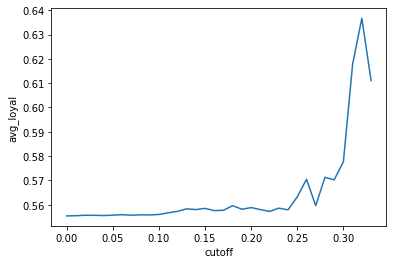

In [230]:
# Using a loop to find out proper cutoff point

list_n = list(range(34))
list_n[:] = [x / 100 for x in list_n]

list_l = []

for i in list_n:
    num = tmp.loc[tmp.sim >= i, "colgate_loyal"].mean()
    list_l.append(num)

cutoff = pd.DataFrame([list_n,list_l], index = ["cutoff", "avg_loyal"]).T

sns.lineplot(data=cutoff, x="cutoff", y="avg_loyal");

In [231]:
tmp.loc[((tmp.sim >= 0.26) & (tmp.sim <= 0.27)) | (tmp.sim >= 0.28), "colgate_loyal"].mean()

0.5810111568935258

In [232]:
tmp.loc[tmp.sim >= 0.26, "colgate_loyal"].mean()

0.5704484704191163

In [233]:
sim.loc[sim.sim >= 0.26,:].count()

cust_id          623
sim              623
colgate_loyal    613
cluster          613
dtype: int64

In [234]:
# Getting the target list with selected cutoff point

target = sim.loc[sim.sim >= 0.26,"cust_id"].values

target

array([ 8409701, 39289826, 65649793, 77129998,  3449697, 86799874,
       48159996, 66639808, 74019963,  5209899, 66569790, 71509893,
       80569915, 15129903, 76599959, 36919761, 68329889, 44439790,
       94699907, 82799808, 18979976, 26939599, 82569822,  6629808,
        9309618, 45839954, 68019964, 75539901, 54259852, 56269748,
       40349790, 10529754,  9119670,  9949606, 77089808, 48019616,
       56209977, 43769997, 78179922, 74029783, 41379703,  9739628,
       79139995, 89359811, 88119899, 78499661, 19279750, 85119903,
        8049900, 16589646, 54489828, 72299733, 81919904, 94599992,
       55919816, 21159716, 13739810, 38079809, 30939826, 57459952,
       74009662, 86169555, 67439562, 51109607,  6599998, 68139746,
       39029801, 68919783,  2199832, 35119545, 72859797,  4739810,
        5639618,  7989753, 96349973, 27999642, 84819833, 70659949,
       69339812, 35069910, 38349750, 35129953, 66569958, 90579826,
       81199915, 64229824, 30529672, 59869993, 87869696, 66099

# Evaluation

<AxesSubplot:xlabel='target', ylabel='colgate_loyal'>

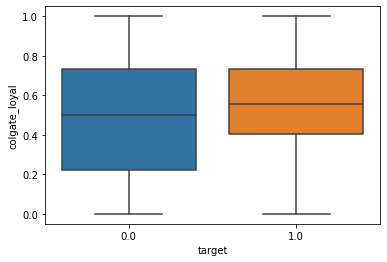

In [235]:
# Target has higher preference for colgate

tmp = pd.DataFrame([toothpaste.colgate_loyal.mean(), sim.loc[sim.sim >= 0.26, "colgate_loyal"].mean()],  index = ["average_cust", "target"]).T

sns.barplot(data = tmp)
plt.show()

tmp = toothpaste.loc[:,["cust_id","colgate_loyal"]]

tmp.loc[tmp.cust_id.isin(target), "target"] = 1

tmp.fillna(0, inplace = True)

sns.boxplot(data = tmp, y = "colgate_loyal", x = "target")

In [237]:
# Calculating the cost for each product

transaction_product["cost"] = transaction_product.min_price * transaction_product.tran_prod_sale_qty

In [238]:
# Sales and profit for those customers

tmp = transaction_product.loc[(transaction_product.cust_id.isin(target)) & (transaction_product.category_desc_eng == "TOOTHPASTE"),["brand_desc","tran_prod_sale_qty","tran_prod_sale_amt","tran_prod_paid_amt","margin", "cost"]].groupby("brand_desc").sum().reset_index()

tmp

brand_desc  tran_prod_sale_qty  tran_prod_sale_amt  tran_prod_paid_amt  \
0      AQUAFRESH              3012.0             9213.72             6080.30   
1        COLGATE              7748.0            24829.62            16286.08   
2         ORAL B                99.0              363.81              325.58   
3  PRIVATE LABEL              1606.0             1471.99             1454.82   
4      SENSODYNE               936.0             4215.67             3128.95   

        margin          cost  
0   892.925000   5187.375000  
1  3069.852500  13216.227500  
2    24.660000    300.920000  
3   107.168333   1347.651667  
4   343.445000   2785.505000

In [239]:
# Projected a 16% sales increase based on the changes in preferences

num = sim.loc[sim.sim >= 0.26, "colgate_loyal"].mean()/toothpaste.colgate_loyal.mean()

num

1.1627776422689486

In [240]:
# Projected sales

sales = (tmp.loc[tmp.brand_desc == "COLGATE","tran_prod_sale_amt"]/ tmp.tran_prod_sale_amt.sum())*num * tmp.tran_prod_sale_amt.sum()

sales

1    28871.327002
Name: tran_prod_sale_amt, dtype: float64

In [241]:
# projected paid amount after giving extra 10% off

current_discount = tmp.loc[tmp.brand_desc == "COLGATE","tran_prod_paid_amt"]/tmp.loc[tmp.brand_desc == "COLGATE","tran_prod_sale_amt"] * 0.9

paid = sales * current_discount

paid

1    17043.380734
dtype: float64